In [1]:
import pandas as pd
from pandas import MultiIndex, Int16Dtype
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

In [2]:
import random
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('CO.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO['Ref']=Ref_CO
index_names = Data_CO[ (Data_CO['WE'] >1000)].index
Data_CO.drop(index_names, inplace = True)
WE=Data_CO['WE'].to_list()
AE=Data_CO['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
data = pd.read_csv('Conc_CO.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO.drop(index_names, inplace = True)
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
CO_Data=CO_Data.resample('h').mean()
CO_Data=CO_Data.dropna()
CO_Data.tail()

Lab1       Temp         RH         Ref  Net Signal  \
Date                                                                            
2020-04-30 19:00:00  242.060716  18.870796  71.072939  188.915151   91.471325   
2020-04-30 20:00:00  218.655079  18.056864  75.132153  178.704750   84.176485   
2020-04-30 21:00:00  194.147868  17.090891  81.315038  161.421792   73.858294   
2020-04-30 22:00:00  206.432889  16.714085  82.568155  197.744043   83.279611   
2020-04-30 23:00:00  173.577429  16.365121  83.662401  162.157636   68.669099   

                     Month  Day_of_week   Day  Hour  
Date                                                 
2020-04-30 19:00:00    4.0          3.0  30.0  19.0  
2020-04-30 20:00:00    4.0          3.0  30.0  20.0  
2020-04-30 21:00:00    4.0          3.0  30.0  21.0  
2020-04-30 22:00:00    4.0          3.0  30.0  22.0  
2020-04-30 23:00:00    4.0          3.0  30.0  23.0

In [3]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna() 
O3_Data=O3_Data.resample('h').mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

ref_O3=Data_O3['Ref'].to_list()
len(ref_O3)

60913

In [4]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('NO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
Data_NO2['Ref']=Ref_NO2
WE=Data_NO2['WE'].to_list()
AE=Data_NO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
data = pd.read_csv('Conc_NO2.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉") 
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
signal=np.array(WE)-np.array(AE)
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
Data_NO2['Ref_O3']=ref_O3
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
NO2_Data=NO2_Data.resample('h').mean()
NO2_Data=NO2_Data.dropna()

In [5]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
ref_NO2=Data_NO2['Ref'].to_list()
Data_O3['Ref_NO2']=ref_NO2
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
O3_Data=O3_Data.resample('h').mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

Lab1       Temp         RH        Ref  Net Signal  \
Date                                                                           
2019-10-02 11:00:00  621.625704  26.378438  58.063437  46.094860    3.605625   
2019-10-02 12:00:00  725.154408  25.795055  48.256857  57.532808   13.865109   
2019-10-07 10:00:00  108.196313  32.344264  37.260757  47.259008   11.447809   
2019-10-07 11:00:00  135.822676  34.926112  35.013036  42.114260   10.075221   
2019-10-07 12:00:00  203.757758  36.201221  31.829282  45.701366    7.624153   

                     Month  Day_of_week  Day  Hour    Ref_NO2  
Date                                                           
2019-10-02 11:00:00   10.0          2.0  2.0  11.0  15.230400  
2019-10-02 12:00:00   10.0          2.0  2.0  12.0   5.384051  
2019-10-07 10:00:00   10.0          0.0  7.0  10.0   4.255772  
2019-10-07 11:00:00   10.0          0.0  7.0  11.0  16.268034  
2019-10-07 12:00:00   10.0          0.0  7.0  12.0  12.770444

# CO DATA

In [6]:
from sktime.performance_metrics.forecasting import sMAPE, smape_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#'Ref_NO2','Ref_SO2','Ref_O3',
#,'Month','Day_of_week','Day','Hour'
X=CO_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour']]
y=CO_Data['Ref']
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size = 0.2,shuffle=True)
#train_test_split(X, y, test_size = 0.2)

In [7]:
from flaml.model import SKLearnEstimator
# SKLearnEstimator is derived from BaseEstimator

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

from flaml.model import SKLearnEstimator

from flaml.model import SKLearnEstimator
# SKLearnEstimator is derived from BaseEstimator
import numpy as np

class RandomForestRegressor(SKLearnEstimator):
    def __init__(self, task="binary", **config):
        super().__init__(task, **config)

        if task in CLASSIFICATION:
            from sklearn.ensemble import RandomForestClassifier

            self.estimator_class =RandomForestClassifier 
        else:
            from sklearn.ensemble import RandomForestRegressor

            self.estimator_class =RandomForestRegressor

    @classmethod
    def search_space(cls, data_size, task):
        space = {
            "n_estimators": {
                "domain": {"domain": tune.loguniform(lower=100, upper=20000)},
                "low_cost_init_value": 100,
            },
            "max_features": {
                "domain": tune.loguniform(lower=0.1, upper=1),
                "low_cost_init_value": 0.1,
            },
            "max_leaf_nodes": {
                "domain": tune.lograndint(lower=100, upper=2500),
                "low_cost_init_value": 100,},
            "min_samples_split": {"domain": tune.lograndint(lower=1, upper=20),
            "init_value": 20,},
            
            "min_samples_leaf": {
                "domain": tune.lograndint(lower=1, upper=20),
                "init_value": 20,
            },
        }
        return space

from flaml import AutoML
from flaml import tune
automl = AutoML()
automl.add_learner("rfr",RandomForestRegressor )

automl_settings = {
    "time_budget": 1000,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["rfr"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)

#  NO2 DATA

In [8]:
from flaml import AutoML
from sklearn.datasets import fetch_california_housing
X=NO2_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_O3']]#'Ref_O3'
y=NO2_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#len(X_test)
X.shape

(3778, 8)

In [9]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 1440,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}

Pred=[]
rmse=[]
model=[]
RS=[]
R=[]
for i in range(10):
    X_Train, X_Test, y_Train, y_Test =train_test_split(X_train,y_train,test_size = 0.2,shuffle=True)
    # Train with labeled input data
    automl.fit(X_train=X_Train.drop(['Lab1'], axis=1), y_train=y_Train,**automl_settings,estimator_list=["rf"])
    pred=automl.predict(X_test.drop(['Lab1'], axis=1))
    R2=round(sm.r2_score(y_test, pred), 2)
    r=round(np.corrcoef(y_test, pred)[0, 1],2)
    RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),5)
    #print(r,R2,RMSE)
    # Predict
    #print(automl.predict(X_test))
    # Print the best model
    #print(automl.model.estimator)
    Pred.append(pred)
    rmse.append(RMSE)
    model.append(automl.model.estimator)
    RS.append(R2)
    R.append(r)

print(np.round(np.mean(R),2),np.round(np.mean(RS),2),np.round(np.mean(rmse),2))

[flaml.automl: 12-15 00:35:51] {2599} INFO - task = regression
[flaml.automl: 12-15 00:35:51] {2601} INFO - Data split method: uniform
[flaml.automl: 12-15 00:35:51] {2604} INFO - Evaluation method: cv
[flaml.automl: 12-15 00:35:51] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-15 00:35:51] {2870} INFO - List of ML learners in AutoML Run: ['rf']
[flaml.automl: 12-15 00:35:51] {3166} INFO - iteration 0, current learner rf
[flaml.automl: 12-15 00:35:52] {3296} INFO - Estimated sufficient time budget=11703s. Estimated necessary time budget=12s.
[flaml.automl: 12-15 00:35:52] {3343} INFO -  at 1.3s,	estimator rf's best error=6.9885,	best estimator rf's best error=6.9885
[flaml.automl: 12-15 00:35:52] {3166} INFO - iteration 1, current learner rf
[flaml.automl: 12-15 00:35:53] {3343} INFO -  at 2.3s,	estimator rf's best error=5.1940,	best estimator rf's best error=5.1940
[flaml.automl: 12-15 00:35:53] {3166} INFO - iteration 2, current learner rf
[flaml.automl: 12-15 00:35:5

[flaml.automl: 12-15 00:42:07] {3166} INFO - iteration 38, current learner rf
[flaml.automl: 12-15 00:42:45] {3343} INFO -  at 414.4s,	estimator rf's best error=3.3706,	best estimator rf's best error=3.3706
[flaml.automl: 12-15 00:42:45] {3166} INFO - iteration 39, current learner rf
[flaml.automl: 12-15 00:43:05] {3343} INFO -  at 434.7s,	estimator rf's best error=3.3706,	best estimator rf's best error=3.3706
[flaml.automl: 12-15 00:43:05] {3166} INFO - iteration 40, current learner rf
[flaml.automl: 12-15 00:44:06] {3343} INFO -  at 494.9s,	estimator rf's best error=3.3706,	best estimator rf's best error=3.3706
[flaml.automl: 12-15 00:44:06] {3166} INFO - iteration 41, current learner rf
[flaml.automl: 12-15 00:44:29] {3343} INFO -  at 518.2s,	estimator rf's best error=3.3706,	best estimator rf's best error=3.3706
[flaml.automl: 12-15 00:44:29] {3166} INFO - iteration 42, current learner rf
[flaml.automl: 12-15 00:44:53] {3343} INFO -  at 541.9s,	estimator rf's best error=3.3706,	bes

[flaml.automl: 12-15 01:06:29] {3343} INFO -  at 438.9s,	estimator rf's best error=3.3614,	best estimator rf's best error=3.3614
[flaml.automl: 12-15 01:06:29] {3166} INFO - iteration 20, current learner rf
[flaml.automl: 12-15 01:07:20] {3343} INFO -  at 490.0s,	estimator rf's best error=3.3614,	best estimator rf's best error=3.3614
[flaml.automl: 12-15 01:07:20] {3166} INFO - iteration 21, current learner rf
[flaml.automl: 12-15 01:08:11] {3343} INFO -  at 540.1s,	estimator rf's best error=3.3614,	best estimator rf's best error=3.3614
[flaml.automl: 12-15 01:08:11] {3166} INFO - iteration 22, current learner rf
[flaml.automl: 12-15 01:10:18] {3343} INFO -  at 668.0s,	estimator rf's best error=3.3614,	best estimator rf's best error=3.3614
[flaml.automl: 12-15 01:10:18] {3166} INFO - iteration 23, current learner rf
[flaml.automl: 12-15 01:12:23] {3343} INFO -  at 793.0s,	estimator rf's best error=3.3614,	best estimator rf's best error=3.3614
[flaml.automl: 12-15 01:12:23] {3166} INFO 

[flaml.automl: 12-15 01:27:30] {3166} INFO - iteration 23, current learner rf
[flaml.automl: 12-15 01:28:13] {3343} INFO -  at 269.5s,	estimator rf's best error=3.3792,	best estimator rf's best error=3.3792
[flaml.automl: 12-15 01:28:13] {3166} INFO - iteration 24, current learner rf
[flaml.automl: 12-15 01:28:35] {3343} INFO -  at 292.0s,	estimator rf's best error=3.3792,	best estimator rf's best error=3.3792
[flaml.automl: 12-15 01:28:35] {3166} INFO - iteration 25, current learner rf
[flaml.automl: 12-15 01:28:53] {3343} INFO -  at 309.5s,	estimator rf's best error=3.3792,	best estimator rf's best error=3.3792
[flaml.automl: 12-15 01:28:53] {3166} INFO - iteration 26, current learner rf
[flaml.automl: 12-15 01:29:30] {3343} INFO -  at 346.3s,	estimator rf's best error=3.3792,	best estimator rf's best error=3.3792
[flaml.automl: 12-15 01:29:30] {3166} INFO - iteration 27, current learner rf
[flaml.automl: 12-15 01:29:43] {3343} INFO -  at 359.4s,	estimator rf's best error=3.3792,	bes

[flaml.automl: 12-15 01:42:03] {3166} INFO - iteration 63, current learner rf
[flaml.automl: 12-15 01:42:12] {3343} INFO -  at 1108.7s,	estimator rf's best error=3.3792,	best estimator rf's best error=3.3792
[flaml.automl: 12-15 01:42:12] {3166} INFO - iteration 64, current learner rf
[flaml.automl: 12-15 01:42:31] {3343} INFO -  at 1127.4s,	estimator rf's best error=3.3792,	best estimator rf's best error=3.3792
[flaml.automl: 12-15 01:42:31] {3166} INFO - iteration 65, current learner rf
[flaml.automl: 12-15 01:42:51] {3343} INFO -  at 1148.1s,	estimator rf's best error=3.3792,	best estimator rf's best error=3.3792
[flaml.automl: 12-15 01:42:51] {3166} INFO - iteration 66, current learner rf
[flaml.automl: 12-15 01:43:06] {3343} INFO -  at 1162.4s,	estimator rf's best error=3.3792,	best estimator rf's best error=3.3792
[flaml.automl: 12-15 01:43:06] {3166} INFO - iteration 67, current learner rf
[flaml.automl: 12-15 01:43:33] {3343} INFO -  at 1190.1s,	estimator rf's best error=3.3792

[flaml.automl: 12-15 01:49:37] {3343} INFO -  at 121.9s,	estimator rf's best error=3.3789,	best estimator rf's best error=3.3789
[flaml.automl: 12-15 01:49:37] {3166} INFO - iteration 18, current learner rf
[flaml.automl: 12-15 01:50:25] {3343} INFO -  at 170.1s,	estimator rf's best error=3.3725,	best estimator rf's best error=3.3725
[flaml.automl: 12-15 01:50:25] {3166} INFO - iteration 19, current learner rf
[flaml.automl: 12-15 01:51:48] {3343} INFO -  at 252.7s,	estimator rf's best error=3.3642,	best estimator rf's best error=3.3642
[flaml.automl: 12-15 01:51:48] {3166} INFO - iteration 20, current learner rf
[flaml.automl: 12-15 01:52:31] {3343} INFO -  at 296.2s,	estimator rf's best error=3.3642,	best estimator rf's best error=3.3642
[flaml.automl: 12-15 01:52:31] {3166} INFO - iteration 21, current learner rf
[flaml.automl: 12-15 01:53:11] {3343} INFO -  at 336.1s,	estimator rf's best error=3.3642,	best estimator rf's best error=3.3642
[flaml.automl: 12-15 01:53:11] {3166} INFO 

[flaml.automl: 12-15 02:14:44] {3166} INFO - iteration 20, current learner rf
[flaml.automl: 12-15 02:15:26] {3343} INFO -  at 279.1s,	estimator rf's best error=3.3774,	best estimator rf's best error=3.3774
[flaml.automl: 12-15 02:15:26] {3166} INFO - iteration 21, current learner rf
[flaml.automl: 12-15 02:15:45] {3343} INFO -  at 298.4s,	estimator rf's best error=3.3774,	best estimator rf's best error=3.3774
[flaml.automl: 12-15 02:15:45] {3166} INFO - iteration 22, current learner rf
[flaml.automl: 12-15 02:17:20] {3343} INFO -  at 392.8s,	estimator rf's best error=3.3747,	best estimator rf's best error=3.3747
[flaml.automl: 12-15 02:17:20] {3166} INFO - iteration 23, current learner rf
[flaml.automl: 12-15 02:19:11] {3343} INFO -  at 503.8s,	estimator rf's best error=3.3747,	best estimator rf's best error=3.3747
[flaml.automl: 12-15 02:19:11] {3166} INFO - iteration 24, current learner rf
[flaml.automl: 12-15 02:20:36] {3343} INFO -  at 588.9s,	estimator rf's best error=3.3747,	bes

[flaml.automl: 12-15 02:52:04] {3343} INFO -  at 960.7s,	estimator rf's best error=3.3205,	best estimator rf's best error=3.3205
[flaml.automl: 12-15 02:52:04] {3166} INFO - iteration 25, current learner rf
[flaml.automl: 12-15 02:54:15] {3343} INFO -  at 1091.1s,	estimator rf's best error=3.3205,	best estimator rf's best error=3.3205
[flaml.automl: 12-15 02:54:15] {3166} INFO - iteration 26, current learner rf
[flaml.automl: 12-15 02:55:05] {3343} INFO -  at 1141.9s,	estimator rf's best error=3.3205,	best estimator rf's best error=3.3205
[flaml.automl: 12-15 02:55:05] {3166} INFO - iteration 27, current learner rf
[flaml.automl: 12-15 02:56:38] {3343} INFO -  at 1234.4s,	estimator rf's best error=3.3205,	best estimator rf's best error=3.3205
[flaml.automl: 12-15 02:56:38] {3166} INFO - iteration 28, current learner rf
[flaml.automl: 12-15 02:58:27] {3343} INFO -  at 1343.8s,	estimator rf's best error=3.3205,	best estimator rf's best error=3.3205
[flaml.automl: 12-15 02:58:51] {3602} I

[flaml.automl: 12-15 03:22:05] {2599} INFO - task = regression
[flaml.automl: 12-15 03:22:05] {2601} INFO - Data split method: uniform
[flaml.automl: 12-15 03:22:05] {2604} INFO - Evaluation method: cv
[flaml.automl: 12-15 03:22:05] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-15 03:22:05] {2870} INFO - List of ML learners in AutoML Run: ['rf']
[flaml.automl: 12-15 03:22:05] {3166} INFO - iteration 0, current learner rf
[flaml.automl: 12-15 03:22:06] {3296} INFO - Estimated sufficient time budget=14414s. Estimated necessary time budget=14s.
[flaml.automl: 12-15 03:22:06] {3343} INFO -  at 1.6s,	estimator rf's best error=6.8845,	best estimator rf's best error=6.8845
[flaml.automl: 12-15 03:22:06] {3166} INFO - iteration 1, current learner rf
[flaml.automl: 12-15 03:22:08] {3343} INFO -  at 3.6s,	estimator rf's best error=5.1452,	best estimator rf's best error=5.1452
[flaml.automl: 12-15 03:22:08] {3166} INFO - iteration 2, current learner rf
[flaml.automl: 12-15 03:22:1

[flaml.automl: 12-15 03:45:05] {3166} INFO - iteration 0, current learner rf
[flaml.automl: 12-15 03:45:07] {3296} INFO - Estimated sufficient time budget=15857s. Estimated necessary time budget=16s.
[flaml.automl: 12-15 03:45:07] {3343} INFO -  at 2.0s,	estimator rf's best error=7.0661,	best estimator rf's best error=7.0661
[flaml.automl: 12-15 03:45:07] {3166} INFO - iteration 1, current learner rf
[flaml.automl: 12-15 03:45:09] {3343} INFO -  at 3.6s,	estimator rf's best error=5.2605,	best estimator rf's best error=5.2605
[flaml.automl: 12-15 03:45:09] {3166} INFO - iteration 2, current learner rf
[flaml.automl: 12-15 03:45:10] {3343} INFO -  at 5.1s,	estimator rf's best error=5.2605,	best estimator rf's best error=5.2605
[flaml.automl: 12-15 03:45:10] {3166} INFO - iteration 3, current learner rf
[flaml.automl: 12-15 03:45:12] {3343} INFO -  at 7.0s,	estimator rf's best error=4.4825,	best estimator rf's best error=4.4825
[flaml.automl: 12-15 03:45:12] {3166} INFO - iteration 4, cur

[flaml.automl: 12-15 03:55:24] {3343} INFO -  at 618.8s,	estimator rf's best error=3.3710,	best estimator rf's best error=3.3710
[flaml.automl: 12-15 03:55:24] {3166} INFO - iteration 40, current learner rf
[flaml.automl: 12-15 03:56:11] {3343} INFO -  at 666.1s,	estimator rf's best error=3.3710,	best estimator rf's best error=3.3710
[flaml.automl: 12-15 03:56:11] {3166} INFO - iteration 41, current learner rf
[flaml.automl: 12-15 03:56:31] {3343} INFO -  at 686.3s,	estimator rf's best error=3.3710,	best estimator rf's best error=3.3710
[flaml.automl: 12-15 03:56:31] {3166} INFO - iteration 42, current learner rf
[flaml.automl: 12-15 03:56:55] {3343} INFO -  at 710.4s,	estimator rf's best error=3.3710,	best estimator rf's best error=3.3710
[flaml.automl: 12-15 03:56:55] {3166} INFO - iteration 43, current learner rf
[flaml.automl: 12-15 03:57:32] {3343} INFO -  at 746.8s,	estimator rf's best error=3.3710,	best estimator rf's best error=3.3710
[flaml.automl: 12-15 03:57:32] {3166} INFO 

[flaml.automl: 12-15 04:09:47] {3166} INFO - iteration 15, current learner rf
[flaml.automl: 12-15 04:10:04] {3343} INFO -  at 63.6s,	estimator rf's best error=3.4262,	best estimator rf's best error=3.4262
[flaml.automl: 12-15 04:10:04] {3166} INFO - iteration 16, current learner rf
[flaml.automl: 12-15 04:10:11] {3343} INFO -  at 70.6s,	estimator rf's best error=3.4262,	best estimator rf's best error=3.4262
[flaml.automl: 12-15 04:10:11] {3166} INFO - iteration 17, current learner rf
[flaml.automl: 12-15 04:10:59] {3343} INFO -  at 118.3s,	estimator rf's best error=3.4248,	best estimator rf's best error=3.4248
[flaml.automl: 12-15 04:10:59] {3166} INFO - iteration 18, current learner rf
[flaml.automl: 12-15 04:12:53] {3343} INFO -  at 232.1s,	estimator rf's best error=3.4023,	best estimator rf's best error=3.4023
[flaml.automl: 12-15 04:12:53] {3166} INFO - iteration 19, current learner rf
[flaml.automl: 12-15 04:16:22] {3343} INFO -  at 441.6s,	estimator rf's best error=3.4023,	best 

0.96 0.92 0.18


from flaml import AutoML
from sklearn.datasets import fetch_california_housing
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 180,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}

Pred=[]
rmse=[]
model=[]
for i in range(20):
    X_Train, X_Test, y_Train, y_Test =train_test_split(X_train,y_train,test_size = 0.2,shuffle=True)
    # Train with labeled input data
    automl.fit(X_train=X_Train.drop(['Lab1'], axis=1), y_train=y_Train,**automl_settings,estimator_list=["extra_tree"])
    pred=automl.predict(X_test.drop(['Lab1'], axis=1))
    R2=round(sm.r2_score(y_test, pred), 2)
    r=round(np.corrcoef(y_test, pred)[0, 1],2)
    RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),5)
    print(r,R2,RMSE)
    # Predict
    #print(automl.predict(X_test))
    # Print the best model
    print(automl.model.estimator)
    Pred.append(pred)
    rmse.append(RMSE)
    model.append(automl.model.estimator)

Sorted_pred=[]
sort_index = np.argsort(rmse)
for i in sort_index:
    Sorted_pred.append(Pred[i])
ind=[i for i in range(len(y_test))]
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(7,5))
plt.plot(ind[:200],y_test[:200], color='blue',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[1][:200],color='salmon',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[17][:200],color='teal',linewidth=1.5)
plt.legend(['Actual','p10','p90'],loc = 2, bbox_to_anchor = (0.75,1), fontsize=12)
#plt.plot(ind[:200],Sorted_pred[4][:200],color='black',linewidth=0.2)
#plt.fill_between(np.array(ind[:200]), np.array(Sorted_pred[0][:200]), np.array(Sorted_pred[4][:200]), 
                 #color='blue', alpha=0.15)
#plt.plot(ind,Pred[2],color='darkgoldenrod')
#plt.plot(ind,Pred[3],color='magenta')
#plt.plot(ind,Pred[4],color='purple')
plt.xlabel('Observation number',fontsize=16)
plt.ylabel('Concentraton (ppb)',fontsize=16)
plt.title('NO2-Extra Tree',fontsize=16)
plt.savefig("no2_extra_tree.pdf", format="pdf", bbox_inches="tight")

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 21600,  # in seconds
    "metric": 'mae',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["extra_tree"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

# O3 DATA

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#,'Ref_CO','Ref_NO2','Ref_SO2'
X=O3_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_NO2']]#,'Ref_NO2'
y=O3_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X)

3534

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

# SO2 DATA

In [11]:
import pandas as pd
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

In [12]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('Conc_SO2.txt', header = None,low_memory=False)
data.columns=['Lab2','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_so2=data
#signal=np.array(WE)-np.array(AE)
#Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data=SO2_Data.resample('5min').mean()
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna() 
data = pd.read_csv('SO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_SO2['Ref']=Ref_SO2
WE=Data_SO2['WE'].to_list()
AE=Data_SO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_SO2['Lab2']=Data_so2['Lab2'].to_list()
Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data.shape

(60913, 11)

In [13]:
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna()
SO2_Data=SO2_Data.resample('h').mean()
SO2_Data=SO2_Data.dropna()
SO2_Data.head()

WE          AE       Temp         RH       Ref  \
Date                                                                          
2019-10-10 04:00:00  344.013811  342.484305  18.332589  82.373211  1.190555   
2019-10-10 05:00:00  347.947204  342.688948  18.160512  83.041499  1.517400   
2019-10-10 06:00:00  349.586425  342.643169  18.294731  80.755815  1.596648   
2019-10-10 07:00:00  348.280332  342.545156  21.874264  74.161148  1.518688   
2019-10-10 08:00:00  352.303813  345.041354  29.141688  59.611152  1.379748   

                          Lab2  Net Signal  Month  Day_of_week   Day  Hour  
Date                                                                        
2019-10-10 04:00:00   9.990807    1.529506   10.0          3.0  10.0   4.0  
2019-10-10 05:00:00  21.173371    5.258256   10.0          3.0  10.0   5.0  
2019-10-10 06:00:00  26.255508    6.943256   10.0          3.0  10.0   6.0  
2019-10-10 07:00:00  22.449829    5.735176   10.0          3.0  10.0   7.0  
2019-10-10 08:00:00  23.209242    7.262459   10.0          3.0  10.0   8.0

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#'Ref_CO','Ref_NO2','Ref_O3',
X=SO2_Data[['Net Signal','Lab2','Temp','RH','Month','Day_of_week','Hour']]
y=SO2_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X)

1996

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab2'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab2'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab2'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

In [1]:
import pandas as pd
from pandas import MultiIndex, Int16Dtype
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

In [2]:
from platform import python_version
 
 
print("Current Python Version-", python_version())

Current Python Version- 3.8.6


In [3]:
import numpy
numpy.version.version

'1.23.5'

In [4]:
import random
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('CO.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO['Ref']=Ref_CO
index_names = Data_CO[ (Data_CO['WE'] >1000)].index
Data_CO.drop(index_names, inplace = True)
WE=Data_CO['WE'].to_list()
AE=Data_CO['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
data = pd.read_csv('Conc_CO.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO.drop(index_names, inplace = True)
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
CO_Data=CO_Data.resample('h').mean()
CO_Data=CO_Data.dropna()
CO_Data.tail()

Lab1       Temp         RH         Ref  Net Signal  \
Date                                                                            
2020-04-30 19:00:00  242.060716  18.870796  71.072939  188.915151   91.471325   
2020-04-30 20:00:00  218.655079  18.056864  75.132153  178.704750   84.176485   
2020-04-30 21:00:00  194.147868  17.090891  81.315038  161.421792   73.858294   
2020-04-30 22:00:00  206.432889  16.714085  82.568155  197.744043   83.279611   
2020-04-30 23:00:00  173.577429  16.365121  83.662401  162.157636   68.669099   

                     Month  Day_of_week   Day  Hour  
Date                                                 
2020-04-30 19:00:00    4.0          3.0  30.0  19.0  
2020-04-30 20:00:00    4.0          3.0  30.0  20.0  
2020-04-30 21:00:00    4.0          3.0  30.0  21.0  
2020-04-30 22:00:00    4.0          3.0  30.0  22.0  
2020-04-30 23:00:00    4.0          3.0  30.0  23.0

In [5]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna() 
O3_Data=O3_Data.resample('h').mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

ref_O3=Data_O3['Ref'].to_list()
len(ref_O3)

60913

In [6]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('NO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
Data_NO2['Ref']=Ref_NO2
WE=Data_NO2['WE'].to_list()
AE=Data_NO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
data = pd.read_csv('Conc_NO2.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉") 
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
signal=np.array(WE)-np.array(AE)
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
Data_NO2['Ref_O3']=ref_O3
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
NO2_Data=NO2_Data.resample('h').mean()
NO2_Data=NO2_Data.dropna()

In [7]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
ref_NO2=Data_NO2['Ref'].to_list()
Data_O3['Ref_NO2']=ref_NO2
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
O3_Data=O3_Data.resample('h').mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

Lab1       Temp         RH        Ref  Net Signal  \
Date                                                                           
2019-10-02 11:00:00  621.625704  26.378438  58.063437  46.094860    3.605625   
2019-10-02 12:00:00  725.154408  25.795055  48.256857  57.532808   13.865109   
2019-10-07 10:00:00  108.196313  32.344264  37.260757  47.259008   11.447809   
2019-10-07 11:00:00  135.822676  34.926112  35.013036  42.114260   10.075221   
2019-10-07 12:00:00  203.757758  36.201221  31.829282  45.701366    7.624153   

                     Month  Day_of_week  Day  Hour    Ref_NO2  
Date                                                           
2019-10-02 11:00:00   10.0          2.0  2.0  11.0  15.230400  
2019-10-02 12:00:00   10.0          2.0  2.0  12.0   5.384051  
2019-10-07 10:00:00   10.0          0.0  7.0  10.0   4.255772  
2019-10-07 11:00:00   10.0          0.0  7.0  11.0  16.268034  
2019-10-07 12:00:00   10.0          0.0  7.0  12.0  12.770444

# CO DATA

In [8]:
from sktime.performance_metrics.forecasting import sMAPE, smape_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from flaml import AutoML
from sklearn.datasets import fetch_california_housing
#'Ref_NO2','Ref_SO2','Ref_O3',
#,'Month','Day_of_week','Day','Hour'

#train_test_split(X, y, test_size = 0.2)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [9]:
from flaml.model import SKLearnEstimator
# SKLearnEstimator is derived from BaseEstimator

In [10]:
df1=[x for _, x in NO2_Data.groupby('Month')]
data_oct=df1[4]
#data_oct=data_oct.sample(frac=1)
data_nov=df1[5]
#data_nov=data_nov.sample(frac=1)
data_dec=df1[6]
#data_dec=data_dec.sample(frac=1)
data_jan=df1[0]
#data_jan=data_jan.sample(frac=1)
data_feb=df1[1]
#data_feb=data_feb.sample(frac=1)
data_mar=df1[2]
#data_mar=data_mar.sample(frac=1)
data_apr=df1[3]
#data_apr=data_apr.sample(frac=1)
data=[data_oct,data_nov,data_dec,data_jan,data_feb,data_mar]

In [11]:
data_Oct=data_oct.resample('60min').mean()
data_Oct=data_Oct.dropna()
data_Nov=data_nov.resample('60min').mean()
data_Nov=data_Nov.dropna()
data_Dec=data_dec.resample('60min').mean()
data_Dec=data_Dec.dropna()
data_Jan=data_jan.resample('60min').mean()
data_Jan=data_Jan.dropna()
data_Feb=data_feb.resample('60min').mean()
data_Feb=data_Feb.dropna()
data_Mar=data_mar.resample('60min').mean()
data_Mar=data_Mar.dropna()
data_Apr=data_apr.resample('60min').mean()
data_Apr=data_Apr.dropna()

In [12]:
co_data=NO2_Data
co_data=co_data.resample('60min').mean()
co_data=co_data.dropna()
X=co_data[['Net Signal','Temp','RH','Month','Day_of_week','Hour','Ref_O3']]
y=co_data['Ref']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=1)
from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 500,  # in seconds
    "metric": 'rmse',
    "eval_method":'holdout',
    "task": 'regression',
    "log_file_name": "california.log",
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings,estimator_list=["rf"])#,estimator_list=["xgboost"]
pred=automl.predict(X_test)
rmse_r=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)

[flaml.automl: 12-19 16:07:33] {2599} INFO - task = regression
[flaml.automl: 12-19 16:07:33] {2601} INFO - Data split method: uniform
[flaml.automl: 12-19 16:07:33] {2604} INFO - Evaluation method: holdout
[flaml.automl: 12-19 16:07:33] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-19 16:07:33] {2870} INFO - List of ML learners in AutoML Run: ['rf']
[flaml.automl: 12-19 16:07:33] {3166} INFO - iteration 0, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:07:34] {3296} INFO - Estimated sufficient time budget=1436s. Estimated necessary t

[flaml.automl: 12-19 16:07:36] {3166} INFO - iteration 12, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:07:36] {3343} INFO -  at 2.7s,	estimator rf's best error=3.2011,	best estimator rf's best error=3.2011
[flaml.automl: 12-19 16:07:36] {3166} INFO - iteration 13, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent wi

[flaml.automl: 12-19 16:07:54] {3343} INFO -  at 20.8s,	estimator rf's best error=2.9638,	best estimator rf's best error=2.9638
[flaml.automl: 12-19 16:07:54] {3166} INFO - iteration 25, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:07:56] {3343} INFO -  at 23.3s,	estimator rf's best error=2.9638,	best estimator rf's best error=2.9638
[flaml.automl: 12-19 16:07:56] {3166} INFO - iteration 26, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:08:15] {3343} INFO -  at 41.7s,	estimator rf's best error=2.9638,	best estimator rf's best error=2.9638
[flaml.automl: 12-19 16:08:15] {3166} INFO - iteration 38, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:08:15] {3343} INFO -  at 42.3s,	estimator rf's best error=2.9638,	best estimator rf's best error=2.9638
[flaml.automl: 12-19 16:08:15] {3166} INFO - iteration 39, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:08:33] {3343} INFO -  at 59.4s,	estimator rf's best error=2.9638,	best estimator rf's best error=2.9638
[flaml.automl: 12-19 16:08:33] {3166} INFO - iteration 51, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:08:34] {3343} INFO -  at 61.1s,	estimator rf's best error=2.9638,	best estimator rf's best error=2.9638
[flaml.automl: 12-19 16:08:34] {3166} INFO - iteration 52, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:08:50] {3343} INFO -  at 76.4s,	estimator rf's best error=2.9638,	best estimator rf's best error=2.9638
[flaml.automl: 12-19 16:08:50] {3166} INFO - iteration 64, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:08:51] {3343} INFO -  at 77.6s,	estimator rf's best error=2.9638,	best estimator rf's best error=2.9638
[flaml.automl: 12-19 16:08:51] {3166} INFO - iteration 65, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:09:07] {3343} INFO -  at 93.6s,	estimator rf's best error=2.9595,	best estimator rf's best error=2.9595
[flaml.automl: 12-19 16:09:07] {3166} INFO - iteration 77, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:09:08] {3343} INFO -  at 94.7s,	estimator rf's best error=2.9595,	best estimator rf's best error=2.9595
[flaml.automl: 12-19 16:09:08] {3166} INFO - iteration 78, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:09:27] {3343} INFO -  at 113.4s,	estimator rf's best error=2.9574,	best estimator rf's best error=2.9574
[flaml.automl: 12-19 16:09:27] {3166} INFO - iteration 90, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:09:28] {3343} INFO -  at 115.0s,	estimator rf's best error=2.9574,	best estimator rf's best error=2.9574
[flaml.automl: 12-19 16:09:28] {3166} INFO - iteration 91, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:09:45] {3343} INFO -  at 131.9s,	estimator rf's best error=2.9574,	best estimator rf's best error=2.9574
[flaml.automl: 12-19 16:09:45] {3166} INFO - iteration 103, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:09:47] {3343} INFO -  at 134.0s,	estimator rf's best error=2.9574,	best estimator rf's best error=2.9574
[flaml.automl: 12-19 16:09:47] {3166} INFO - iteration 104, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:10:05] {3343} INFO -  at 151.8s,	estimator rf's best error=2.9574,	best estimator rf's best error=2.9574
[flaml.automl: 12-19 16:10:05] {3166} INFO - iteration 116, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:10:07] {3343} INFO -  at 153.9s,	estimator rf's best error=2.9574,	best estimator rf's best error=2.9574
[flaml.automl: 12-19 16:10:07] {3166} INFO - iteration 117, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:10:32] {3343} INFO -  at 178.6s,	estimator rf's best error=2.9574,	best estimator rf's best error=2.9574
[flaml.automl: 12-19 16:10:32] {3166} INFO - iteration 129, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:10:35] {3343} INFO -  at 181.3s,	estimator rf's best error=2.9574,	best estimator rf's best error=2.9574
[flaml.automl: 12-19 16:10:35] {3166} INFO - iteration 130, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:10:56] {3343} INFO -  at 202.9s,	estimator rf's best error=2.9574,	best estimator rf's best error=2.9574
[flaml.automl: 12-19 16:10:56] {3166} INFO - iteration 142, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:10:58] {3343} INFO -  at 204.6s,	estimator rf's best error=2.9574,	best estimator rf's best error=2.9574
[flaml.automl: 12-19 16:10:58] {3166} INFO - iteration 143, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:11:15] {3343} INFO -  at 222.0s,	estimator rf's best error=2.9574,	best estimator rf's best error=2.9574
[flaml.automl: 12-19 16:11:15] {3166} INFO - iteration 155, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:11:17] {3343} INFO -  at 224.1s,	estimator rf's best error=2.9574,	best estimator rf's best error=2.9574
[flaml.automl: 12-19 16:11:17] {3166} INFO - iteration 156, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:11:49] {3343} INFO -  at 255.4s,	estimator rf's best error=2.9534,	best estimator rf's best error=2.9534
[flaml.automl: 12-19 16:11:49] {3166} INFO - iteration 168, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:11:51] {3343} INFO -  at 257.6s,	estimator rf's best error=2.9534,	best estimator rf's best error=2.9534
[flaml.automl: 12-19 16:11:51] {3166} INFO - iteration 169, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:12:23] {3343} INFO -  at 289.3s,	estimator rf's best error=2.9534,	best estimator rf's best error=2.9534
[flaml.automl: 12-19 16:12:23] {3166} INFO - iteration 181, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:12:25] {3343} INFO -  at 291.7s,	estimator rf's best error=2.9534,	best estimator rf's best error=2.9534
[flaml.automl: 12-19 16:12:25] {3166} INFO - iteration 182, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:12:58] {3343} INFO -  at 325.2s,	estimator rf's best error=2.9534,	best estimator rf's best error=2.9534
[flaml.automl: 12-19 16:12:58] {3166} INFO - iteration 194, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:13:00] {3343} INFO -  at 326.9s,	estimator rf's best error=2.9534,	best estimator rf's best error=2.9534
[flaml.automl: 12-19 16:13:00] {3166} INFO - iteration 195, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:13:30] {3343} INFO -  at 356.3s,	estimator rf's best error=2.9529,	best estimator rf's best error=2.9529
[flaml.automl: 12-19 16:13:30] {3166} INFO - iteration 207, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:13:32] {3343} INFO -  at 359.1s,	estimator rf's best error=2.9529,	best estimator rf's best error=2.9529
[flaml.automl: 12-19 16:13:32] {3166} INFO - iteration 208, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:14:00] {3343} INFO -  at 387.2s,	estimator rf's best error=2.9464,	best estimator rf's best error=2.9464
[flaml.automl: 12-19 16:14:00] {3166} INFO - iteration 220, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:14:03] {3343} INFO -  at 389.9s,	estimator rf's best error=2.9464,	best estimator rf's best error=2.9464
[flaml.automl: 12-19 16:14:03] {3166} INFO - iteration 221, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:14:27] {3343} INFO -  at 413.9s,	estimator rf's best error=2.9461,	best estimator rf's best error=2.9461
[flaml.automl: 12-19 16:14:27] {3166} INFO - iteration 233, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:14:29] {3343} INFO -  at 415.9s,	estimator rf's best error=2.9461,	best estimator rf's best error=2.9461
[flaml.automl: 12-19 16:14:29] {3166} INFO - iteration 234, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:14:47] {3343} INFO -  at 434.1s,	estimator rf's best error=2.9461,	best estimator rf's best error=2.9461
[flaml.automl: 12-19 16:14:47] {3166} INFO - iteration 246, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:14:49] {3343} INFO -  at 435.4s,	estimator rf's best error=2.9461,	best estimator rf's best error=2.9461
[flaml.automl: 12-19 16:14:49] {3166} INFO - iteration 247, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:15:07] {3343} INFO -  at 453.9s,	estimator rf's best error=2.9461,	best estimator rf's best error=2.9461
[flaml.automl: 12-19 16:15:07] {3166} INFO - iteration 259, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:15:09] {3343} INFO -  at 456.2s,	estimator rf's best error=2.9461,	best estimator rf's best error=2.9461
[flaml.automl: 12-19 16:15:09] {3166} INFO - iteration 260, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:15:29] {3343} INFO -  at 475.5s,	estimator rf's best error=2.9461,	best estimator rf's best error=2.9461
[flaml.automl: 12-19 16:15:29] {3166} INFO - iteration 272, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:15:29] {3343} INFO -  at 476.3s,	estimator rf's best error=2.9461,	best estimator rf's best error=2.9461
[flaml.automl: 12-19 16:15:29] {3166} INFO - iteration 273, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:15:49] {3343} INFO -  at 495.6s,	estimator rf's best error=2.9461,	best estimator rf's best error=2.9461
[flaml.automl: 12-19 16:15:49] {3166} INFO - iteration 285, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:15:50] {3343} INFO -  at 497.1s,	estimator rf's best error=2.9461,	best estimator rf's best error=2.9461
[flaml.automl: 12-19 16:15:50] {3166} INFO - iteration 286, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

In [13]:
from sklearn.neighbors import LocalOutlierFactor
A=['Net Signal','Temp','RH','Month','Day_of_week','Hour','Ref_O3']
B='Ref'
frame1=[data_Oct,data_Nov,data_Dec,data_Jan,data_Feb,data_Mar]#,data_feb
Train1=pd.concat(frame1)
train1=Train1.sample(frac=1)
lof = LocalOutlierFactor()
yhat = lof.fit_predict(train1)
mask = yhat != -1
train1= train1[mask]
test1=data_Apr
yhat = lof.fit_predict(test1)
mask = yhat != -1
test1= test1[mask]

frame2=[data_Oct,data_Nov,data_Dec,data_Jan,data_Feb,data_Apr]#,data_feb
Train2=pd.concat(frame2)
train2=Train2.sample(frac=1)
yhat = lof.fit_predict(train2)
mask = yhat != -1
train2= train2[mask]
test2=data_Mar
yhat = lof.fit_predict(test2)
mask = yhat != -1
test2= test2[mask]

frame3=[data_Oct,data_Nov,data_Dec,data_Jan,data_Mar,data_Apr]#,data_feb
Train3=pd.concat(frame3)
train3=Train3.sample(frac=1)
yhat = lof.fit_predict(train3)
mask = yhat != -1
train3= train3[mask]
test3=data_Feb
yhat = lof.fit_predict(test3)
mask = yhat != -1
test3= test3[mask]

frame4=[data_Oct,data_Nov,data_Dec,data_Feb,data_Mar,data_Apr]#,data_feb
Train4=pd.concat(frame4)
train4=Train4.sample(frac=1)
yhat = lof.fit_predict(train4)
mask = yhat != -1
train4= train4[mask]
test4=data_Jan
yhat = lof.fit_predict(test4)
mask = yhat != -1
test4= test4[mask]

frame5=[data_Oct,data_Nov,data_Jan,data_Feb,data_Mar,data_Apr]#,data_feb
Train5=pd.concat(frame5)
train5=Train5.sample(frac=1)
yhat = lof.fit_predict(train5)
mask = yhat != -1
train5= train5[mask]
test5=data_Dec
yhat = lof.fit_predict(test5)
mask = yhat != -1
test5= test5[mask]

frame6=[data_Oct,data_Dec,data_Jan,data_Feb,data_Mar,data_Apr]#,data_feb
Train6=pd.concat(frame6)
train6=Train6.sample(frac=1)
yhat = lof.fit_predict(train6)
mask = yhat != -1
train6= train6[mask]
test6=data_Nov
yhat = lof.fit_predict(test6)
mask = yhat != -1
test6= test6[mask]

frame7=[data_Nov,data_Dec,data_Jan,data_Feb,data_Mar,data_Apr]#,data_feb
Train7=pd.concat(frame7)
train7=Train7.sample(frac=1)
yhat = lof.fit_predict(train7)
mask = yhat != -1
train7= train7[mask]
test7=data_Oct
yhat = lof.fit_predict(test7)
mask = yhat != -1
test7= test7[mask]


Train=[train1,train2,train3,train4,train5,train6,train7]
Test=[test1,test2,test3,test4,test5,test6,test7]

In [14]:
from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 500,  # in seconds
    "metric": 'rmse',
    "eval_method":'holdout',
    "task": 'regression',
    "log_file_name": "california.log",
}

rmse=[]

# Train with labeled input data
for i in range(7):
    automl.fit(X_train=Train[i][A], y_train=Train[i][B],
           **automl_settings,estimator_list=["rf"])#,estimator_list=["xgboost"]
    pred=automl.predict(Test[i][A])
    R2=round(sm.r2_score(Test[i][B], pred), 2)
    r=round(np.corrcoef(Test[i][B], pred)[0, 1],2)
    RMSE=round(np.sqrt(sm.mean_squared_error(Test[i][B], pred))/np.mean(Test[i][B]),2)
    rmse.append(RMSE)
    print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
#print(automl.model.estimator)

[flaml.automl: 12-19 16:15:58] {2599} INFO - task = regression
[flaml.automl: 12-19 16:15:58] {2601} INFO - Data split method: uniform
[flaml.automl: 12-19 16:15:58] {2604} INFO - Evaluation method: holdout
[flaml.automl: 12-19 16:15:58] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-19 16:15:59] {2870} INFO - List of ML learners in AutoML Run: ['rf']
[flaml.automl: 12-19 16:15:59] {3166} INFO - iteration 0, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:15:59] {3296} INFO - Estimated sufficient time budget=1907s. Estimated necessary t

[flaml.automl: 12-19 16:16:01] {3166} INFO - iteration 12, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:16:02] {3343} INFO -  at 3.2s,	estimator rf's best error=3.4590,	best estimator rf's best error=3.4590
[flaml.automl: 12-19 16:16:02] {3166} INFO - iteration 13, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent wi

[flaml.automl: 12-19 16:16:34] {3343} INFO -  at 35.2s,	estimator rf's best error=3.1757,	best estimator rf's best error=3.1757
[flaml.automl: 12-19 16:16:34] {3166} INFO - iteration 25, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:16:42] {3343} INFO -  at 43.2s,	estimator rf's best error=3.1757,	best estimator rf's best error=3.1757
[flaml.automl: 12-19 16:16:42] {3166} INFO - iteration 26, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:18:02] {3343} INFO -  at 124.1s,	estimator rf's best error=3.1757,	best estimator rf's best error=3.1757
[flaml.automl: 12-19 16:18:02] {3166} INFO - iteration 38, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:18:07] {3343} INFO -  at 128.4s,	estimator rf's best error=3.1757,	best estimator rf's best error=3.1757
[flaml.automl: 12-19 16:18:07] {3166} INFO - iteration 39, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:19:37] {3343} INFO -  at 218.4s,	estimator rf's best error=3.1757,	best estimator rf's best error=3.1757
[flaml.automl: 12-19 16:19:37] {3166} INFO - iteration 51, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:19:46] {3343} INFO -  at 227.6s,	estimator rf's best error=3.1757,	best estimator rf's best error=3.1757
[flaml.automl: 12-19 16:19:46] {3166} INFO - iteration 52, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:20:59] {3343} INFO -  at 300.9s,	estimator rf's best error=3.1757,	best estimator rf's best error=3.1757
[flaml.automl: 12-19 16:20:59] {3166} INFO - iteration 64, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:21:05] {3343} INFO -  at 306.9s,	estimator rf's best error=3.1757,	best estimator rf's best error=3.1757
[flaml.automl: 12-19 16:21:05] {3166} INFO - iteration 65, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:22:28] {3343} INFO -  at 389.6s,	estimator rf's best error=3.1757,	best estimator rf's best error=3.1757
[flaml.automl: 12-19 16:22:28] {3166} INFO - iteration 77, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:22:34] {3343} INFO -  at 395.5s,	estimator rf's best error=3.1757,	best estimator rf's best error=3.1757
[flaml.automl: 12-19 16:22:34] {3166} INFO - iteration 78, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:23:54] {3343} INFO -  at 475.4s,	estimator rf's best error=3.1757,	best estimator rf's best error=3.1757
[flaml.automl: 12-19 16:23:54] {3166} INFO - iteration 90, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:24:00] {3343} INFO -  at 482.0s,	estimator rf's best error=3.1757,	best estimator rf's best error=3.1757
[flaml.automl: 12-19 16:24:00] {3166} INFO - iteration 91, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

0.74 0.21 0.79


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:24:22] {3296} INFO - Estimated sufficient time budget=3569s. Estimated necessary time budget=4s.
[flaml.automl: 12-19 16:24:22] {3343} INFO -  at 0.5s,	estimator rf's best error=7.2939,	best estimator rf's best error=7.2939
[flaml.automl: 12-19 16:24:22] {3166} INFO - iteration 1, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treate

[flaml.automl: 12-19 16:24:27] {3343} INFO -  at 4.8s,	estimator rf's best error=3.5519,	best estimator rf's best error=3.5519
[flaml.automl: 12-19 16:24:27] {3166} INFO - iteration 13, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:24:27] {3343} INFO -  at 5.8s,	estimator rf's best error=3.5496,	best estimator rf's best error=3.5496
[flaml.automl: 12-19 16:24:27] {3166} INFO - iteration 14, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]

[flaml.automl: 12-19 16:24:37] {3343} INFO -  at 15.1s,	estimator rf's best error=3.2848,	best estimator rf's best error=3.2848
[flaml.automl: 12-19 16:24:37] {3166} INFO - iteration 26, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:24:37] {3343} INFO -  at 15.6s,	estimator rf's best error=3.2848,	best estimator rf's best error=3.2848
[flaml.automl: 12-19 16:24:37] {3166} INFO - iteration 27, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:25:01] {3343} INFO -  at 39.3s,	estimator rf's best error=3.0864,	best estimator rf's best error=3.0864
[flaml.automl: 12-19 16:25:01] {3166} INFO - iteration 39, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:25:06] {3343} INFO -  at 44.2s,	estimator rf's best error=3.0864,	best estimator rf's best error=3.0864
[flaml.automl: 12-19 16:25:06] {3166} INFO - iteration 40, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:25:50] {3343} INFO -  at 88.2s,	estimator rf's best error=3.0864,	best estimator rf's best error=3.0864
[flaml.automl: 12-19 16:25:50] {3166} INFO - iteration 52, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:25:52] {3343} INFO -  at 90.3s,	estimator rf's best error=3.0864,	best estimator rf's best error=3.0864
[flaml.automl: 12-19 16:25:52] {3166} INFO - iteration 53, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:26:39] {3343} INFO -  at 137.0s,	estimator rf's best error=3.0864,	best estimator rf's best error=3.0864
[flaml.automl: 12-19 16:26:39] {3166} INFO - iteration 65, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:26:41] {3343} INFO -  at 138.9s,	estimator rf's best error=3.0864,	best estimator rf's best error=3.0864
[flaml.automl: 12-19 16:26:41] {3166} INFO - iteration 66, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:27:10] {3343} INFO -  at 168.1s,	estimator rf's best error=3.0644,	best estimator rf's best error=3.0644
[flaml.automl: 12-19 16:27:10] {3166} INFO - iteration 78, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:27:13] {3343} INFO -  at 170.9s,	estimator rf's best error=3.0496,	best estimator rf's best error=3.0496
[flaml.automl: 12-19 16:27:13] {3166} INFO - iteration 79, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:27:49] {3343} INFO -  at 206.9s,	estimator rf's best error=3.0496,	best estimator rf's best error=3.0496
[flaml.automl: 12-19 16:27:49] {3166} INFO - iteration 91, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:27:50] {3343} INFO -  at 208.7s,	estimator rf's best error=3.0496,	best estimator rf's best error=3.0496
[flaml.automl: 12-19 16:27:50] {3166} INFO - iteration 92, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:28:18] {3343} INFO -  at 236.5s,	estimator rf's best error=3.0380,	best estimator rf's best error=3.0380
[flaml.automl: 12-19 16:28:18] {3166} INFO - iteration 104, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:28:19] {3343} INFO -  at 237.8s,	estimator rf's best error=3.0380,	best estimator rf's best error=3.0380
[flaml.automl: 12-19 16:28:19] {3166} INFO - iteration 105, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:28:41] {3343} INFO -  at 259.7s,	estimator rf's best error=3.0380,	best estimator rf's best error=3.0380
[flaml.automl: 12-19 16:28:41] {3166} INFO - iteration 117, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:28:42] {3343} INFO -  at 260.5s,	estimator rf's best error=3.0380,	best estimator rf's best error=3.0380
[flaml.automl: 12-19 16:28:42] {3166} INFO - iteration 118, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:29:11] {3343} INFO -  at 289.7s,	estimator rf's best error=3.0380,	best estimator rf's best error=3.0380
[flaml.automl: 12-19 16:29:11] {3166} INFO - iteration 130, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:29:13] {3343} INFO -  at 291.3s,	estimator rf's best error=3.0380,	best estimator rf's best error=3.0380
[flaml.automl: 12-19 16:29:13] {3166} INFO - iteration 131, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:29:41] {3343} INFO -  at 319.3s,	estimator rf's best error=3.0380,	best estimator rf's best error=3.0380
[flaml.automl: 12-19 16:29:41] {3166} INFO - iteration 143, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:29:43] {3343} INFO -  at 321.4s,	estimator rf's best error=3.0380,	best estimator rf's best error=3.0380
[flaml.automl: 12-19 16:29:43] {3166} INFO - iteration 144, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:30:08] {3343} INFO -  at 346.5s,	estimator rf's best error=3.0380,	best estimator rf's best error=3.0380
[flaml.automl: 12-19 16:30:08] {3166} INFO - iteration 156, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:30:09] {3343} INFO -  at 347.8s,	estimator rf's best error=3.0380,	best estimator rf's best error=3.0380
[flaml.automl: 12-19 16:30:09] {3166} INFO - iteration 157, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:30:38] {3343} INFO -  at 376.3s,	estimator rf's best error=3.0380,	best estimator rf's best error=3.0380
[flaml.automl: 12-19 16:30:38] {3166} INFO - iteration 169, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:30:40] {3343} INFO -  at 378.2s,	estimator rf's best error=3.0380,	best estimator rf's best error=3.0380
[flaml.automl: 12-19 16:30:40] {3166} INFO - iteration 170, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:31:06] {3343} INFO -  at 404.1s,	estimator rf's best error=3.0380,	best estimator rf's best error=3.0380
[flaml.automl: 12-19 16:31:06] {3166} INFO - iteration 182, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:31:09] {3343} INFO -  at 407.0s,	estimator rf's best error=3.0380,	best estimator rf's best error=3.0380
[flaml.automl: 12-19 16:31:09] {3166} INFO - iteration 183, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:31:34] {3343} INFO -  at 431.9s,	estimator rf's best error=3.0380,	best estimator rf's best error=3.0380
[flaml.automl: 12-19 16:31:34] {3166} INFO - iteration 195, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:31:36] {3343} INFO -  at 434.1s,	estimator rf's best error=3.0380,	best estimator rf's best error=3.0380
[flaml.automl: 12-19 16:31:36] {3166} INFO - iteration 196, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:32:05] {3343} INFO -  at 463.0s,	estimator rf's best error=3.0380,	best estimator rf's best error=3.0380
[flaml.automl: 12-19 16:32:05] {3166} INFO - iteration 208, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:32:06] {3343} INFO -  at 464.5s,	estimator rf's best error=3.0380,	best estimator rf's best error=3.0380
[flaml.automl: 12-19 16:32:06] {3166} INFO - iteration 209, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:32:29] {3343} INFO -  at 487.5s,	estimator rf's best error=3.0380,	best estimator rf's best error=3.0380
[flaml.automl: 12-19 16:32:29] {3166} INFO - iteration 221, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:32:31] {3343} INFO -  at 489.5s,	estimator rf's best error=3.0380,	best estimator rf's best error=3.0380
[flaml.automl: 12-19 16:32:31] {3166} INFO - iteration 222, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

0.93 0.76 0.35


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:32:44] {3296} INFO - Estimated sufficient time budget=2766s. Estimated necessary time budget=3s.
[flaml.automl: 12-19 16:32:44] {3343} INFO -  at 0.4s,	estimator rf's best error=6.9526,	best estimator rf's best error=6.9526
[flaml.automl: 12-19 16:32:44] {3166} INFO - iteration 1, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treate

[flaml.automl: 12-19 16:32:49] {3166} INFO - iteration 13, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:32:50] {3343} INFO -  at 5.7s,	estimator rf's best error=3.2522,	best estimator rf's best error=3.2522
[flaml.automl: 12-19 16:32:50] {3166} INFO - iteration 14, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent wi

[flaml.automl: 12-19 16:34:03] {3343} INFO -  at 79.3s,	estimator rf's best error=3.1413,	best estimator rf's best error=3.1413
[flaml.automl: 12-19 16:34:03] {3166} INFO - iteration 26, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:34:06] {3343} INFO -  at 81.9s,	estimator rf's best error=3.1413,	best estimator rf's best error=3.1413
[flaml.automl: 12-19 16:34:06] {3166} INFO - iteration 27, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:35:59] {3343} INFO -  at 194.6s,	estimator rf's best error=3.1354,	best estimator rf's best error=3.1354
[flaml.automl: 12-19 16:35:59] {3166} INFO - iteration 39, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:36:10] {3343} INFO -  at 205.6s,	estimator rf's best error=3.1354,	best estimator rf's best error=3.1354
[flaml.automl: 12-19 16:36:10] {3166} INFO - iteration 40, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:37:38] {3343} INFO -  at 294.0s,	estimator rf's best error=3.1354,	best estimator rf's best error=3.1354
[flaml.automl: 12-19 16:37:38] {3166} INFO - iteration 52, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:37:43] {3343} INFO -  at 298.8s,	estimator rf's best error=3.1354,	best estimator rf's best error=3.1354
[flaml.automl: 12-19 16:37:43] {3166} INFO - iteration 53, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:39:12] {3343} INFO -  at 388.0s,	estimator rf's best error=3.1354,	best estimator rf's best error=3.1354
[flaml.automl: 12-19 16:39:12] {3166} INFO - iteration 65, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:39:16] {3343} INFO -  at 392.3s,	estimator rf's best error=3.1354,	best estimator rf's best error=3.1354
[flaml.automl: 12-19 16:39:16] {3166} INFO - iteration 66, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:40:44] {3343} INFO -  at 479.8s,	estimator rf's best error=3.1354,	best estimator rf's best error=3.1354
[flaml.automl: 12-19 16:40:44] {3166} INFO - iteration 78, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:40:49] {3343} INFO -  at 484.5s,	estimator rf's best error=3.1354,	best estimator rf's best error=3.1354
[flaml.automl: 12-19 16:40:49] {3166} INFO - iteration 79, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

0.94 0.87 0.19


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:41:13] {3296} INFO - Estimated sufficient time budget=1874s. Estimated necessary time budget=2s.
[flaml.automl: 12-19 16:41:13] {3343} INFO -  at 0.3s,	estimator rf's best error=6.7848,	best estimator rf's best error=6.7848
[flaml.automl: 12-19 16:41:13] {3166} INFO - iteration 1, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treate

[flaml.automl: 12-19 16:41:18] {3343} INFO -  at 4.7s,	estimator rf's best error=3.1768,	best estimator rf's best error=3.1768
[flaml.automl: 12-19 16:41:18] {3166} INFO - iteration 13, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:41:18] {3343} INFO -  at 5.4s,	estimator rf's best error=3.1768,	best estimator rf's best error=3.1768
[flaml.automl: 12-19 16:41:18] {3166} INFO - iteration 14, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]

[flaml.automl: 12-19 16:41:24] {3343} INFO -  at 11.3s,	estimator rf's best error=3.1768,	best estimator rf's best error=3.1768
[flaml.automl: 12-19 16:41:24] {3166} INFO - iteration 26, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:41:25] {3343} INFO -  at 11.9s,	estimator rf's best error=3.1768,	best estimator rf's best error=3.1768
[flaml.automl: 12-19 16:41:25] {3166} INFO - iteration 27, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:41:31] {3343} INFO -  at 18.3s,	estimator rf's best error=3.1768,	best estimator rf's best error=3.1768
[flaml.automl: 12-19 16:41:31] {3166} INFO - iteration 39, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:41:32] {3343} INFO -  at 18.8s,	estimator rf's best error=3.1768,	best estimator rf's best error=3.1768
[flaml.automl: 12-19 16:41:32] {3166} INFO - iteration 40, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:41:38] {3343} INFO -  at 24.5s,	estimator rf's best error=3.1768,	best estimator rf's best error=3.1768
[flaml.automl: 12-19 16:41:38] {3166} INFO - iteration 52, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:41:38] {3343} INFO -  at 25.0s,	estimator rf's best error=3.1768,	best estimator rf's best error=3.1768
[flaml.automl: 12-19 16:41:38] {3166} INFO - iteration 53, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:41:44] {3343} INFO -  at 31.1s,	estimator rf's best error=3.1768,	best estimator rf's best error=3.1768
[flaml.automl: 12-19 16:41:44] {3166} INFO - iteration 65, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:41:45] {3343} INFO -  at 31.5s,	estimator rf's best error=3.1768,	best estimator rf's best error=3.1768
[flaml.automl: 12-19 16:41:45] {3166} INFO - iteration 66, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:41:51] {3343} INFO -  at 37.5s,	estimator rf's best error=3.1768,	best estimator rf's best error=3.1768
[flaml.automl: 12-19 16:41:51] {3166} INFO - iteration 78, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:41:51] {3343} INFO -  at 37.9s,	estimator rf's best error=3.1768,	best estimator rf's best error=3.1768
[flaml.automl: 12-19 16:41:51] {3166} INFO - iteration 79, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:41:58] {3343} INFO -  at 44.6s,	estimator rf's best error=3.1427,	best estimator rf's best error=3.1427
[flaml.automl: 12-19 16:41:58] {3166} INFO - iteration 91, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:41:58] {3343} INFO -  at 45.1s,	estimator rf's best error=3.1427,	best estimator rf's best error=3.1427
[flaml.automl: 12-19 16:41:58] {3166} INFO - iteration 92, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:42:05] {3343} INFO -  at 51.7s,	estimator rf's best error=3.1427,	best estimator rf's best error=3.1427
[flaml.automl: 12-19 16:42:05] {3166} INFO - iteration 104, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:42:05] {3343} INFO -  at 52.3s,	estimator rf's best error=3.1427,	best estimator rf's best error=3.1427
[flaml.automl: 12-19 16:42:05] {3166} INFO - iteration 105, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:42:13] {3343} INFO -  at 59.5s,	estimator rf's best error=3.1328,	best estimator rf's best error=3.1328
[flaml.automl: 12-19 16:42:13] {3166} INFO - iteration 117, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:42:13] {3343} INFO -  at 60.1s,	estimator rf's best error=3.1328,	best estimator rf's best error=3.1328
[flaml.automl: 12-19 16:42:13] {3166} INFO - iteration 118, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:42:20] {3343} INFO -  at 67.1s,	estimator rf's best error=3.1328,	best estimator rf's best error=3.1328
[flaml.automl: 12-19 16:42:20] {3166} INFO - iteration 130, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:42:21] {3343} INFO -  at 68.0s,	estimator rf's best error=3.1328,	best estimator rf's best error=3.1328
[flaml.automl: 12-19 16:42:21] {3166} INFO - iteration 131, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:42:29] {3343} INFO -  at 75.7s,	estimator rf's best error=3.1328,	best estimator rf's best error=3.1328
[flaml.automl: 12-19 16:42:29] {3166} INFO - iteration 143, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:42:29] {3343} INFO -  at 76.2s,	estimator rf's best error=3.1328,	best estimator rf's best error=3.1328
[flaml.automl: 12-19 16:42:29] {3166} INFO - iteration 144, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:42:37] {3343} INFO -  at 84.0s,	estimator rf's best error=3.1103,	best estimator rf's best error=3.1103
[flaml.automl: 12-19 16:42:37] {3166} INFO - iteration 156, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:42:38] {3343} INFO -  at 84.5s,	estimator rf's best error=3.1103,	best estimator rf's best error=3.1103
[flaml.automl: 12-19 16:42:38] {3166} INFO - iteration 157, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:42:44] {3343} INFO -  at 90.7s,	estimator rf's best error=3.0940,	best estimator rf's best error=3.0940
[flaml.automl: 12-19 16:42:44] {3166} INFO - iteration 169, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:42:44] {3343} INFO -  at 91.2s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:42:44] {3166} INFO - iteration 170, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:42:50] {3343} INFO -  at 97.1s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:42:50] {3166} INFO - iteration 182, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:42:51] {3343} INFO -  at 97.6s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:42:51] {3166} INFO - iteration 183, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:42:58] {3343} INFO -  at 104.8s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:42:58] {3166} INFO - iteration 195, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:42:58] {3343} INFO -  at 105.3s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:42:58] {3166} INFO - iteration 196, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:43:06] {3343} INFO -  at 113.1s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:43:06] {3166} INFO - iteration 208, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:43:07] {3343} INFO -  at 113.7s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:43:07] {3166} INFO - iteration 209, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:43:13] {3343} INFO -  at 120.4s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:43:13] {3166} INFO - iteration 221, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:43:14] {3343} INFO -  at 120.9s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:43:14] {3166} INFO - iteration 222, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:43:20] {3343} INFO -  at 127.1s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:43:20] {3166} INFO - iteration 234, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:43:21] {3343} INFO -  at 127.8s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:43:21] {3166} INFO - iteration 235, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:43:29] {3343} INFO -  at 135.6s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:43:29] {3166} INFO - iteration 247, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:43:29] {3343} INFO -  at 136.2s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:43:29] {3166} INFO - iteration 248, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:43:36] {3343} INFO -  at 143.3s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:43:36] {3166} INFO - iteration 260, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:43:37] {3343} INFO -  at 143.9s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:43:37] {3166} INFO - iteration 261, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:43:44] {3343} INFO -  at 150.7s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:43:44] {3166} INFO - iteration 273, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:43:44] {3343} INFO -  at 151.2s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:43:44] {3166} INFO - iteration 274, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:43:51] {3343} INFO -  at 157.7s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:43:51] {3166} INFO - iteration 286, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:43:51] {3343} INFO -  at 158.1s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:43:51] {3166} INFO - iteration 287, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:43:57] {3343} INFO -  at 164.1s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:43:57] {3166} INFO - iteration 299, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:43:58] {3343} INFO -  at 164.6s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:43:58] {3166} INFO - iteration 300, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:44:05] {3343} INFO -  at 172.4s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:44:06] {3166} INFO - iteration 312, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:44:06] {3343} INFO -  at 173.0s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:44:06] {3166} INFO - iteration 313, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:44:13] {3343} INFO -  at 179.9s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:44:13] {3166} INFO - iteration 325, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:44:14] {3343} INFO -  at 180.4s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:44:14] {3166} INFO - iteration 326, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:44:20] {3343} INFO -  at 186.6s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:44:20] {3166} INFO - iteration 338, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:44:20] {3343} INFO -  at 187.1s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:44:20] {3166} INFO - iteration 339, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:44:26] {3343} INFO -  at 192.9s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:44:26] {3166} INFO - iteration 351, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:44:26] {3343} INFO -  at 193.4s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:44:27] {3166} INFO - iteration 352, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:44:33] {3343} INFO -  at 199.4s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:44:33] {3166} INFO - iteration 364, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:44:33] {3343} INFO -  at 200.1s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:44:33] {3166} INFO - iteration 365, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:44:40] {3343} INFO -  at 207.0s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:44:40] {3166} INFO - iteration 377, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:44:41] {3343} INFO -  at 207.7s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:44:41] {3166} INFO - iteration 378, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:44:48] {3343} INFO -  at 214.9s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:44:48] {3166} INFO - iteration 390, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:44:48] {3343} INFO -  at 215.4s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:44:48] {3166} INFO - iteration 391, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:44:55] {3343} INFO -  at 222.4s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:44:56] {3166} INFO - iteration 403, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:44:56] {3343} INFO -  at 222.9s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:44:56] {3166} INFO - iteration 404, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:45:03] {3343} INFO -  at 229.4s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:45:03] {3166} INFO - iteration 416, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:45:03] {3343} INFO -  at 229.9s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:45:03] {3166} INFO - iteration 417, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:45:09] {3343} INFO -  at 235.5s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:45:09] {3166} INFO - iteration 429, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:45:09] {3343} INFO -  at 236.0s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:45:09] {3166} INFO - iteration 430, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:45:15] {3343} INFO -  at 242.4s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:45:15] {3166} INFO - iteration 442, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:45:16] {3343} INFO -  at 242.8s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:45:16] {3166} INFO - iteration 443, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:45:22] {3343} INFO -  at 248.9s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:45:22] {3166} INFO - iteration 455, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:45:22] {3343} INFO -  at 249.3s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:45:22] {3166} INFO - iteration 456, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:45:28] {3343} INFO -  at 254.9s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:45:28] {3166} INFO - iteration 468, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:45:29] {3343} INFO -  at 255.5s,	estimator rf's best error=3.0491,	best estimator rf's best error=3.0491
[flaml.automl: 12-19 16:45:29] {3166} INFO - iteration 469, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:45:34] {3343} INFO -  at 261.1s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:45:34] {3166} INFO - iteration 481, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:45:35] {3343} INFO -  at 261.6s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:45:35] {3166} INFO - iteration 482, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:45:40] {3343} INFO -  at 267.2s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:45:40] {3166} INFO - iteration 494, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:45:41] {3343} INFO -  at 267.7s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:45:41] {3166} INFO - iteration 495, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:45:47] {3343} INFO -  at 273.6s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:45:47] {3166} INFO - iteration 507, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:45:47] {3343} INFO -  at 274.1s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:45:47] {3166} INFO - iteration 508, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:45:54] {3343} INFO -  at 280.5s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:45:54] {3166} INFO - iteration 520, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:45:54] {3343} INFO -  at 281.0s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:45:54] {3166} INFO - iteration 521, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:46:00] {3343} INFO -  at 286.9s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:46:00] {3166} INFO - iteration 533, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:46:00] {3343} INFO -  at 287.4s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:46:00] {3166} INFO - iteration 534, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:46:07] {3343} INFO -  at 293.7s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:46:07] {3166} INFO - iteration 546, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:46:07] {3343} INFO -  at 294.2s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:46:07] {3166} INFO - iteration 547, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:46:13] {3343} INFO -  at 299.5s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:46:13] {3166} INFO - iteration 559, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:46:13] {3343} INFO -  at 300.0s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:46:13] {3166} INFO - iteration 560, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:46:21] {3343} INFO -  at 307.4s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:46:21] {3166} INFO - iteration 572, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:46:21] {3343} INFO -  at 307.9s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:46:21] {3166} INFO - iteration 573, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:46:28] {3343} INFO -  at 314.5s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:46:28] {3166} INFO - iteration 585, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:46:28] {3343} INFO -  at 315.0s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:46:28] {3166} INFO - iteration 586, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:46:34] {3343} INFO -  at 321.2s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:46:34] {3166} INFO - iteration 598, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:46:35] {3343} INFO -  at 321.7s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:46:35] {3166} INFO - iteration 599, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:46:41] {3343} INFO -  at 327.9s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:46:41] {3166} INFO - iteration 611, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:46:42] {3343} INFO -  at 328.4s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:46:42] {3166} INFO - iteration 612, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:46:47] {3343} INFO -  at 334.3s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:46:47] {3166} INFO - iteration 624, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:46:48] {3343} INFO -  at 334.9s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:46:48] {3166} INFO - iteration 625, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:46:54] {3343} INFO -  at 340.6s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:46:54] {3166} INFO - iteration 637, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:46:54] {3343} INFO -  at 341.0s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:46:54] {3166} INFO - iteration 638, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:47:00] {3343} INFO -  at 346.5s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:47:00] {3166} INFO - iteration 650, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:47:00] {3343} INFO -  at 347.0s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:47:00] {3166} INFO - iteration 651, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:47:06] {3343} INFO -  at 352.7s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:47:06] {3166} INFO - iteration 663, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:47:06] {3343} INFO -  at 353.2s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:47:06] {3166} INFO - iteration 664, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:47:13] {3343} INFO -  at 360.0s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:47:13] {3166} INFO - iteration 676, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:47:14] {3343} INFO -  at 360.6s,	estimator rf's best error=3.0313,	best estimator rf's best error=3.0313
[flaml.automl: 12-19 16:47:14] {3166} INFO - iteration 677, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:47:21] {3343} INFO -  at 367.5s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:47:21] {3166} INFO - iteration 689, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:47:21] {3343} INFO -  at 368.0s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:47:21] {3166} INFO - iteration 690, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:47:27] {3343} INFO -  at 374.0s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:47:27] {3166} INFO - iteration 702, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:47:28] {3343} INFO -  at 374.6s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:47:28] {3166} INFO - iteration 703, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:47:34] {3343} INFO -  at 381.0s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:47:34] {3166} INFO - iteration 715, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:47:35] {3343} INFO -  at 381.6s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:47:35] {3166} INFO - iteration 716, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:47:41] {3343} INFO -  at 387.7s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:47:41] {3166} INFO - iteration 728, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:47:41] {3343} INFO -  at 388.4s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:47:42] {3166} INFO - iteration 729, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:47:49] {3343} INFO -  at 395.4s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:47:49] {3166} INFO - iteration 741, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:47:49] {3343} INFO -  at 396.0s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:47:49] {3166} INFO - iteration 742, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:47:55] {3343} INFO -  at 402.0s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:47:55] {3166} INFO - iteration 754, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:47:56] {3343} INFO -  at 402.5s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:47:56] {3166} INFO - iteration 755, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:48:02] {3343} INFO -  at 408.5s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:48:02] {3166} INFO - iteration 767, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:48:02] {3343} INFO -  at 409.0s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:48:02] {3166} INFO - iteration 768, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:48:09] {3343} INFO -  at 415.6s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:48:09] {3166} INFO - iteration 780, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:48:09] {3343} INFO -  at 416.1s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:48:09] {3166} INFO - iteration 781, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:48:15] {3343} INFO -  at 422.4s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:48:15] {3166} INFO - iteration 793, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:48:16] {3343} INFO -  at 423.1s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:48:16] {3166} INFO - iteration 794, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:48:23] {3343} INFO -  at 429.5s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:48:23] {3166} INFO - iteration 806, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:48:23] {3343} INFO -  at 430.1s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:48:23] {3166} INFO - iteration 807, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:48:30] {3343} INFO -  at 437.2s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:48:30] {3166} INFO - iteration 819, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:48:31] {3343} INFO -  at 437.7s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:48:31] {3166} INFO - iteration 820, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:48:37] {3343} INFO -  at 443.9s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:48:37] {3166} INFO - iteration 832, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:48:38] {3343} INFO -  at 444.4s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:48:38] {3166} INFO - iteration 833, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:48:44] {3343} INFO -  at 450.9s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:48:44] {3166} INFO - iteration 845, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:48:45] {3343} INFO -  at 451.4s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:48:45] {3166} INFO - iteration 846, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:48:50] {3343} INFO -  at 457.3s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:48:50] {3166} INFO - iteration 858, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:48:51] {3343} INFO -  at 457.8s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:48:51] {3166} INFO - iteration 859, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:48:57] {3343} INFO -  at 463.9s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:48:57] {3166} INFO - iteration 871, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:48:58] {3343} INFO -  at 464.5s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:48:58] {3166} INFO - iteration 872, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:49:04] {3343} INFO -  at 471.1s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:49:04] {3166} INFO - iteration 884, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:49:05] {3343} INFO -  at 471.6s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:49:05] {3166} INFO - iteration 885, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:49:11] {3343} INFO -  at 478.2s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:49:11] {3166} INFO - iteration 897, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:49:12] {3343} INFO -  at 478.8s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:49:12] {3166} INFO - iteration 898, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:49:18] {3343} INFO -  at 485.0s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:49:18] {3166} INFO - iteration 910, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:49:19] {3343} INFO -  at 485.5s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:49:19] {3166} INFO - iteration 911, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:49:25] {3343} INFO -  at 491.6s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:49:25] {3166} INFO - iteration 923, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:49:25] {3343} INFO -  at 492.2s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:49:25] {3166} INFO - iteration 924, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:49:32] {3343} INFO -  at 498.6s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:49:32] {3166} INFO - iteration 936, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:49:32] {3343} INFO -  at 499.1s,	estimator rf's best error=3.0065,	best estimator rf's best error=3.0065
[flaml.automl: 12-19 16:49:32] {3166} INFO - iteration 937, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

0.93 0.85 0.2


[flaml.automl: 12-19 16:49:34] {2599} INFO - task = regression
[flaml.automl: 12-19 16:49:34] {2601} INFO - Data split method: uniform
[flaml.automl: 12-19 16:49:34] {2604} INFO - Evaluation method: holdout
[flaml.automl: 12-19 16:49:34] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-19 16:49:34] {2870} INFO - List of ML learners in AutoML Run: ['rf']
[flaml.automl: 12-19 16:49:34] {3166} INFO - iteration 0, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:49:34] {3296} INFO - Estimated sufficient time budget=3790s. Estimated necessary t

[flaml.automl: 12-19 16:49:38] {3166} INFO - iteration 12, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:49:39] {3343} INFO -  at 5.3s,	estimator rf's best error=3.7207,	best estimator rf's best error=3.7207
[flaml.automl: 12-19 16:49:39] {3166} INFO - iteration 13, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent wi

[flaml.automl: 12-19 16:50:20] {3343} INFO -  at 46.6s,	estimator rf's best error=3.2590,	best estimator rf's best error=3.2590
[flaml.automl: 12-19 16:50:20] {3166} INFO - iteration 25, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:50:23] {3343} INFO -  at 49.7s,	estimator rf's best error=3.2590,	best estimator rf's best error=3.2590
[flaml.automl: 12-19 16:50:23] {3166} INFO - iteration 26, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:51:48] {3343} INFO -  at 134.5s,	estimator rf's best error=3.2392,	best estimator rf's best error=3.2392
[flaml.automl: 12-19 16:51:48] {3166} INFO - iteration 38, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:51:58] {3343} INFO -  at 144.7s,	estimator rf's best error=3.2392,	best estimator rf's best error=3.2392
[flaml.automl: 12-19 16:51:58] {3166} INFO - iteration 39, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:53:15] {3343} INFO -  at 221.7s,	estimator rf's best error=3.2213,	best estimator rf's best error=3.2213
[flaml.automl: 12-19 16:53:15] {3166} INFO - iteration 51, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:53:17] {3343} INFO -  at 223.9s,	estimator rf's best error=3.2213,	best estimator rf's best error=3.2213
[flaml.automl: 12-19 16:53:17] {3166} INFO - iteration 52, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:55:21] {3343} INFO -  at 347.2s,	estimator rf's best error=3.2177,	best estimator rf's best error=3.2177
[flaml.automl: 12-19 16:55:21] {3166} INFO - iteration 64, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:55:30] {3343} INFO -  at 356.4s,	estimator rf's best error=3.2177,	best estimator rf's best error=3.2177
[flaml.automl: 12-19 16:55:30] {3166} INFO - iteration 65, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:57:22] {3343} INFO -  at 468.3s,	estimator rf's best error=3.2177,	best estimator rf's best error=3.2177
[flaml.automl: 12-19 16:57:22] {3166} INFO - iteration 77, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:57:30] {3343} INFO -  at 476.5s,	estimator rf's best error=3.2177,	best estimator rf's best error=3.2177
[flaml.automl: 12-19 16:57:30] {3166} INFO - iteration 78, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

0.94 0.86 0.17


[flaml.automl: 12-19 16:57:56] {2599} INFO - task = regression
[flaml.automl: 12-19 16:57:56] {2601} INFO - Data split method: uniform
[flaml.automl: 12-19 16:57:56] {2604} INFO - Evaluation method: holdout
[flaml.automl: 12-19 16:57:56] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-19 16:57:56] {2870} INFO - List of ML learners in AutoML Run: ['rf']
[flaml.automl: 12-19 16:57:56] {3166} INFO - iteration 0, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:57:57] {3296} INFO - Estimated sufficient time budget=3124s. Estimated necessary t

[flaml.automl: 12-19 16:58:01] {3166} INFO - iteration 12, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:58:02] {3343} INFO -  at 6.4s,	estimator rf's best error=3.2063,	best estimator rf's best error=3.2063
[flaml.automl: 12-19 16:58:02] {3166} INFO - iteration 13, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent wi

[flaml.automl: 12-19 16:58:38] {3343} INFO -  at 42.1s,	estimator rf's best error=2.9646,	best estimator rf's best error=2.9646
[flaml.automl: 12-19 16:58:38] {3166} INFO - iteration 25, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:58:40] {3343} INFO -  at 43.7s,	estimator rf's best error=2.9646,	best estimator rf's best error=2.9646
[flaml.automl: 12-19 16:58:40] {3166} INFO - iteration 26, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:59:23] {3343} INFO -  at 87.5s,	estimator rf's best error=2.9461,	best estimator rf's best error=2.9461
[flaml.automl: 12-19 16:59:23] {3166} INFO - iteration 38, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:59:32] {3343} INFO -  at 96.4s,	estimator rf's best error=2.9461,	best estimator rf's best error=2.9461
[flaml.automl: 12-19 16:59:32] {3166} INFO - iteration 39, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 17:00:33] {3343} INFO -  at 156.8s,	estimator rf's best error=2.9459,	best estimator rf's best error=2.9459
[flaml.automl: 12-19 17:00:33] {3166} INFO - iteration 51, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:00:35] {3343} INFO -  at 159.7s,	estimator rf's best error=2.9459,	best estimator rf's best error=2.9459
[flaml.automl: 12-19 17:00:35] {3166} INFO - iteration 52, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 17:01:36] {3343} INFO -  at 220.7s,	estimator rf's best error=2.9397,	best estimator rf's best error=2.9397
[flaml.automl: 12-19 17:01:36] {3166} INFO - iteration 64, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:01:42] {3343} INFO -  at 226.0s,	estimator rf's best error=2.9397,	best estimator rf's best error=2.9397
[flaml.automl: 12-19 17:01:42] {3166} INFO - iteration 65, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 17:03:16] {3343} INFO -  at 320.1s,	estimator rf's best error=2.9397,	best estimator rf's best error=2.9397
[flaml.automl: 12-19 17:03:16] {3166} INFO - iteration 77, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:03:26] {3343} INFO -  at 330.1s,	estimator rf's best error=2.9397,	best estimator rf's best error=2.9397
[flaml.automl: 12-19 17:03:26] {3166} INFO - iteration 78, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 17:04:58] {3343} INFO -  at 422.7s,	estimator rf's best error=2.9397,	best estimator rf's best error=2.9397
[flaml.automl: 12-19 17:04:58] {3166} INFO - iteration 90, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:05:06] {3343} INFO -  at 430.0s,	estimator rf's best error=2.9397,	best estimator rf's best error=2.9397
[flaml.automl: 12-19 17:05:06] {3166} INFO - iteration 91, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

0.94 0.86 0.2


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:06:18] {3296} INFO - Estimated sufficient time budget=1907s. Estimated necessary time budget=2s.
[flaml.automl: 12-19 17:06:18] {3343} INFO -  at 0.4s,	estimator rf's best error=6.8760,	best estimator rf's best error=6.8760
[flaml.automl: 12-19 17:06:18] {3166} INFO - iteration 1, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treate

[flaml.automl: 12-19 17:06:22] {3343} INFO -  at 5.1s,	estimator rf's best error=3.4903,	best estimator rf's best error=3.4903
[flaml.automl: 12-19 17:06:22] {3166} INFO - iteration 13, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:06:23] {3343} INFO -  at 5.7s,	estimator rf's best error=3.3152,	best estimator rf's best error=3.3152
[flaml.automl: 12-19 17:06:23] {3166} INFO - iteration 14, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]

[flaml.automl: 12-19 17:06:50] {3343} INFO -  at 33.1s,	estimator rf's best error=3.2497,	best estimator rf's best error=3.2497
[flaml.automl: 12-19 17:06:50] {3166} INFO - iteration 26, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:06:59] {3343} INFO -  at 41.3s,	estimator rf's best error=3.2497,	best estimator rf's best error=3.2497
[flaml.automl: 12-19 17:06:59] {3166} INFO - iteration 27, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 17:08:32] {3343} INFO -  at 134.8s,	estimator rf's best error=3.2167,	best estimator rf's best error=3.2167
[flaml.automl: 12-19 17:08:32] {3166} INFO - iteration 39, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:09:03] {3343} INFO -  at 165.9s,	estimator rf's best error=3.2167,	best estimator rf's best error=3.2167
[flaml.automl: 12-19 17:09:03] {3166} INFO - iteration 40, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 17:12:54] {3343} INFO -  at 396.2s,	estimator rf's best error=3.2167,	best estimator rf's best error=3.2167
[flaml.automl: 12-19 17:12:54] {3166} INFO - iteration 52, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:12:59] {3343} INFO -  at 401.5s,	estimator rf's best error=3.2167,	best estimator rf's best error=3.2167
[flaml.automl: 12-19 17:12:59] {3166} INFO - iteration 53, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

0.9 0.78 0.26


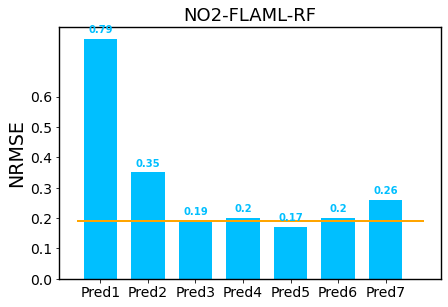

In [15]:
import matplotlib.pyplot as plt
import numpy as np
fig= plt.figure(figsize=(5.3,3.5))
ax = fig.add_axes([0,0,1,1])
x= ['Pred1', 'Pred2', 'Pred3','Pred4','Pred5','Pred6','Pred7']
students1=rmse
students2= [48,32,22,18,16]
plt.hlines([rmse_r], -0.5, 6.8, color='orange', linewidth=2)
x = np.arange(7)
wid= 0.7
graph1=ax.bar(x,students1,wid, color='#00BFFF', alpha=1)
#graph2=ax.bar(x+0.2,students2,wid, color='#00BFFF', alpha=1)
#plt.legend(['15min','60min'],title='Data resolution')
i= 0
for p in graph1:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height+0.02,
             str(students1[i]),
             ha='center',
             weight='bold',fontsize=10, color='#00BFFF', alpha=1)
    i+=1

ax.set_xticks([0,1,2,3,4,5,6])
ax.set_xticklabels(['Pred1', 'Pred2', 'Pred3','Pred4','Pred5','Pred6','Pred7'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yticks(np.arange(0,0.7, step=0.1))

#plt.xlabel('Tolerance,Tc (%)', fontsize=19)
plt.ylabel('NRMSE', fontsize=19)
plt.setp(ax.spines.values(), linewidth=1.4)
plt.title("NO2-FLAML-RF",fontsize=18)
plt.savefig("Pred_NO2_FLAML_RF.pdf", format="pdf", bbox_inches="tight")
plt.show()

X=CO_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour']]
y=CO_Data['Ref']
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size = 0.2,shuffle=True)

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 1440,  # in seconds
    "metric": 'rmse',
    "eval_method":'holdout',
    "task": 'regression',
    "log_file_name": "california.log",
}

Pred=[]
rmse=[]
model=[]
RS=[]
R=[]
for i in range(10):
    X_Train, X_Test, y_Train, y_Test =train_test_split(X_train,y_train,test_size = 0.2,shuffle=True)
    # Train with labeled input data
    automl.fit(X_train=X_Train.drop(['Lab1'], axis=1), y_train=y_Train,**automl_settings,estimator_list=["rf"])
    pred=automl.predict(X_test.drop(['Lab1'], axis=1))
    R2=round(sm.r2_score(y_test, pred), 2)
    r=round(np.corrcoef(y_test, pred)[0, 1],2)
    RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),5)
    #print(r,R2,RMSE)
    # Predict
    #print(automl.predict(X_test))
    # Print the best model
    #print(automl.model.estimator)
    Pred.append(pred)
    rmse.append(RMSE)
    model.append(automl.model.estimator)
    RS.append(R2)
    R.append(r)

print(np.round(np.mean(R),2),np.round(np.mean(RS),2),np.round(np.mean(rmse),2))

In [16]:
print(np.round(np.mean(R),2),np.round(np.mean(RS),2),np.round(np.mean(rmse),2))

NameError: name 'R' is not defined

Pred=[]
rmse=[]
model=[]
for i in range(20):
    X_Train, X_Test, y_Train, y_Test =train_test_split(X_train,y_train,test_size = 0.2,shuffle=True)
    # Train with labeled input data
    automl.fit(X_train=X_Train.drop(['Lab1'], axis=1), y_train=y_Train,**automl_settings,estimator_list=["xgboost"])
    pred=automl.predict(X_test.drop(['Lab1'], axis=1))
    R2=round(sm.r2_score(y_test, pred), 2)
    r=round(np.corrcoef(y_test, pred)[0, 1],2)
    RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),5)
    print(r,R2,RMSE)
    # Predict
    #print(automl.predict(X_test))
    # Print the best model
    print(automl.model.estimator)
    Pred.append(pred)
    rmse.append(RMSE)
    model.append(automl.model.estimator)

Sorted_pred=[]
sort_index = np.argsort(rmse)
for i in sort_index:
    Sorted_pred.append(Pred[i])
ind=[i for i in range(len(y_test))]
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(7,5))
plt.plot(ind[:200],y_test[:200], color='blue',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[1][:200],color='salmon',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[17][:200],color='teal',linewidth=1.5)
plt.legend(['Actual','p10','p90'],loc = 2, bbox_to_anchor = (0.75,1), fontsize=12)
#plt.plot(ind[:200],Sorted_pred[4][:200],color='black',linewidth=0.2)
#plt.fill_between(np.array(ind[:200]), np.array(Sorted_pred[0][:200]), np.array(Sorted_pred[4][:200]), 
                 #color='blue', alpha=0.15)
#plt.plot(ind,Pred[2],color='darkgoldenrod')
#plt.plot(ind,Pred[3],color='magenta')
#plt.plot(ind,Pred[4],color='purple')
plt.xlabel('Observation number',fontsize=16)
plt.ylabel('Concentraton (ppb)',fontsize=16)
plt.title('CO-XGBoost',fontsize=16)
plt.savefig("co_xgboost.pdf", format="pdf", bbox_inches="tight")

Pred=[]
rmse=[]
model=[]
for i in range(20):
    X_Train, X_Test, y_Train, y_Test =train_test_split(X_train,y_train,test_size = 0.2,shuffle=True)
    # Train with labeled input data
    automl.fit(X_train=X_Train.drop(['Lab1'], axis=1), y_train=y_Train,**automl_settings,estimator_list=["xgb_limitdepth"])
    pred=automl.predict(X_test.drop(['Lab1'], axis=1))
    R2=round(sm.r2_score(y_test, pred), 2)
    r=round(np.corrcoef(y_test, pred)[0, 1],2)
    RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),5)
    print(r,R2,RMSE)
    # Predict
    #print(automl.predict(X_test))
    # Print the best model
    print(automl.model.estimator)
    Pred.append(pred)
    rmse.append(RMSE)
    model.append(automl.model.estimator)

Sorted_pred=[]
sort_index = np.argsort(rmse)
for i in sort_index:
    Sorted_pred.append(Pred[i])
ind=[i for i in range(len(y_test))]
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(7,5))
plt.plot(ind[:200],y_test[:200], color='blue',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[1][:200],color='salmon',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[17][:200],color='teal',linewidth=1.5)
plt.legend(['Actual','p10','p90'],loc = 2, bbox_to_anchor = (0.75,1), fontsize=12)
#plt.plot(ind[:200],Sorted_pred[4][:200],color='black',linewidth=0.2)
#plt.fill_between(np.array(ind[:200]), np.array(Sorted_pred[0][:200]), np.array(Sorted_pred[4][:200]), 
                 #color='blue', alpha=0.15)
#plt.plot(ind,Pred[2],color='darkgoldenrod')
#plt.plot(ind,Pred[3],color='magenta')
#plt.plot(ind,Pred[4],color='purple')
plt.xlabel('Observation number',fontsize=16)
plt.ylabel('Concentraton (ppb)',fontsize=16)
plt.title('CO-CO-LDXGBooost',fontsize=16)
plt.savefig("co_ldxgboost.pdf", format="pdf", bbox_inches="tight")

Sorted_pred=[]
sort_index = np.argsort(rmse)
for i in sort_index:
    Sorted_pred.append(Pred[i])
ind=[i for i in range(len(y_test))]
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(7,5))
plt.plot(ind[:200],y_test[:200], color='blue',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[1][:200],color='salmon',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[17][:200],color='teal',linewidth=1.5)
plt.legend(['Actual','p10','p90'],loc = 2, bbox_to_anchor = (0.75,1), fontsize=12)
#plt.plot(ind[:200],Sorted_pred[4][:200],color='black',linewidth=0.2)
#plt.fill_between(np.array(ind[:200]), np.array(Sorted_pred[0][:200]), np.array(Sorted_pred[4][:200]), 
                 #color='blue', alpha=0.15)
#plt.plot(ind,Pred[2],color='darkgoldenrod')
#plt.plot(ind,Pred[3],color='magenta')
#plt.plot(ind,Pred[4],color='purple')
plt.xlabel('Observation number',fontsize=16)
plt.ylabel('Concentraton (ppb)',fontsize=16)
plt.title('CO-LDXGBooost',fontsize=16)
plt.savefig("co_ldxgboost.pdf", format="pdf", bbox_inches="tight")

Pred=[]
rmse=[]
model=[]
for i in range(20):
    X_Train, X_Test, y_Train, y_Test =train_test_split(X_train,y_train,test_size = 0.2,shuffle=True)
    # Train with labeled input data
    automl.fit(X_train=X_Train.drop(['Lab1'], axis=1), y_train=y_Train,**automl_settings,estimator_list=["extra_tree"])
    pred=automl.predict(X_test.drop(['Lab1'], axis=1))
    R2=round(sm.r2_score(y_test, pred), 2)
    r=round(np.corrcoef(y_test, pred)[0, 1],2)
    RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),5)
    print(r,R2,RMSE)
    # Predict
    #print(automl.predict(X_test))
    # Print the best model
    print(automl.model.estimator)
    Pred.append(pred)
    rmse.append(RMSE)
    model.append(automl.model.estimator)

Sorted_pred=[]
sort_index = np.argsort(rmse)
for i in sort_index:
    Sorted_pred.append(Pred[i])
ind=[i for i in range(len(y_test))]
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(7,5))
plt.plot(ind[:200],y_test[:200], color='blue',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[1][:200],color='salmon',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[17][:200],color='teal',linewidth=1.5)
plt.legend(['Actual','p10','p90'],loc = 2, bbox_to_anchor = (0.75,1), fontsize=12)
#plt.plot(ind[:200],Sorted_pred[4][:200],color='black',linewidth=0.2)
#plt.fill_between(np.array(ind[:200]), np.array(Sorted_pred[0][:200]), np.array(Sorted_pred[4][:200]), 
                 #color='blue', alpha=0.15)
#plt.plot(ind,Pred[2],color='darkgoldenrod')
#plt.plot(ind,Pred[3],color='magenta')
#plt.plot(ind,Pred[4],color='purple')
plt.xlabel('Observation number',fontsize=16)
plt.ylabel('Concentraton (ppb)',fontsize=16)
plt.title('CO-Extra Tree',fontsize=16)
plt.savefig("co_extra_tree.pdf", format="pdf", bbox_inches="tight")

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

from flaml.model import SKLearnEstimator

from flaml.model import SKLearnEstimator
# SKLearnEstimator is derived from BaseEstimator
import numpy as np

class RandomForestRegressor(SKLearnEstimator):
    def __init__(self, task="binary", **config):
        super().__init__(task, **config)

        if task in CLASSIFICATION:
            from sklearn.ensemble import RandomForestClassifier

            self.estimator_class =RandomForestClassifier 
        else:
            from sklearn.ensemble import RandomForestRegressor

            self.estimator_class =RandomForestRegressor

    @classmethod
    def search_space(cls, data_size, task):
        space = {
            "n_estimators": {
                "domain": {"domain": tune.loguniform(lower=100, upper=20000)},
                "low_cost_init_value": 100,
            },
            "max_features": {
                "domain": tune.loguniform(lower=0.1, upper=1),
                "low_cost_init_value": 0.1,
            },
            "max_leaf_nodes": {
                "domain": tune.lograndint(lower=100, upper=2500),
                "low_cost_init_value": 100,},
            "min_samples_split": {"domain": tune.lograndint(lower=1, upper=20),
            "init_value": 20,},
            
            "min_samples_leaf": {
                "domain": tune.lograndint(lower=1, upper=20),
                "init_value": 20,
            },
        }
        return space

from flaml import AutoML
from flaml import tune
automl = AutoML()
automl.add_learner("rfr",RandomForestRegressor )

automl_settings = {
    "time_budget": 1000,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["rfr"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)

#  NO2 DATA

X=NO2_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_O3']]#'Ref_O3'
y=NO2_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#len(X_test)
X.shape

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

# O3 DATA

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#,'Ref_CO','Ref_NO2','Ref_SO2'
X=O3_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_NO2']]#,'Ref_NO2'
y=O3_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X)

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

# SO2 DATA

In [ ]:
import pandas as pd
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

In [ ]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('Conc_SO2.txt', header = None,low_memory=False)
data.columns=['Lab2','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_so2=data
#signal=np.array(WE)-np.array(AE)
#Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data=SO2_Data.resample('5min').mean()
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna() 
data = pd.read_csv('SO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_SO2['Ref']=Ref_SO2
WE=Data_SO2['WE'].to_list()
AE=Data_SO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_SO2['Lab2']=Data_so2['Lab2'].to_list()
Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data.shape

In [ ]:
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna()
SO2_Data=SO2_Data.resample('h').mean()
SO2_Data=SO2_Data.dropna()
SO2_Data.head()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#'Ref_CO','Ref_NO2','Ref_O3',
X=SO2_Data[['Net Signal','Lab2','Temp','RH','Month','Day_of_week','Hour']]
y=SO2_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X)

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab2'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab2'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab2'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

In [1]:
import pandas as pd
from pandas import MultiIndex, Int16Dtype
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

In [2]:
import random
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('CO.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO['Ref']=Ref_CO
index_names = Data_CO[ (Data_CO['WE'] >1000)].index
Data_CO.drop(index_names, inplace = True)
WE=Data_CO['WE'].to_list()
AE=Data_CO['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
data = pd.read_csv('Conc_CO.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO.drop(index_names, inplace = True)
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
CO_Data=CO_Data.resample('h').mean()
CO_Data=CO_Data.dropna()
CO_Data.tail()

Lab1       Temp         RH         Ref  Net Signal  \
Date                                                                            
2020-04-30 19:00:00  242.060716  18.870796  71.072939  188.915151   91.471325   
2020-04-30 20:00:00  218.655079  18.056864  75.132153  178.704750   84.176485   
2020-04-30 21:00:00  194.147868  17.090891  81.315038  161.421792   73.858294   
2020-04-30 22:00:00  206.432889  16.714085  82.568155  197.744043   83.279611   
2020-04-30 23:00:00  173.577429  16.365121  83.662401  162.157636   68.669099   

                     Month  Day_of_week   Day  Hour  
Date                                                 
2020-04-30 19:00:00    4.0          3.0  30.0  19.0  
2020-04-30 20:00:00    4.0          3.0  30.0  20.0  
2020-04-30 21:00:00    4.0          3.0  30.0  21.0  
2020-04-30 22:00:00    4.0          3.0  30.0  22.0  
2020-04-30 23:00:00    4.0          3.0  30.0  23.0

In [3]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna() 
O3_Data=O3_Data.resample('h').mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

ref_O3=Data_O3['Ref'].to_list()
len(ref_O3)

60913

In [4]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('NO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
Data_NO2['Ref']=Ref_NO2
WE=Data_NO2['WE'].to_list()
AE=Data_NO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
data = pd.read_csv('Conc_NO2.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉") 
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
signal=np.array(WE)-np.array(AE)
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
Data_NO2['Ref_O3']=ref_O3
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
NO2_Data=NO2_Data.resample('h').mean()
NO2_Data=NO2_Data.dropna()

In [5]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
ref_NO2=Data_NO2['Ref'].to_list()
Data_O3['Ref_NO2']=ref_NO2
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
O3_Data=O3_Data.resample('h').mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

Lab1       Temp         RH        Ref  Net Signal  \
Date                                                                           
2019-10-02 11:00:00  621.625704  26.378438  58.063437  46.094860    3.605625   
2019-10-02 12:00:00  725.154408  25.795055  48.256857  57.532808   13.865109   
2019-10-07 10:00:00  108.196313  32.344264  37.260757  47.259008   11.447809   
2019-10-07 11:00:00  135.822676  34.926112  35.013036  42.114260   10.075221   
2019-10-07 12:00:00  203.757758  36.201221  31.829282  45.701366    7.624153   

                     Month  Day_of_week  Day  Hour    Ref_NO2  
Date                                                           
2019-10-02 11:00:00   10.0          2.0  2.0  11.0  15.230400  
2019-10-02 12:00:00   10.0          2.0  2.0  12.0   5.384051  
2019-10-07 10:00:00   10.0          0.0  7.0  10.0   4.255772  
2019-10-07 11:00:00   10.0          0.0  7.0  11.0  16.268034  
2019-10-07 12:00:00   10.0          0.0  7.0  12.0  12.770444

# CO DATA

In [6]:
from sktime.performance_metrics.forecasting import sMAPE, smape_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#'Ref_NO2','Ref_SO2','Ref_O3',
#,'Month','Day_of_week','Day','Hour'
X=CO_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour']]
y=CO_Data['Ref']
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size = 0.2,shuffle=True)
#train_test_split(X, y, test_size = 0.2)

In [7]:
from flaml.model import SKLearnEstimator
# SKLearnEstimator is derived from BaseEstimator

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

from flaml.model import SKLearnEstimator

from flaml.model import SKLearnEstimator
# SKLearnEstimator is derived from BaseEstimator
import numpy as np

class RandomForestRegressor(SKLearnEstimator):
    def __init__(self, task="binary", **config):
        super().__init__(task, **config)

        if task in CLASSIFICATION:
            from sklearn.ensemble import RandomForestClassifier

            self.estimator_class =RandomForestClassifier 
        else:
            from sklearn.ensemble import RandomForestRegressor

            self.estimator_class =RandomForestRegressor

    @classmethod
    def search_space(cls, data_size, task):
        space = {
            "n_estimators": {
                "domain": {"domain": tune.loguniform(lower=100, upper=20000)},
                "low_cost_init_value": 100,
            },
            "max_features": {
                "domain": tune.loguniform(lower=0.1, upper=1),
                "low_cost_init_value": 0.1,
            },
            "max_leaf_nodes": {
                "domain": tune.lograndint(lower=100, upper=2500),
                "low_cost_init_value": 100,},
            "min_samples_split": {"domain": tune.lograndint(lower=1, upper=20),
            "init_value": 20,},
            
            "min_samples_leaf": {
                "domain": tune.lograndint(lower=1, upper=20),
                "init_value": 20,
            },
        }
        return space

from flaml import AutoML
from flaml import tune
automl = AutoML()
automl.add_learner("rfr",RandomForestRegressor )

automl_settings = {
    "time_budget": 1000,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["rfr"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)

#  NO2 DATA

In [8]:
X=NO2_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_O3']]#'Ref_O3'
y=NO2_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#len(X_test)
X.shape

(3778, 8)

In [9]:
from flaml import AutoML
from sklearn.datasets import fetch_california_housing

In [10]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 1440,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}

Pred=[]
rmse=[]
model=[]
RS=[]
R=[]
for i in range(10):
    X_Train, X_Test, y_Train, y_Test =train_test_split(X_train,y_train,test_size = 0.2,shuffle=True)
    # Train with labeled input data
    automl.fit(X_train=X_Train.drop(['Lab1'], axis=1), y_train=y_Train,**automl_settings,estimator_list=["rf"])
    pred=automl.predict(X_test.drop(['Lab1'], axis=1))
    R2=round(sm.r2_score(y_test, pred), 2)
    r=round(np.corrcoef(y_test, pred)[0, 1],2)
    RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),5)
    #print(r,R2,RMSE)
    # Predict
    #print(automl.predict(X_test))
    # Print the best model
    #print(automl.model.estimator)
    Pred.append(pred)
    rmse.append(RMSE)
    model.append(automl.model.estimator)
    RS.append(R2)
    R.append(r)

print(np.round(np.mean(R),2),np.round(np.mean(RS),2),np.round(np.mean(rmse),2))

[flaml.automl: 12-15 00:35:20] {2599} INFO - task = regression
[flaml.automl: 12-15 00:35:20] {2601} INFO - Data split method: uniform
[flaml.automl: 12-15 00:35:20] {2604} INFO - Evaluation method: cv
[flaml.automl: 12-15 00:35:20] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-15 00:35:20] {2870} INFO - List of ML learners in AutoML Run: ['rf']
[flaml.automl: 12-15 00:35:20] {3166} INFO - iteration 0, current learner rf
[flaml.automl: 12-15 00:35:21] {3296} INFO - Estimated sufficient time budget=11660s. Estimated necessary time budget=12s.
[flaml.automl: 12-15 00:35:21] {3343} INFO -  at 1.5s,	estimator rf's best error=6.8440,	best estimator rf's best error=6.8440
[flaml.automl: 12-15 00:35:21] {3166} INFO - iteration 1, current learner rf
[flaml.automl: 12-15 00:35:22] {3343} INFO -  at 2.4s,	estimator rf's best error=5.2147,	best estimator rf's best error=5.2147
[flaml.automl: 12-15 00:35:22] {3166} INFO - iteration 2, current learner rf
[flaml.automl: 12-15 00:35:2

[flaml.automl: 12-15 00:44:44] {3166} INFO - iteration 38, current learner rf
[flaml.automl: 12-15 00:46:41] {3343} INFO -  at 680.9s,	estimator rf's best error=3.3918,	best estimator rf's best error=3.3918
[flaml.automl: 12-15 00:46:41] {3166} INFO - iteration 39, current learner rf
[flaml.automl: 12-15 00:47:38] {3343} INFO -  at 737.7s,	estimator rf's best error=3.3918,	best estimator rf's best error=3.3918
[flaml.automl: 12-15 00:47:38] {3166} INFO - iteration 40, current learner rf
[flaml.automl: 12-15 00:49:45] {3343} INFO -  at 864.9s,	estimator rf's best error=3.3918,	best estimator rf's best error=3.3918
[flaml.automl: 12-15 00:49:45] {3166} INFO - iteration 41, current learner rf
[flaml.automl: 12-15 00:50:52] {3343} INFO -  at 931.7s,	estimator rf's best error=3.3918,	best estimator rf's best error=3.3918
[flaml.automl: 12-15 00:50:52] {3166} INFO - iteration 42, current learner rf
[flaml.automl: 12-15 00:52:06] {3343} INFO -  at 1006.3s,	estimator rf's best error=3.3918,	be

[flaml.automl: 12-15 01:08:33] {3343} INFO -  at 629.4s,	estimator rf's best error=3.3330,	best estimator rf's best error=3.3330
[flaml.automl: 12-15 01:08:33] {3166} INFO - iteration 28, current learner rf
[flaml.automl: 12-15 01:09:23] {3343} INFO -  at 678.8s,	estimator rf's best error=3.3330,	best estimator rf's best error=3.3330
[flaml.automl: 12-15 01:09:23] {3166} INFO - iteration 29, current learner rf
[flaml.automl: 12-15 01:09:51] {3343} INFO -  at 707.5s,	estimator rf's best error=3.3330,	best estimator rf's best error=3.3330
[flaml.automl: 12-15 01:09:51] {3166} INFO - iteration 30, current learner rf
[flaml.automl: 12-15 01:11:02] {3343} INFO -  at 778.4s,	estimator rf's best error=3.3309,	best estimator rf's best error=3.3309
[flaml.automl: 12-15 01:11:02] {3166} INFO - iteration 31, current learner rf
[flaml.automl: 12-15 01:12:24] {3343} INFO -  at 860.3s,	estimator rf's best error=3.3309,	best estimator rf's best error=3.3309
[flaml.automl: 12-15 01:12:24] {3166} INFO 

[flaml.automl: 12-15 01:27:15] {3166} INFO - iteration 23, current learner rf
[flaml.automl: 12-15 01:29:19] {3343} INFO -  at 488.5s,	estimator rf's best error=3.3384,	best estimator rf's best error=3.3384
[flaml.automl: 12-15 01:29:19] {3166} INFO - iteration 24, current learner rf
[flaml.automl: 12-15 01:31:01] {3343} INFO -  at 591.4s,	estimator rf's best error=3.3384,	best estimator rf's best error=3.3384
[flaml.automl: 12-15 01:31:01] {3166} INFO - iteration 25, current learner rf
[flaml.automl: 12-15 01:33:47] {3343} INFO -  at 757.1s,	estimator rf's best error=3.3384,	best estimator rf's best error=3.3384
[flaml.automl: 12-15 01:33:47] {3166} INFO - iteration 26, current learner rf
[flaml.automl: 12-15 01:34:37] {3343} INFO -  at 807.0s,	estimator rf's best error=3.3384,	best estimator rf's best error=3.3384
[flaml.automl: 12-15 01:34:37] {3166} INFO - iteration 27, current learner rf
[flaml.automl: 12-15 01:36:18] {3343} INFO -  at 907.6s,	estimator rf's best error=3.3384,	bes

[flaml.automl: 12-15 02:02:09] {3343} INFO -  at 1089.5s,	estimator rf's best error=3.3840,	best estimator rf's best error=3.3840
[flaml.automl: 12-15 02:02:09] {3166} INFO - iteration 26, current learner rf
[flaml.automl: 12-15 02:02:59] {3343} INFO -  at 1139.4s,	estimator rf's best error=3.3840,	best estimator rf's best error=3.3840
[flaml.automl: 12-15 02:02:59] {3166} INFO - iteration 27, current learner rf
[flaml.automl: 12-15 02:04:46] {3343} INFO -  at 1246.2s,	estimator rf's best error=3.3840,	best estimator rf's best error=3.3840
[flaml.automl: 12-15 02:04:46] {3166} INFO - iteration 28, current learner rf
[flaml.automl: 12-15 02:06:43] {3343} INFO -  at 1363.1s,	estimator rf's best error=3.3840,	best estimator rf's best error=3.3840
[flaml.automl: 12-15 02:07:07] {3602} INFO - retrain rf for 24.9s
[flaml.automl: 12-15 02:07:07] {3609} INFO - retrained model: RandomForestRegressor(max_features=0.4365879622656681, max_leaf_nodes=716,
                      n_estimators=782, n_j

[flaml.automl: 12-15 02:29:27] {3166} INFO - iteration 32, current learner rf
[flaml.automl: 12-15 02:29:58] {3343} INFO -  at 1370.0s,	estimator rf's best error=3.3115,	best estimator rf's best error=3.3115
[flaml.automl: 12-15 02:30:16] {3602} INFO - retrain rf for 18.0s
[flaml.automl: 12-15 02:30:16] {3609} INFO - retrained model: RandomForestRegressor(max_features=0.5620539147244832, max_leaf_nodes=599,
                      n_estimators=595, n_jobs=-1)
[flaml.automl: 12-15 02:30:16] {2901} INFO - fit succeeded
[flaml.automl: 12-15 02:30:16] {2902} INFO - Time taken to find the best model: 239.59616088867188
[flaml.automl: 12-15 02:30:17] {2599} INFO - task = regression
[flaml.automl: 12-15 02:30:17] {2601} INFO - Data split method: uniform
[flaml.automl: 12-15 02:30:17] {2604} INFO - Evaluation method: cv
[flaml.automl: 12-15 02:30:17] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-15 02:30:17] {2870} INFO - List of ML learners in AutoML Run: ['rf']
[flaml.automl: 1

[flaml.automl: 12-15 02:53:17] {3166} INFO - iteration 0, current learner rf
[flaml.automl: 12-15 02:53:18] {3296} INFO - Estimated sufficient time budget=14308s. Estimated necessary time budget=14s.
[flaml.automl: 12-15 02:53:18] {3343} INFO -  at 1.8s,	estimator rf's best error=6.7770,	best estimator rf's best error=6.7770
[flaml.automl: 12-15 02:53:18] {3166} INFO - iteration 1, current learner rf
[flaml.automl: 12-15 02:53:20] {3343} INFO -  at 3.3s,	estimator rf's best error=5.1253,	best estimator rf's best error=5.1253
[flaml.automl: 12-15 02:53:20] {3166} INFO - iteration 2, current learner rf
[flaml.automl: 12-15 02:53:21] {3343} INFO -  at 4.8s,	estimator rf's best error=5.1253,	best estimator rf's best error=5.1253
[flaml.automl: 12-15 02:53:21] {3166} INFO - iteration 3, current learner rf
[flaml.automl: 12-15 02:53:23] {3343} INFO -  at 6.5s,	estimator rf's best error=4.4236,	best estimator rf's best error=4.4236
[flaml.automl: 12-15 02:53:23] {3166} INFO - iteration 4, cur

[flaml.automl: 12-15 03:17:50] {3166} INFO - iteration 3, current learner rf
[flaml.automl: 12-15 03:17:52] {3343} INFO -  at 6.9s,	estimator rf's best error=4.4188,	best estimator rf's best error=4.4188
[flaml.automl: 12-15 03:17:52] {3166} INFO - iteration 4, current learner rf
[flaml.automl: 12-15 03:17:53] {3343} INFO -  at 8.3s,	estimator rf's best error=4.0067,	best estimator rf's best error=4.0067
[flaml.automl: 12-15 03:17:53] {3166} INFO - iteration 5, current learner rf
[flaml.automl: 12-15 03:17:55] {3343} INFO -  at 10.2s,	estimator rf's best error=4.0067,	best estimator rf's best error=4.0067
[flaml.automl: 12-15 03:17:55] {3166} INFO - iteration 6, current learner rf
[flaml.automl: 12-15 03:17:57] {3343} INFO -  at 11.9s,	estimator rf's best error=3.7878,	best estimator rf's best error=3.7878
[flaml.automl: 12-15 03:17:57] {3166} INFO - iteration 7, current learner rf
[flaml.automl: 12-15 03:17:59] {3343} INFO -  at 13.8s,	estimator rf's best error=3.7878,	best estimator 

[flaml.automl: 12-15 03:32:04] {3166} INFO - iteration 43, current learner rf
[flaml.automl: 12-15 03:32:34] {3343} INFO -  at 888.8s,	estimator rf's best error=3.3847,	best estimator rf's best error=3.3847
[flaml.automl: 12-15 03:32:34] {3166} INFO - iteration 44, current learner rf
[flaml.automl: 12-15 03:33:12] {3343} INFO -  at 927.2s,	estimator rf's best error=3.3847,	best estimator rf's best error=3.3847
[flaml.automl: 12-15 03:33:12] {3166} INFO - iteration 45, current learner rf
[flaml.automl: 12-15 03:34:12] {3343} INFO -  at 987.5s,	estimator rf's best error=3.3847,	best estimator rf's best error=3.3847
[flaml.automl: 12-15 03:34:12] {3166} INFO - iteration 46, current learner rf
[flaml.automl: 12-15 03:34:25] {3343} INFO -  at 1000.5s,	estimator rf's best error=3.3847,	best estimator rf's best error=3.3847
[flaml.automl: 12-15 03:34:25] {3166} INFO - iteration 47, current learner rf
[flaml.automl: 12-15 03:34:40] {3343} INFO -  at 1015.2s,	estimator rf's best error=3.3847,	b

[flaml.automl: 12-15 03:42:55] {3343} INFO -  at 66.9s,	estimator rf's best error=3.3719,	best estimator rf's best error=3.3719
[flaml.automl: 12-15 03:42:55] {3166} INFO - iteration 17, current learner rf
[flaml.automl: 12-15 03:43:39] {3343} INFO -  at 111.3s,	estimator rf's best error=3.3709,	best estimator rf's best error=3.3709
[flaml.automl: 12-15 03:43:39] {3166} INFO - iteration 18, current learner rf
[flaml.automl: 12-15 03:45:26] {3343} INFO -  at 218.8s,	estimator rf's best error=3.3426,	best estimator rf's best error=3.3426
[flaml.automl: 12-15 03:45:26] {3166} INFO - iteration 19, current learner rf
[flaml.automl: 12-15 03:48:58] {3343} INFO -  at 430.8s,	estimator rf's best error=3.3426,	best estimator rf's best error=3.3426
[flaml.automl: 12-15 03:48:58] {3166} INFO - iteration 20, current learner rf
[flaml.automl: 12-15 03:49:53] {3343} INFO -  at 485.5s,	estimator rf's best error=3.3426,	best estimator rf's best error=3.3426
[flaml.automl: 12-15 03:49:53] {3166} INFO -

[flaml.automl: 12-15 04:14:05] {3166} INFO - iteration 23, current learner rf
[flaml.automl: 12-15 04:15:49] {3343} INFO -  at 621.1s,	estimator rf's best error=3.4374,	best estimator rf's best error=3.4374
[flaml.automl: 12-15 04:15:49] {3166} INFO - iteration 24, current learner rf
[flaml.automl: 12-15 04:17:03] {3343} INFO -  at 695.3s,	estimator rf's best error=3.4374,	best estimator rf's best error=3.4374
[flaml.automl: 12-15 04:17:03] {3166} INFO - iteration 25, current learner rf
[flaml.automl: 12-15 04:20:19] {3343} INFO -  at 891.3s,	estimator rf's best error=3.4374,	best estimator rf's best error=3.4374
[flaml.automl: 12-15 04:20:19] {3166} INFO - iteration 26, current learner rf
[flaml.automl: 12-15 04:20:59] {3343} INFO -  at 931.7s,	estimator rf's best error=3.4374,	best estimator rf's best error=3.4374
[flaml.automl: 12-15 04:20:59] {3166} INFO - iteration 27, current learner rf
[flaml.automl: 12-15 04:22:28] {3343} INFO -  at 1020.4s,	estimator rf's best error=3.4374,	be

0.96 0.92 0.18


from flaml import AutoML
from sklearn.datasets import fetch_california_housing
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 45,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}

Pred=[]
rmse=[]
model=[]
for i in range(20):
    X_Train, X_Test, y_Train, y_Test =train_test_split(X_train,y_train,test_size = 0.2,shuffle=True)
    # Train with labeled input data
    automl.fit(X_train=X_Train.drop(['Lab1'], axis=1), y_train=y_Train,**automl_settings,estimator_list=["rf"])
    pred=automl.predict(X_test.drop(['Lab1'], axis=1))
    R2=round(sm.r2_score(y_test, pred), 2)
    r=round(np.corrcoef(y_test, pred)[0, 1],2)
    RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),5)
    print(r,R2,RMSE)
    # Predict
    #print(automl.predict(X_test))
    # Print the best model
    print(automl.model.estimator)
    Pred.append(pred)
    rmse.append(RMSE)
    model.append(automl.model.estimator)

Sorted_pred=[]
sort_index = np.argsort(rmse)
for i in sort_index:
    Sorted_pred.append(Pred[i])
ind=[i for i in range(len(y_test))]
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(7,5))
plt.plot(ind[:200],y_test[:200], color='blue',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[1][:200],color='salmon',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[17][:200],color='teal',linewidth=1.5)
plt.legend(['Actual','p10','p90'],loc = 2, bbox_to_anchor = (0.75,1), fontsize=12)
#plt.plot(ind[:200],Sorted_pred[4][:200],color='black',linewidth=0.2)
#plt.fill_between(np.array(ind[:200]), np.array(Sorted_pred[0][:200]), np.array(Sorted_pred[4][:200]), 
                 #color='blue', alpha=0.15)
#plt.plot(ind,Pred[2],color='darkgoldenrod')
#plt.plot(ind,Pred[3],color='magenta')
#plt.plot(ind,Pred[4],color='purple')
plt.xlabel('Observation number',fontsize=16)
plt.ylabel('Concentraton (ppb)',fontsize=16)
plt.title('NO2-RF',fontsize=16)
plt.savefig("no2_rf.pdf", format="pdf", bbox_inches="tight")

In [ ]:
Pred=[]
rmse=[]
model=[]
for i in range(20):
    X_Train, X_Test, y_Train, y_Test =train_test_split(X_train,y_train,test_size = 0.2,shuffle=True)
    # Train with labeled input data
    automl.fit(X_train=X_Train.drop(['Lab1'], axis=1), y_train=y_Train,**automl_settings,estimator_list=["xgboost"])
    pred=automl.predict(X_test.drop(['Lab1'], axis=1))
    R2=round(sm.r2_score(y_test, pred), 2)
    r=round(np.corrcoef(y_test, pred)[0, 1],2)
    RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),5)
    print(r,R2,RMSE)
    # Predict
    #print(automl.predict(X_test))
    # Print the best model
    print(automl.model.estimator)
    Pred.append(pred)
    rmse.append(RMSE)
    model.append(automl.model.estimator)

Sorted_pred=[]
sort_index = np.argsort(rmse)
for i in sort_index:
    Sorted_pred.append(Pred[i])
ind=[i for i in range(len(y_test))]
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(7,5))
plt.plot(ind[:200],y_test[:200], color='blue',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[1][:200],color='salmon',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[17][:200],color='teal',linewidth=1.5)
plt.legend(['Actual','p10','p90'],loc = 2, bbox_to_anchor = (0.75,1), fontsize=12)
#plt.plot(ind[:200],Sorted_pred[4][:200],color='black',linewidth=0.2)
#plt.fill_between(np.array(ind[:200]), np.array(Sorted_pred[0][:200]), np.array(Sorted_pred[4][:200]), 
                 #color='blue', alpha=0.15)
#plt.plot(ind,Pred[2],color='darkgoldenrod')
#plt.plot(ind,Pred[3],color='magenta')
#plt.plot(ind,Pred[4],color='purple')
plt.xlabel('Observation number',fontsize=16)
plt.ylabel('Concentraton (ppb)',fontsize=16)
plt.title('NO2-XGBoost',fontsize=16)
plt.savefig("no2_xgboost.pdf", format="pdf", bbox_inches="tight")

[flaml.automl: 12-15 04:28:52] {2599} INFO - task = regression
[flaml.automl: 12-15 04:28:52] {2601} INFO - Data split method: uniform
[flaml.automl: 12-15 04:28:52] {2604} INFO - Evaluation method: cv
[flaml.automl: 12-15 04:28:52] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-15 04:28:52] {2870} INFO - List of ML learners in AutoML Run: ['xgboost']
[flaml.automl: 12-15 04:28:52] {3166} INFO - iteration 0, current learner xgboost
[flaml.automl: 12-15 04:28:54] {3296} INFO - Estimated sufficient time budget=14513s. Estimated necessary time budget=15s.
[flaml.automl: 12-15 04:28:54] {3343} INFO -  at 2.2s,	estimator xgboost's best error=15.0011,	best estimator xgboost's best error=15.0011
[flaml.automl: 12-15 04:28:54] {3166} INFO - iteration 1, current learner xgboost
[flaml.automl: 12-15 04:28:55] {3343} INFO -  at 3.4s,	estimator xgboost's best error=15.0011,	best estimator xgboost's best error=15.0011
[flaml.automl: 12-15 04:28:55] {3166} INFO - iteration 2, current 

[flaml.automl: 12-15 04:32:10] {3166} INFO - iteration 35, current learner xgboost
[flaml.automl: 12-15 04:32:45] {3343} INFO -  at 233.5s,	estimator xgboost's best error=3.2687,	best estimator xgboost's best error=3.2687
[flaml.automl: 12-15 04:32:45] {3166} INFO - iteration 36, current learner xgboost
[flaml.automl: 12-15 04:32:49] {3343} INFO -  at 237.4s,	estimator xgboost's best error=3.2687,	best estimator xgboost's best error=3.2687
[flaml.automl: 12-15 04:32:49] {3166} INFO - iteration 37, current learner xgboost
[flaml.automl: 12-15 04:33:04] {3343} INFO -  at 252.8s,	estimator xgboost's best error=3.2304,	best estimator xgboost's best error=3.2304
[flaml.automl: 12-15 04:33:04] {3166} INFO - iteration 38, current learner xgboost
[flaml.automl: 12-15 04:33:21] {3343} INFO -  at 270.1s,	estimator xgboost's best error=3.2304,	best estimator xgboost's best error=3.2304
[flaml.automl: 12-15 04:33:21] {3166} INFO - iteration 39, current learner xgboost
[flaml.automl: 12-15 04:33:26

[flaml.automl: 12-15 04:39:45] {3166} INFO - iteration 72, current learner xgboost
[flaml.automl: 12-15 04:39:55] {3343} INFO -  at 664.2s,	estimator xgboost's best error=3.0830,	best estimator xgboost's best error=3.0830
[flaml.automl: 12-15 04:39:56] {3166} INFO - iteration 73, current learner xgboost
[flaml.automl: 12-15 04:40:01] {3343} INFO -  at 670.0s,	estimator xgboost's best error=3.0830,	best estimator xgboost's best error=3.0830
[flaml.automl: 12-15 04:40:01] {3166} INFO - iteration 74, current learner xgboost
[flaml.automl: 12-15 04:40:13] {3343} INFO -  at 681.5s,	estimator xgboost's best error=3.0830,	best estimator xgboost's best error=3.0830
[flaml.automl: 12-15 04:40:13] {3166} INFO - iteration 75, current learner xgboost
[flaml.automl: 12-15 04:40:23] {3343} INFO -  at 691.3s,	estimator xgboost's best error=3.0830,	best estimator xgboost's best error=3.0830
[flaml.automl: 12-15 04:40:23] {3166} INFO - iteration 76, current learner xgboost
[flaml.automl: 12-15 04:40:28

[flaml.automl: 12-15 04:44:19] {3166} INFO - iteration 109, current learner xgboost
[flaml.automl: 12-15 04:44:23] {3343} INFO -  at 931.3s,	estimator xgboost's best error=3.0560,	best estimator xgboost's best error=3.0560
[flaml.automl: 12-15 04:44:23] {3166} INFO - iteration 110, current learner xgboost
[flaml.automl: 12-15 04:44:34] {3343} INFO -  at 942.5s,	estimator xgboost's best error=3.0560,	best estimator xgboost's best error=3.0560
[flaml.automl: 12-15 04:44:34] {3166} INFO - iteration 111, current learner xgboost
[flaml.automl: 12-15 04:44:42] {3343} INFO -  at 950.5s,	estimator xgboost's best error=3.0560,	best estimator xgboost's best error=3.0560
[flaml.automl: 12-15 04:44:42] {3166} INFO - iteration 112, current learner xgboost
[flaml.automl: 12-15 04:44:46] {3343} INFO -  at 954.9s,	estimator xgboost's best error=3.0560,	best estimator xgboost's best error=3.0560
[flaml.automl: 12-15 04:44:46] {3166} INFO - iteration 113, current learner xgboost
[flaml.automl: 12-15 04:

[flaml.automl: 12-15 04:49:26] {3166} INFO - iteration 146, current learner xgboost
[flaml.automl: 12-15 04:49:31] {3343} INFO -  at 1239.3s,	estimator xgboost's best error=3.0461,	best estimator xgboost's best error=3.0461
[flaml.automl: 12-15 04:49:31] {3166} INFO - iteration 147, current learner xgboost
[flaml.automl: 12-15 04:49:42] {3343} INFO -  at 1251.0s,	estimator xgboost's best error=3.0461,	best estimator xgboost's best error=3.0461
[flaml.automl: 12-15 04:49:42] {3166} INFO - iteration 148, current learner xgboost
[flaml.automl: 12-15 04:49:48] {3343} INFO -  at 1256.5s,	estimator xgboost's best error=3.0461,	best estimator xgboost's best error=3.0461
[flaml.automl: 12-15 04:49:48] {3166} INFO - iteration 149, current learner xgboost
[flaml.automl: 12-15 04:49:55] {3343} INFO -  at 1263.7s,	estimator xgboost's best error=3.0461,	best estimator xgboost's best error=3.0461
[flaml.automl: 12-15 04:49:55] {3166} INFO - iteration 150, current learner xgboost
[flaml.automl: 12-15

0.97 0.93 0.16486
XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.6116892379988397, colsample_bynode=1,
             colsample_bytree=0.7230868809772412, gamma=0, gpu_id=-1,
             grow_policy='lossguide', importance_type='gain',
             interaction_constraints='', learning_rate=0.032441719321630244,
             max_delta_step=0, max_depth=0, max_leaves=28,
             min_child_weight=3.9361446222989915, missing=nan,
             monotone_constraints='()', n_estimators=1938, n_jobs=-1,
             num_parallel_tree=1, random_state=0, reg_alpha=1.7057936250124834,
             reg_lambda=0.2329990448294001, scale_pos_weight=1,
             subsample=0.6117720381608882, tree_method='hist',
             use_label_encoder=False, validate_parameters=1, verbosity=0)


[flaml.automl: 12-15 04:52:48] {3343} INFO -  at 0.2s,	estimator xgboost's best error=8.9509,	best estimator xgboost's best error=8.9509
[flaml.automl: 12-15 04:52:48] {3166} INFO - iteration 3, current learner xgboost
[flaml.automl: 12-15 04:52:48] {3343} INFO -  at 0.3s,	estimator xgboost's best error=5.6962,	best estimator xgboost's best error=5.6962
[flaml.automl: 12-15 04:52:48] {3166} INFO - iteration 4, current learner xgboost
[flaml.automl: 12-15 04:52:48] {3343} INFO -  at 0.3s,	estimator xgboost's best error=5.6962,	best estimator xgboost's best error=5.6962
[flaml.automl: 12-15 04:52:48] {3166} INFO - iteration 5, current learner xgboost
[flaml.automl: 12-15 04:52:48] {3343} INFO -  at 0.4s,	estimator xgboost's best error=5.6962,	best estimator xgboost's best error=5.6962
[flaml.automl: 12-15 04:52:48] {3166} INFO - iteration 6, current learner xgboost
[flaml.automl: 12-15 04:52:48] {3343} INFO -  at 0.5s,	estimator xgboost's best error=4.9392,	best estimator xgboost's best 

[flaml.automl: 12-15 04:53:04] {3166} INFO - iteration 40, current learner xgboost
[flaml.automl: 12-15 04:53:05] {3343} INFO -  at 17.0s,	estimator xgboost's best error=3.2044,	best estimator xgboost's best error=3.2044
[flaml.automl: 12-15 04:53:05] {3166} INFO - iteration 41, current learner xgboost
[flaml.automl: 12-15 04:53:05] {3343} INFO -  at 17.4s,	estimator xgboost's best error=3.2044,	best estimator xgboost's best error=3.2044
[flaml.automl: 12-15 04:53:05] {3166} INFO - iteration 42, current learner xgboost
[flaml.automl: 12-15 04:53:06] {3343} INFO -  at 18.9s,	estimator xgboost's best error=3.2044,	best estimator xgboost's best error=3.2044
[flaml.automl: 12-15 04:53:06] {3166} INFO - iteration 43, current learner xgboost
[flaml.automl: 12-15 04:53:07] {3343} INFO -  at 19.2s,	estimator xgboost's best error=3.2044,	best estimator xgboost's best error=3.2044
[flaml.automl: 12-15 04:53:07] {3166} INFO - iteration 44, current learner xgboost
[flaml.automl: 12-15 04:53:07] {3

[flaml.automl: 12-15 04:54:00] {3343} INFO -  at 72.5s,	estimator xgboost's best error=3.0870,	best estimator xgboost's best error=3.0870
[flaml.automl: 12-15 04:54:00] {3166} INFO - iteration 78, current learner xgboost
[flaml.automl: 12-15 04:54:01] {3343} INFO -  at 73.8s,	estimator xgboost's best error=3.0870,	best estimator xgboost's best error=3.0870
[flaml.automl: 12-15 04:54:01] {3166} INFO - iteration 79, current learner xgboost
[flaml.automl: 12-15 04:54:03] {3343} INFO -  at 75.8s,	estimator xgboost's best error=3.0870,	best estimator xgboost's best error=3.0870
[flaml.automl: 12-15 04:54:03] {3166} INFO - iteration 80, current learner xgboost
[flaml.automl: 12-15 04:54:04] {3343} INFO -  at 76.9s,	estimator xgboost's best error=3.0870,	best estimator xgboost's best error=3.0870
[flaml.automl: 12-15 04:54:04] {3166} INFO - iteration 81, current learner xgboost
[flaml.automl: 12-15 04:54:05] {3343} INFO -  at 78.0s,	estimator xgboost's best error=3.0870,	best estimator xgboos

[flaml.automl: 12-15 04:55:35] {3343} INFO -  at 167.5s,	estimator xgboost's best error=3.0512,	best estimator xgboost's best error=3.0512
[flaml.automl: 12-15 04:55:35] {3166} INFO - iteration 115, current learner xgboost
[flaml.automl: 12-15 04:55:39] {3343} INFO -  at 171.2s,	estimator xgboost's best error=3.0512,	best estimator xgboost's best error=3.0512
[flaml.automl: 12-15 04:55:39] {3166} INFO - iteration 116, current learner xgboost
[flaml.automl: 12-15 04:56:08] {3343} INFO -  at 201.0s,	estimator xgboost's best error=3.0512,	best estimator xgboost's best error=3.0512
[flaml.automl: 12-15 04:56:08] {3166} INFO - iteration 117, current learner xgboost
[flaml.automl: 12-15 04:56:21] {3343} INFO -  at 213.6s,	estimator xgboost's best error=3.0512,	best estimator xgboost's best error=3.0512
[flaml.automl: 12-15 04:56:21] {3166} INFO - iteration 118, current learner xgboost
[flaml.automl: 12-15 04:56:32] {3343} INFO -  at 224.1s,	estimator xgboost's best error=3.0512,	best estimat

[flaml.automl: 12-15 05:00:54] {3343} INFO -  at 486.7s,	estimator xgboost's best error=3.0057,	best estimator xgboost's best error=3.0057
[flaml.automl: 12-15 05:00:54] {3166} INFO - iteration 152, current learner xgboost
[flaml.automl: 12-15 05:01:00] {3343} INFO -  at 492.9s,	estimator xgboost's best error=3.0057,	best estimator xgboost's best error=3.0057
[flaml.automl: 12-15 05:01:00] {3166} INFO - iteration 153, current learner xgboost
[flaml.automl: 12-15 05:01:04] {3343} INFO -  at 496.2s,	estimator xgboost's best error=3.0057,	best estimator xgboost's best error=3.0057
[flaml.automl: 12-15 05:01:04] {3166} INFO - iteration 154, current learner xgboost
[flaml.automl: 12-15 05:01:10] {3343} INFO -  at 502.1s,	estimator xgboost's best error=3.0057,	best estimator xgboost's best error=3.0057
[flaml.automl: 12-15 05:01:10] {3166} INFO - iteration 155, current learner xgboost
[flaml.automl: 12-15 05:01:13] {3343} INFO -  at 505.8s,	estimator xgboost's best error=3.0057,	best estimat

[flaml.automl: 12-15 05:05:54] {3343} INFO -  at 786.3s,	estimator xgboost's best error=3.0052,	best estimator xgboost's best error=3.0052
[flaml.automl: 12-15 05:05:54] {3166} INFO - iteration 189, current learner xgboost
[flaml.automl: 12-15 05:06:06] {3343} INFO -  at 798.8s,	estimator xgboost's best error=3.0052,	best estimator xgboost's best error=3.0052
[flaml.automl: 12-15 05:06:06] {3166} INFO - iteration 190, current learner xgboost
[flaml.automl: 12-15 05:06:09] {3343} INFO -  at 801.2s,	estimator xgboost's best error=3.0052,	best estimator xgboost's best error=3.0052
[flaml.automl: 12-15 05:06:09] {3166} INFO - iteration 191, current learner xgboost
[flaml.automl: 12-15 05:06:20] {3343} INFO -  at 812.2s,	estimator xgboost's best error=3.0052,	best estimator xgboost's best error=3.0052
[flaml.automl: 12-15 05:06:20] {3166} INFO - iteration 192, current learner xgboost
[flaml.automl: 12-15 05:06:28] {3343} INFO -  at 820.4s,	estimator xgboost's best error=3.0052,	best estimat

[flaml.automl: 12-15 05:12:35] {3343} INFO -  at 1187.4s,	estimator xgboost's best error=2.9916,	best estimator xgboost's best error=2.9916
[flaml.automl: 12-15 05:12:35] {3166} INFO - iteration 226, current learner xgboost
[flaml.automl: 12-15 05:12:38] {3343} INFO -  at 1190.2s,	estimator xgboost's best error=2.9916,	best estimator xgboost's best error=2.9916
[flaml.automl: 12-15 05:12:38] {3166} INFO - iteration 227, current learner xgboost
[flaml.automl: 12-15 05:12:46] {3343} INFO -  at 1198.7s,	estimator xgboost's best error=2.9916,	best estimator xgboost's best error=2.9916
[flaml.automl: 12-15 05:12:46] {3166} INFO - iteration 228, current learner xgboost
[flaml.automl: 12-15 05:12:55] {3343} INFO -  at 1207.9s,	estimator xgboost's best error=2.9916,	best estimator xgboost's best error=2.9916
[flaml.automl: 12-15 05:12:55] {3166} INFO - iteration 229, current learner xgboost
[flaml.automl: 12-15 05:13:05] {3343} INFO -  at 1217.5s,	estimator xgboost's best error=2.9916,	best es

0.97 0.94 0.16233
XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.39673048470593836, colsample_bynode=1,
             colsample_bytree=1.0, gamma=0, gpu_id=-1, grow_policy='lossguide',
             importance_type='gain', interaction_constraints='',
             learning_rate=0.012800340629923697, max_delta_step=0, max_depth=0,
             max_leaves=38, min_child_weight=0.20095084943114677, missing=nan,
             monotone_constraints='()', n_estimators=2416, n_jobs=-1,
             num_parallel_tree=1, random_state=0, reg_alpha=0.0009765625,
             reg_lambda=0.0021128177525058917, scale_pos_weight=1,
             subsample=0.40346987082244334, tree_method='hist',
             use_label_encoder=False, validate_parameters=1, verbosity=0)


[flaml.automl: 12-15 05:16:42] {3343} INFO -  at 0.2s,	estimator xgboost's best error=8.9261,	best estimator xgboost's best error=8.9261
[flaml.automl: 12-15 05:16:42] {3166} INFO - iteration 3, current learner xgboost
[flaml.automl: 12-15 05:16:42] {3343} INFO -  at 0.3s,	estimator xgboost's best error=5.6116,	best estimator xgboost's best error=5.6116
[flaml.automl: 12-15 05:16:42] {3166} INFO - iteration 4, current learner xgboost
[flaml.automl: 12-15 05:16:42] {3343} INFO -  at 0.3s,	estimator xgboost's best error=5.6116,	best estimator xgboost's best error=5.6116
[flaml.automl: 12-15 05:16:42] {3166} INFO - iteration 5, current learner xgboost
[flaml.automl: 12-15 05:16:42] {3343} INFO -  at 0.4s,	estimator xgboost's best error=5.6116,	best estimator xgboost's best error=5.6116
[flaml.automl: 12-15 05:16:42] {3166} INFO - iteration 6, current learner xgboost
[flaml.automl: 12-15 05:16:42] {3343} INFO -  at 0.5s,	estimator xgboost's best error=4.8468,	best estimator xgboost's best 

[flaml.automl: 12-15 05:16:59] {3166} INFO - iteration 40, current learner xgboost
[flaml.automl: 12-15 05:16:59] {3343} INFO -  at 17.5s,	estimator xgboost's best error=3.2184,	best estimator xgboost's best error=3.2184
[flaml.automl: 12-15 05:16:59] {3166} INFO - iteration 41, current learner xgboost
[flaml.automl: 12-15 05:16:59] {3343} INFO -  at 17.9s,	estimator xgboost's best error=3.2184,	best estimator xgboost's best error=3.2184
[flaml.automl: 12-15 05:16:59] {3166} INFO - iteration 42, current learner xgboost
[flaml.automl: 12-15 05:17:01] {3343} INFO -  at 19.4s,	estimator xgboost's best error=3.2184,	best estimator xgboost's best error=3.2184
[flaml.automl: 12-15 05:17:01] {3166} INFO - iteration 43, current learner xgboost
[flaml.automl: 12-15 05:17:01] {3343} INFO -  at 19.7s,	estimator xgboost's best error=3.2184,	best estimator xgboost's best error=3.2184
[flaml.automl: 12-15 05:17:01] {3166} INFO - iteration 44, current learner xgboost
[flaml.automl: 12-15 05:17:02] {3

[flaml.automl: 12-15 05:17:58] {3343} INFO -  at 76.3s,	estimator xgboost's best error=3.1597,	best estimator xgboost's best error=3.1597
[flaml.automl: 12-15 05:17:58] {3166} INFO - iteration 78, current learner xgboost
[flaml.automl: 12-15 05:17:59] {3343} INFO -  at 77.5s,	estimator xgboost's best error=3.1597,	best estimator xgboost's best error=3.1597
[flaml.automl: 12-15 05:17:59] {3166} INFO - iteration 79, current learner xgboost
[flaml.automl: 12-15 05:18:01] {3343} INFO -  at 79.5s,	estimator xgboost's best error=3.1597,	best estimator xgboost's best error=3.1597
[flaml.automl: 12-15 05:18:01] {3166} INFO - iteration 80, current learner xgboost
[flaml.automl: 12-15 05:18:02] {3343} INFO -  at 80.8s,	estimator xgboost's best error=3.1597,	best estimator xgboost's best error=3.1597
[flaml.automl: 12-15 05:18:02] {3166} INFO - iteration 81, current learner xgboost
[flaml.automl: 12-15 05:18:03] {3343} INFO -  at 82.0s,	estimator xgboost's best error=3.1597,	best estimator xgboos

[flaml.automl: 12-15 05:19:23] {3343} INFO -  at 161.5s,	estimator xgboost's best error=3.1085,	best estimator xgboost's best error=3.1085
[flaml.automl: 12-15 05:19:23] {3166} INFO - iteration 115, current learner xgboost
[flaml.automl: 12-15 05:19:24] {3343} INFO -  at 162.5s,	estimator xgboost's best error=3.1085,	best estimator xgboost's best error=3.1085
[flaml.automl: 12-15 05:19:24] {3166} INFO - iteration 116, current learner xgboost
[flaml.automl: 12-15 05:19:31] {3343} INFO -  at 169.4s,	estimator xgboost's best error=3.1085,	best estimator xgboost's best error=3.1085
[flaml.automl: 12-15 05:19:31] {3166} INFO - iteration 117, current learner xgboost
[flaml.automl: 12-15 05:19:34] {3343} INFO -  at 172.1s,	estimator xgboost's best error=3.1085,	best estimator xgboost's best error=3.1085
[flaml.automl: 12-15 05:19:34] {3166} INFO - iteration 118, current learner xgboost
[flaml.automl: 12-15 05:19:36] {3343} INFO -  at 174.9s,	estimator xgboost's best error=3.1085,	best estimat

[flaml.automl: 12-15 05:22:10] {3343} INFO -  at 328.3s,	estimator xgboost's best error=3.0637,	best estimator xgboost's best error=3.0637
[flaml.automl: 12-15 05:22:10] {3166} INFO - iteration 152, current learner xgboost
[flaml.automl: 12-15 05:22:15] {3343} INFO -  at 333.9s,	estimator xgboost's best error=3.0637,	best estimator xgboost's best error=3.0637
[flaml.automl: 12-15 05:22:15] {3166} INFO - iteration 153, current learner xgboost
[flaml.automl: 12-15 05:22:18] {3343} INFO -  at 337.0s,	estimator xgboost's best error=3.0637,	best estimator xgboost's best error=3.0637
[flaml.automl: 12-15 05:22:18] {3166} INFO - iteration 154, current learner xgboost
[flaml.automl: 12-15 05:22:25] {3343} INFO -  at 343.3s,	estimator xgboost's best error=3.0637,	best estimator xgboost's best error=3.0637
[flaml.automl: 12-15 05:22:25] {3166} INFO - iteration 155, current learner xgboost
[flaml.automl: 12-15 05:22:28] {3343} INFO -  at 346.3s,	estimator xgboost's best error=3.0637,	best estimat

[flaml.automl: 12-15 05:26:39] {3343} INFO -  at 597.3s,	estimator xgboost's best error=3.0472,	best estimator xgboost's best error=3.0472
[flaml.automl: 12-15 05:26:39] {3166} INFO - iteration 189, current learner xgboost
[flaml.automl: 12-15 05:26:52] {3343} INFO -  at 610.9s,	estimator xgboost's best error=3.0472,	best estimator xgboost's best error=3.0472
[flaml.automl: 12-15 05:26:52] {3166} INFO - iteration 190, current learner xgboost
[flaml.automl: 12-15 05:26:55] {3343} INFO -  at 613.8s,	estimator xgboost's best error=3.0472,	best estimator xgboost's best error=3.0472
[flaml.automl: 12-15 05:26:55] {3166} INFO - iteration 191, current learner xgboost
[flaml.automl: 12-15 05:27:06] {3343} INFO -  at 624.5s,	estimator xgboost's best error=3.0472,	best estimator xgboost's best error=3.0472
[flaml.automl: 12-15 05:27:06] {3166} INFO - iteration 192, current learner xgboost
[flaml.automl: 12-15 05:27:16] {3343} INFO -  at 634.9s,	estimator xgboost's best error=3.0472,	best estimat

[flaml.automl: 12-15 05:34:27] {3343} INFO -  at 1065.0s,	estimator xgboost's best error=3.0363,	best estimator xgboost's best error=3.0363
[flaml.automl: 12-15 05:34:27] {3166} INFO - iteration 226, current learner xgboost
[flaml.automl: 12-15 05:34:32] {3343} INFO -  at 1070.3s,	estimator xgboost's best error=3.0363,	best estimator xgboost's best error=3.0363
[flaml.automl: 12-15 05:34:32] {3166} INFO - iteration 227, current learner xgboost
[flaml.automl: 12-15 05:34:46] {3343} INFO -  at 1084.3s,	estimator xgboost's best error=3.0363,	best estimator xgboost's best error=3.0363
[flaml.automl: 12-15 05:34:46] {3166} INFO - iteration 228, current learner xgboost
[flaml.automl: 12-15 05:34:54] {3343} INFO -  at 1092.1s,	estimator xgboost's best error=3.0363,	best estimator xgboost's best error=3.0363
[flaml.automl: 12-15 05:34:54] {3166} INFO - iteration 229, current learner xgboost
[flaml.automl: 12-15 05:35:10] {3343} INFO -  at 1108.0s,	estimator xgboost's best error=3.0205,	best es

[flaml.automl: 12-15 05:40:33] {3343} INFO -  at 0.1s,	estimator xgboost's best error=15.0142,	best estimator xgboost's best error=15.0142
[flaml.automl: 12-15 05:40:33] {3166} INFO - iteration 2, current learner xgboost
[flaml.automl: 12-15 05:40:33] {3343} INFO -  at 0.2s,	estimator xgboost's best error=8.9310,	best estimator xgboost's best error=8.9310
[flaml.automl: 12-15 05:40:33] {3166} INFO - iteration 3, current learner xgboost


0.97 0.94 0.16101
XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.5594511789314125, colsample_bynode=1,
             colsample_bytree=1.0, gamma=0, gpu_id=-1, grow_policy='lossguide',
             importance_type='gain', interaction_constraints='',
             learning_rate=0.010674383229523464, max_delta_step=0, max_depth=0,
             max_leaves=53, min_child_weight=2.4853712198662965, missing=nan,
             monotone_constraints='()', n_estimators=2416, n_jobs=-1,
             num_parallel_tree=1, random_state=0,
             reg_alpha=0.006312313443616572, reg_lambda=0.04714647887294459,
             scale_pos_weight=1, subsample=0.5687401683283378,
             tree_method='hist', use_label_encoder=False, validate_parameters=1,
             verbosity=0)


[flaml.automl: 12-15 05:40:34] {3343} INFO -  at 0.2s,	estimator xgboost's best error=5.6070,	best estimator xgboost's best error=5.6070
[flaml.automl: 12-15 05:40:34] {3166} INFO - iteration 4, current learner xgboost
[flaml.automl: 12-15 05:40:34] {3343} INFO -  at 0.3s,	estimator xgboost's best error=5.6070,	best estimator xgboost's best error=5.6070
[flaml.automl: 12-15 05:40:34] {3166} INFO - iteration 5, current learner xgboost
[flaml.automl: 12-15 05:40:34] {3343} INFO -  at 0.3s,	estimator xgboost's best error=5.6070,	best estimator xgboost's best error=5.6070
[flaml.automl: 12-15 05:40:34] {3166} INFO - iteration 6, current learner xgboost
[flaml.automl: 12-15 05:40:34] {3343} INFO -  at 0.4s,	estimator xgboost's best error=4.7817,	best estimator xgboost's best error=4.7817
[flaml.automl: 12-15 05:40:34] {3166} INFO - iteration 7, current learner xgboost
[flaml.automl: 12-15 05:40:34] {3343} INFO -  at 0.5s,	estimator xgboost's best error=4.5396,	best estimator xgboost's best 

[flaml.automl: 12-15 05:40:50] {3166} INFO - iteration 41, current learner xgboost
[flaml.automl: 12-15 05:40:50] {3343} INFO -  at 16.6s,	estimator xgboost's best error=3.2184,	best estimator xgboost's best error=3.2184
[flaml.automl: 12-15 05:40:50] {3166} INFO - iteration 42, current learner xgboost
[flaml.automl: 12-15 05:40:51] {3343} INFO -  at 17.9s,	estimator xgboost's best error=3.2184,	best estimator xgboost's best error=3.2184
[flaml.automl: 12-15 05:40:51] {3166} INFO - iteration 43, current learner xgboost
[flaml.automl: 12-15 05:40:52] {3343} INFO -  at 18.3s,	estimator xgboost's best error=3.2184,	best estimator xgboost's best error=3.2184
[flaml.automl: 12-15 05:40:52] {3166} INFO - iteration 44, current learner xgboost
[flaml.automl: 12-15 05:40:52] {3343} INFO -  at 19.0s,	estimator xgboost's best error=3.2184,	best estimator xgboost's best error=3.2184
[flaml.automl: 12-15 05:40:52] {3166} INFO - iteration 45, current learner xgboost
[flaml.automl: 12-15 05:40:53] {3

[flaml.automl: 12-15 05:41:24] {3343} INFO -  at 50.7s,	estimator xgboost's best error=3.2184,	best estimator xgboost's best error=3.2184
[flaml.automl: 12-15 05:41:24] {3166} INFO - iteration 79, current learner xgboost
[flaml.automl: 12-15 05:41:25] {3343} INFO -  at 51.7s,	estimator xgboost's best error=3.2184,	best estimator xgboost's best error=3.2184
[flaml.automl: 12-15 05:41:25] {3166} INFO - iteration 80, current learner xgboost
[flaml.automl: 12-15 05:41:25] {3343} INFO -  at 52.1s,	estimator xgboost's best error=3.2184,	best estimator xgboost's best error=3.2184
[flaml.automl: 12-15 05:41:25] {3166} INFO - iteration 81, current learner xgboost
[flaml.automl: 12-15 05:41:26] {3343} INFO -  at 53.1s,	estimator xgboost's best error=3.2184,	best estimator xgboost's best error=3.2184
[flaml.automl: 12-15 05:41:26] {3166} INFO - iteration 82, current learner xgboost
[flaml.automl: 12-15 05:41:27] {3343} INFO -  at 54.1s,	estimator xgboost's best error=3.2184,	best estimator xgboos

[flaml.automl: 12-15 05:42:19] {3343} INFO -  at 106.0s,	estimator xgboost's best error=3.1279,	best estimator xgboost's best error=3.1279
[flaml.automl: 12-15 05:42:19] {3166} INFO - iteration 116, current learner xgboost
[flaml.automl: 12-15 05:42:41] {3343} INFO -  at 127.7s,	estimator xgboost's best error=3.1279,	best estimator xgboost's best error=3.1279
[flaml.automl: 12-15 05:42:41] {3166} INFO - iteration 117, current learner xgboost
[flaml.automl: 12-15 05:42:49] {3343} INFO -  at 135.8s,	estimator xgboost's best error=3.0677,	best estimator xgboost's best error=3.0677
[flaml.automl: 12-15 05:42:49] {3166} INFO - iteration 118, current learner xgboost
[flaml.automl: 12-15 05:42:55] {3343} INFO -  at 142.1s,	estimator xgboost's best error=3.0677,	best estimator xgboost's best error=3.0677
[flaml.automl: 12-15 05:42:55] {3166} INFO - iteration 119, current learner xgboost
[flaml.automl: 12-15 05:42:58] {3343} INFO -  at 144.9s,	estimator xgboost's best error=3.0677,	best estimat

In [ ]:
Pred=[]
rmse=[]
model=[]
for i in range(20):
    X_Train, X_Test, y_Train, y_Test =train_test_split(X_train,y_train,test_size = 0.2,shuffle=True)
    # Train with labeled input data
    automl.fit(X_train=X_Train.drop(['Lab1'], axis=1), y_train=y_Train,**automl_settings,estimator_list=["rf"])
    pred=automl.predict(X_test.drop(['Lab1'], axis=1))
    R2=round(sm.r2_score(y_test, pred), 2)
    r=round(np.corrcoef(y_test, pred)[0, 1],2)
    RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),5)
    print(r,R2,RMSE)
    # Predict
    #print(automl.predict(X_test))
    # Print the best model
    print(automl.model.estimator)
    Pred.append(pred)
    rmse.append(RMSE)
    model.append(automl.model.estimator)

Sorted_pred=[]
sort_index = np.argsort(rmse)
for i in sort_index:
    Sorted_pred.append(Pred[i])
ind=[i for i in range(len(y_test))]
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(7,5))
plt.plot(ind[:200],y_test[:200], color='blue',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[1][:200],color='salmon',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[17][:200],color='teal',linewidth=1.5)
plt.legend(['Actual','p10','p90'],loc = 2, bbox_to_anchor = (0.75,1), fontsize=12)
#plt.plot(ind[:200],Sorted_pred[4][:200],color='black',linewidth=0.2)
#plt.fill_between(np.array(ind[:200]), np.array(Sorted_pred[0][:200]), np.array(Sorted_pred[4][:200]), 
                 #color='blue', alpha=0.15)
#plt.plot(ind,Pred[2],color='darkgoldenrod')
#plt.plot(ind,Pred[3],color='magenta')
#plt.plot(ind,Pred[4],color='purple')
plt.xlabel('Observation number',fontsize=16)
plt.ylabel('Concentraton (ppb)',fontsize=16)
plt.title('NO2-LDXGBoost',fontsize=16)
plt.savefig("no2_ldxgboost.pdf", format="pdf", bbox_inches="tight")

In [ ]:
Pred=[]
rmse=[]
model=[]
for i in range(20):
    X_Train, X_Test, y_Train, y_Test =train_test_split(X_train,y_train,test_size = 0.2,shuffle=True)
    # Train with labeled input data
    automl.fit(X_train=X_Train.drop(['Lab1'], axis=1), y_train=y_Train,**automl_settings,estimator_list=["extra_tree"])
    pred=automl.predict(X_test.drop(['Lab1'], axis=1))
    R2=round(sm.r2_score(y_test, pred), 2)
    r=round(np.corrcoef(y_test, pred)[0, 1],2)
    RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),5)
    print(r,R2,RMSE)
    # Predict
    #print(automl.predict(X_test))
    # Print the best model
    print(automl.model.estimator)
    Pred.append(pred)
    rmse.append(RMSE)
    model.append(automl.model.estimator)

Sorted_pred=[]
sort_index = np.argsort(rmse)
for i in sort_index:
    Sorted_pred.append(Pred[i])
ind=[i for i in range(len(y_test))]
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(7,5))
plt.plot(ind[:200],y_test[:200], color='blue',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[1][:200],color='salmon',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[17][:200],color='teal',linewidth=1.5)
plt.legend(['Actual','p10','p90'],loc = 2, bbox_to_anchor = (0.75,1), fontsize=12)
#plt.plot(ind[:200],Sorted_pred[4][:200],color='black',linewidth=0.2)
#plt.fill_between(np.array(ind[:200]), np.array(Sorted_pred[0][:200]), np.array(Sorted_pred[4][:200]), 
                 #color='blue', alpha=0.15)
#plt.plot(ind,Pred[2],color='darkgoldenrod')
#plt.plot(ind,Pred[3],color='magenta')
#plt.plot(ind,Pred[4],color='purple')
plt.xlabel('Observation number',fontsize=16)
plt.ylabel('Concentraton (ppb)',fontsize=16)
plt.title('NO2-Extra Tree',fontsize=16)
plt.savefig("no2_extra_tree.pdf", format="pdf", bbox_inches="tight")

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 21600,  # in seconds
    "metric": 'mae',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["rf"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

# O3 DATA

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#,'Ref_CO','Ref_NO2','Ref_SO2'
X=O3_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_NO2']]#,'Ref_NO2'
y=O3_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X)

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

# SO2 DATA

In [ ]:
import pandas as pd
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

In [ ]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('Conc_SO2.txt', header = None,low_memory=False)
data.columns=['Lab2','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_so2=data
#signal=np.array(WE)-np.array(AE)
#Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data=SO2_Data.resample('5min').mean()
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna() 
data = pd.read_csv('SO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_SO2['Ref']=Ref_SO2
WE=Data_SO2['WE'].to_list()
AE=Data_SO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_SO2['Lab2']=Data_so2['Lab2'].to_list()
Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data.shape

In [ ]:
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna()
SO2_Data=SO2_Data.resample('h').mean()
SO2_Data=SO2_Data.dropna()
SO2_Data.head()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#'Ref_CO','Ref_NO2','Ref_O3',
X=SO2_Data[['Net Signal','Lab2','Temp','RH','Month','Day_of_week','Hour']]
y=SO2_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X)

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab2'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab2'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab2'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

In [1]:
import pandas as pd
from pandas import MultiIndex, Int16Dtype
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

In [2]:
import random
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('CO.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO['Ref']=Ref_CO
index_names = Data_CO[ (Data_CO['WE'] >1000)].index
Data_CO.drop(index_names, inplace = True)
WE=Data_CO['WE'].to_list()
AE=Data_CO['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
data = pd.read_csv('Conc_CO.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO.drop(index_names, inplace = True)
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
CO_Data=CO_Data.resample('h').mean()
CO_Data=CO_Data.dropna()
CO_Data.tail()

Lab1       Temp         RH         Ref  Net Signal  \
Date                                                                            
2020-04-30 19:00:00  242.060716  18.870796  71.072939  188.915151   91.471325   
2020-04-30 20:00:00  218.655079  18.056864  75.132153  178.704750   84.176485   
2020-04-30 21:00:00  194.147868  17.090891  81.315038  161.421792   73.858294   
2020-04-30 22:00:00  206.432889  16.714085  82.568155  197.744043   83.279611   
2020-04-30 23:00:00  173.577429  16.365121  83.662401  162.157636   68.669099   

                     Month  Day_of_week   Day  Hour  
Date                                                 
2020-04-30 19:00:00    4.0          3.0  30.0  19.0  
2020-04-30 20:00:00    4.0          3.0  30.0  20.0  
2020-04-30 21:00:00    4.0          3.0  30.0  21.0  
2020-04-30 22:00:00    4.0          3.0  30.0  22.0  
2020-04-30 23:00:00    4.0          3.0  30.0  23.0

In [3]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna() 
O3_Data=O3_Data.resample('h').mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

ref_O3=Data_O3['Ref'].to_list()
len(ref_O3)

60913

In [4]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('NO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
Data_NO2['Ref']=Ref_NO2
WE=Data_NO2['WE'].to_list()
AE=Data_NO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
data = pd.read_csv('Conc_NO2.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉") 
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
signal=np.array(WE)-np.array(AE)
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
Data_NO2['Ref_O3']=ref_O3
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
NO2_Data=NO2_Data.resample('h').mean()
NO2_Data=NO2_Data.dropna()

In [5]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
ref_NO2=Data_NO2['Ref'].to_list()
Data_O3['Ref_NO2']=ref_NO2
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
O3_Data=O3_Data.resample('h').mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

Lab1       Temp         RH        Ref  Net Signal  \
Date                                                                           
2019-10-02 11:00:00  621.625704  26.378438  58.063437  46.094860    3.605625   
2019-10-02 12:00:00  725.154408  25.795055  48.256857  57.532808   13.865109   
2019-10-07 10:00:00  108.196313  32.344264  37.260757  47.259008   11.447809   
2019-10-07 11:00:00  135.822676  34.926112  35.013036  42.114260   10.075221   
2019-10-07 12:00:00  203.757758  36.201221  31.829282  45.701366    7.624153   

                     Month  Day_of_week  Day  Hour    Ref_NO2  
Date                                                           
2019-10-02 11:00:00   10.0          2.0  2.0  11.0  15.230400  
2019-10-02 12:00:00   10.0          2.0  2.0  12.0   5.384051  
2019-10-07 10:00:00   10.0          0.0  7.0  10.0   4.255772  
2019-10-07 11:00:00   10.0          0.0  7.0  11.0  16.268034  
2019-10-07 12:00:00   10.0          0.0  7.0  12.0  12.770444

# CO DATA

In [6]:
from sktime.performance_metrics.forecasting import sMAPE, smape_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#'Ref_NO2','Ref_SO2','Ref_O3',
#,'Month','Day_of_week','Day','Hour'
X=CO_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour']]
y=CO_Data['Ref']
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size = 0.2,shuffle=True)
#train_test_split(X, y, test_size = 0.2)

In [7]:
from flaml.model import SKLearnEstimator
# SKLearnEstimator is derived from BaseEstimator

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

from flaml.model import SKLearnEstimator

from flaml.model import SKLearnEstimator
# SKLearnEstimator is derived from BaseEstimator
import numpy as np

class RandomForestRegressor(SKLearnEstimator):
    def __init__(self, task="binary", **config):
        super().__init__(task, **config)

        if task in CLASSIFICATION:
            from sklearn.ensemble import RandomForestClassifier

            self.estimator_class =RandomForestClassifier 
        else:
            from sklearn.ensemble import RandomForestRegressor

            self.estimator_class =RandomForestRegressor

    @classmethod
    def search_space(cls, data_size, task):
        space = {
            "n_estimators": {
                "domain": {"domain": tune.loguniform(lower=100, upper=20000)},
                "low_cost_init_value": 100,
            },
            "max_features": {
                "domain": tune.loguniform(lower=0.1, upper=1),
                "low_cost_init_value": 0.1,
            },
            "max_leaf_nodes": {
                "domain": tune.lograndint(lower=100, upper=2500),
                "low_cost_init_value": 100,},
            "min_samples_split": {"domain": tune.lograndint(lower=1, upper=20),
            "init_value": 20,},
            
            "min_samples_leaf": {
                "domain": tune.lograndint(lower=1, upper=20),
                "init_value": 20,
            },
        }
        return space

from flaml import AutoML
from flaml import tune
automl = AutoML()
automl.add_learner("rfr",RandomForestRegressor )

automl_settings = {
    "time_budget": 1000,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["rfr"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)

#  NO2 DATA

In [8]:
from flaml import AutoML
from sklearn.datasets import fetch_california_housing
# Initialize an AutoML instance
X=NO2_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_O3']]#'Ref_O3'
y=NO2_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#len(X_test)
X.shape

(3778, 8)

In [9]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 1440,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}

Pred=[]
rmse=[]
model=[]
RS=[]
R=[]
for i in range(10):
    X_Train, X_Test, y_Train, y_Test =train_test_split(X_train,y_train,test_size = 0.2,shuffle=True)
    # Train with labeled input data
    automl.fit(X_train=X_Train.drop(['Lab1'], axis=1), y_train=y_Train,**automl_settings,estimator_list=["rf"])
    pred=automl.predict(X_test.drop(['Lab1'], axis=1))
    R2=round(sm.r2_score(y_test, pred), 2)
    r=round(np.corrcoef(y_test, pred)[0, 1],2)
    RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),5)
    #print(r,R2,RMSE)
    # Predict
    #print(automl.predict(X_test))
    # Print the best model
    #print(automl.model.estimator)
    Pred.append(pred)
    rmse.append(RMSE)
    model.append(automl.model.estimator)
    RS.append(R2)
    R.append(r)

print(np.round(np.mean(R),2),np.round(np.mean(RS),2),np.round(np.mean(rmse),2))

[flaml.automl: 12-15 00:35:31] {2599} INFO - task = regression
[flaml.automl: 12-15 00:35:31] {2601} INFO - Data split method: uniform
[flaml.automl: 12-15 00:35:31] {2604} INFO - Evaluation method: cv
[flaml.automl: 12-15 00:35:31] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-15 00:35:31] {2870} INFO - List of ML learners in AutoML Run: ['rf']
[flaml.automl: 12-15 00:35:31] {3166} INFO - iteration 0, current learner rf
[flaml.automl: 12-15 00:35:33] {3296} INFO - Estimated sufficient time budget=13961s. Estimated necessary time budget=14s.
[flaml.automl: 12-15 00:35:33] {3343} INFO -  at 1.7s,	estimator rf's best error=6.7041,	best estimator rf's best error=6.7041
[flaml.automl: 12-15 00:35:33] {3166} INFO - iteration 1, current learner rf
[flaml.automl: 12-15 00:35:33] {3343} INFO -  at 2.4s,	estimator rf's best error=5.0238,	best estimator rf's best error=5.0238
[flaml.automl: 12-15 00:35:33] {3166} INFO - iteration 2, current learner rf
[flaml.automl: 12-15 00:35:3

[flaml.automl: 12-15 01:00:00] {2901} INFO - fit succeeded
[flaml.automl: 12-15 01:00:00] {2902} INFO - Time taken to find the best model: 693.9188749790192
[flaml.automl: 12-15 01:00:01] {2599} INFO - task = regression
[flaml.automl: 12-15 01:00:01] {2601} INFO - Data split method: uniform
[flaml.automl: 12-15 01:00:01] {2604} INFO - Evaluation method: cv
[flaml.automl: 12-15 01:00:01] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-15 01:00:01] {2870} INFO - List of ML learners in AutoML Run: ['rf']
[flaml.automl: 12-15 01:00:01] {3166} INFO - iteration 0, current learner rf
[flaml.automl: 12-15 01:00:03] {3296} INFO - Estimated sufficient time budget=13558s. Estimated necessary time budget=14s.
[flaml.automl: 12-15 01:00:03] {3343} INFO -  at 1.7s,	estimator rf's best error=6.8739,	best estimator rf's best error=6.8739
[flaml.automl: 12-15 01:00:03] {3166} INFO - iteration 1, current learner rf
[flaml.automl: 12-15 01:00:04] {3343} INFO -  at 3.1s,	estimator rf's best 

[flaml.automl: 12-15 01:19:27] {3166} INFO - iteration 37, current learner rf
[flaml.automl: 12-15 01:20:14] {3343} INFO -  at 1213.2s,	estimator rf's best error=3.2842,	best estimator rf's best error=3.2842
[flaml.automl: 12-15 01:20:14] {3166} INFO - iteration 38, current learner rf
[flaml.automl: 12-15 01:20:49] {3343} INFO -  at 1248.1s,	estimator rf's best error=3.2842,	best estimator rf's best error=3.2842
[flaml.automl: 12-15 01:20:49] {3166} INFO - iteration 39, current learner rf
[flaml.automl: 12-15 01:21:32] {3343} INFO -  at 1291.5s,	estimator rf's best error=3.2842,	best estimator rf's best error=3.2842
[flaml.automl: 12-15 01:21:32] {3166} INFO - iteration 40, current learner rf
[flaml.automl: 12-15 01:22:39] {3343} INFO -  at 1357.7s,	estimator rf's best error=3.2842,	best estimator rf's best error=3.2842
[flaml.automl: 12-15 01:22:39] {3166} INFO - iteration 41, current learner rf
[flaml.automl: 12-15 01:22:51] {3343} INFO -  at 1369.6s,	estimator rf's best error=3.2842

[flaml.automl: 12-15 01:30:39] {3343} INFO -  at 369.2s,	estimator rf's best error=3.3374,	best estimator rf's best error=3.3374
[flaml.automl: 12-15 01:30:39] {3166} INFO - iteration 28, current learner rf
[flaml.automl: 12-15 01:30:56] {3343} INFO -  at 386.5s,	estimator rf's best error=3.3374,	best estimator rf's best error=3.3374
[flaml.automl: 12-15 01:30:56] {3166} INFO - iteration 29, current learner rf
[flaml.automl: 12-15 01:31:13] {3343} INFO -  at 403.3s,	estimator rf's best error=3.3374,	best estimator rf's best error=3.3374
[flaml.automl: 12-15 01:31:13] {3166} INFO - iteration 30, current learner rf
[flaml.automl: 12-15 01:31:26] {3343} INFO -  at 416.3s,	estimator rf's best error=3.3374,	best estimator rf's best error=3.3374
[flaml.automl: 12-15 01:31:26] {3166} INFO - iteration 31, current learner rf
[flaml.automl: 12-15 01:31:58] {3343} INFO -  at 448.0s,	estimator rf's best error=3.3374,	best estimator rf's best error=3.3374
[flaml.automl: 12-15 01:31:58] {3166} INFO 

[flaml.automl: 12-15 01:44:01] {3166} INFO - iteration 67, current learner rf
[flaml.automl: 12-15 01:44:26] {3343} INFO -  at 1196.7s,	estimator rf's best error=3.3230,	best estimator rf's best error=3.3230
[flaml.automl: 12-15 01:44:26] {3166} INFO - iteration 68, current learner rf
[flaml.automl: 12-15 01:44:48] {3343} INFO -  at 1218.5s,	estimator rf's best error=3.3230,	best estimator rf's best error=3.3230
[flaml.automl: 12-15 01:44:48] {3166} INFO - iteration 69, current learner rf
[flaml.automl: 12-15 01:45:25] {3343} INFO -  at 1254.9s,	estimator rf's best error=3.3230,	best estimator rf's best error=3.3230
[flaml.automl: 12-15 01:45:25] {3166} INFO - iteration 70, current learner rf
[flaml.automl: 12-15 01:45:59] {3343} INFO -  at 1289.2s,	estimator rf's best error=3.3230,	best estimator rf's best error=3.3230
[flaml.automl: 12-15 01:45:59] {3166} INFO - iteration 71, current learner rf
[flaml.automl: 12-15 01:46:17] {3343} INFO -  at 1307.9s,	estimator rf's best error=3.3230

[flaml.automl: 12-15 01:53:30] {3343} INFO -  at 300.6s,	estimator rf's best error=3.3865,	best estimator rf's best error=3.3865
[flaml.automl: 12-15 01:53:30] {3166} INFO - iteration 25, current learner rf
[flaml.automl: 12-15 01:53:48] {3343} INFO -  at 318.5s,	estimator rf's best error=3.3865,	best estimator rf's best error=3.3865
[flaml.automl: 12-15 01:53:48] {3166} INFO - iteration 26, current learner rf
[flaml.automl: 12-15 01:54:21] {3343} INFO -  at 351.0s,	estimator rf's best error=3.3865,	best estimator rf's best error=3.3865
[flaml.automl: 12-15 01:54:21] {3166} INFO - iteration 27, current learner rf
[flaml.automl: 12-15 01:54:32] {3343} INFO -  at 362.3s,	estimator rf's best error=3.3865,	best estimator rf's best error=3.3865
[flaml.automl: 12-15 01:54:32] {3166} INFO - iteration 28, current learner rf
[flaml.automl: 12-15 01:54:51] {3343} INFO -  at 381.2s,	estimator rf's best error=3.3865,	best estimator rf's best error=3.3865
[flaml.automl: 12-15 01:54:51] {3166} INFO 

[flaml.automl: 12-15 02:11:35] {3166} INFO - iteration 64, current learner rf
[flaml.automl: 12-15 02:11:47] {3343} INFO -  at 1397.8s,	estimator rf's best error=3.3765,	best estimator rf's best error=3.3765
[flaml.automl: 12-15 02:11:47] {3166} INFO - iteration 65, current learner rf
[flaml.automl: 12-15 02:12:17] {3343} INFO -  at 1427.0s,	estimator rf's best error=3.3765,	best estimator rf's best error=3.3765
[flaml.automl: 12-15 02:12:24] {3602} INFO - retrain rf for 7.3s
[flaml.automl: 12-15 02:12:24] {3609} INFO - retrained model: RandomForestRegressor(max_features=0.45535851253758697, max_leaf_nodes=1192,
                      n_estimators=191, n_jobs=-1)
[flaml.automl: 12-15 02:12:24] {2901} INFO - fit succeeded
[flaml.automl: 12-15 02:12:24] {2902} INFO - Time taken to find the best model: 850.2039937973022
[flaml.automl: 12-15 02:12:24] {2599} INFO - task = regression
[flaml.automl: 12-15 02:12:24] {2601} INFO - Data split method: uniform
[flaml.automl: 12-15 02:12:24] {2604}

[flaml.automl: 12-15 02:26:46] {3166} INFO - iteration 34, current learner rf
[flaml.automl: 12-15 02:27:03] {3343} INFO -  at 879.0s,	estimator rf's best error=3.4282,	best estimator rf's best error=3.4282
[flaml.automl: 12-15 02:27:03] {3166} INFO - iteration 35, current learner rf
[flaml.automl: 12-15 02:27:24] {3343} INFO -  at 900.2s,	estimator rf's best error=3.4282,	best estimator rf's best error=3.4282
[flaml.automl: 12-15 02:27:24] {3166} INFO - iteration 36, current learner rf
[flaml.automl: 12-15 02:28:38] {3343} INFO -  at 973.9s,	estimator rf's best error=3.4282,	best estimator rf's best error=3.4282
[flaml.automl: 12-15 02:28:38] {3166} INFO - iteration 37, current learner rf
[flaml.automl: 12-15 02:29:54] {3343} INFO -  at 1050.0s,	estimator rf's best error=3.4282,	best estimator rf's best error=3.4282
[flaml.automl: 12-15 02:29:54] {3166} INFO - iteration 38, current learner rf
[flaml.automl: 12-15 02:30:16] {3343} INFO -  at 1071.8s,	estimator rf's best error=3.4282,	b

[flaml.automl: 12-15 02:49:55] {3343} INFO -  at 842.6s,	estimator rf's best error=3.3575,	best estimator rf's best error=3.3575
[flaml.automl: 12-15 02:49:55] {3166} INFO - iteration 24, current learner rf
[flaml.automl: 12-15 02:51:27] {3343} INFO -  at 934.5s,	estimator rf's best error=3.3575,	best estimator rf's best error=3.3575
[flaml.automl: 12-15 02:51:27] {3166} INFO - iteration 25, current learner rf
[flaml.automl: 12-15 02:53:01] {3343} INFO -  at 1028.3s,	estimator rf's best error=3.3575,	best estimator rf's best error=3.3575
[flaml.automl: 12-15 02:53:01] {3166} INFO - iteration 26, current learner rf
[flaml.automl: 12-15 02:53:53] {3343} INFO -  at 1080.3s,	estimator rf's best error=3.3575,	best estimator rf's best error=3.3575
[flaml.automl: 12-15 02:53:53] {3166} INFO - iteration 27, current learner rf
[flaml.automl: 12-15 02:55:40] {3343} INFO -  at 1187.5s,	estimator rf's best error=3.3575,	best estimator rf's best error=3.3575
[flaml.automl: 12-15 02:55:40] {3166} IN

[flaml.automl: 12-15 03:03:21] {3166} INFO - iteration 29, current learner rf
[flaml.automl: 12-15 03:03:31] {3343} INFO -  at 305.3s,	estimator rf's best error=3.3856,	best estimator rf's best error=3.3856
[flaml.automl: 12-15 03:03:31] {3166} INFO - iteration 30, current learner rf
[flaml.automl: 12-15 03:03:56] {3343} INFO -  at 329.7s,	estimator rf's best error=3.3856,	best estimator rf's best error=3.3856
[flaml.automl: 12-15 03:03:56] {3166} INFO - iteration 31, current learner rf
[flaml.automl: 12-15 03:04:15] {3343} INFO -  at 348.4s,	estimator rf's best error=3.3856,	best estimator rf's best error=3.3856
[flaml.automl: 12-15 03:04:15] {3166} INFO - iteration 32, current learner rf
[flaml.automl: 12-15 03:04:27] {3343} INFO -  at 360.4s,	estimator rf's best error=3.3856,	best estimator rf's best error=3.3856
[flaml.automl: 12-15 03:04:27] {3166} INFO - iteration 33, current learner rf
[flaml.automl: 12-15 03:04:56] {3343} INFO -  at 390.1s,	estimator rf's best error=3.3813,	bes

[flaml.automl: 12-15 03:22:40] {3343} INFO -  at 61.5s,	estimator rf's best error=3.3640,	best estimator rf's best error=3.3640
[flaml.automl: 12-15 03:22:40] {3166} INFO - iteration 16, current learner rf
[flaml.automl: 12-15 03:22:46] {3343} INFO -  at 68.0s,	estimator rf's best error=3.3640,	best estimator rf's best error=3.3640
[flaml.automl: 12-15 03:22:46] {3166} INFO - iteration 17, current learner rf
[flaml.automl: 12-15 03:23:33] {3343} INFO -  at 115.0s,	estimator rf's best error=3.3402,	best estimator rf's best error=3.3402
[flaml.automl: 12-15 03:23:33] {3166} INFO - iteration 18, current learner rf
[flaml.automl: 12-15 03:25:19] {3343} INFO -  at 220.8s,	estimator rf's best error=3.3231,	best estimator rf's best error=3.3231
[flaml.automl: 12-15 03:25:19] {3166} INFO - iteration 19, current learner rf
[flaml.automl: 12-15 03:28:41] {3343} INFO -  at 422.8s,	estimator rf's best error=3.3231,	best estimator rf's best error=3.3231
[flaml.automl: 12-15 03:28:41] {3166} INFO - 

[flaml.automl: 12-15 03:48:36] {3166} INFO - iteration 19, current learner rf
[flaml.automl: 12-15 03:50:26] {3343} INFO -  at 227.7s,	estimator rf's best error=3.4036,	best estimator rf's best error=3.4036
[flaml.automl: 12-15 03:50:26] {3166} INFO - iteration 20, current learner rf
[flaml.automl: 12-15 03:50:48] {3343} INFO -  at 249.5s,	estimator rf's best error=3.4036,	best estimator rf's best error=3.4036
[flaml.automl: 12-15 03:50:48] {3166} INFO - iteration 21, current learner rf
[flaml.automl: 12-15 03:51:07] {3343} INFO -  at 268.8s,	estimator rf's best error=3.4036,	best estimator rf's best error=3.4036
[flaml.automl: 12-15 03:51:07] {3166} INFO - iteration 22, current learner rf
[flaml.automl: 12-15 03:52:52] {3343} INFO -  at 373.8s,	estimator rf's best error=3.4036,	best estimator rf's best error=3.4036
[flaml.automl: 12-15 03:52:52] {3166} INFO - iteration 23, current learner rf
[flaml.automl: 12-15 03:53:51] {3343} INFO -  at 432.8s,	estimator rf's best error=3.4036,	bes

[flaml.automl: 12-15 04:11:15] {3343} INFO -  at 19.7s,	estimator rf's best error=3.5776,	best estimator rf's best error=3.5776
[flaml.automl: 12-15 04:11:15] {3166} INFO - iteration 10, current learner rf
[flaml.automl: 12-15 04:11:17] {3343} INFO -  at 21.5s,	estimator rf's best error=3.5776,	best estimator rf's best error=3.5776
[flaml.automl: 12-15 04:11:17] {3166} INFO - iteration 11, current learner rf
[flaml.automl: 12-15 04:11:22] {3343} INFO -  at 25.9s,	estimator rf's best error=3.5614,	best estimator rf's best error=3.5614
[flaml.automl: 12-15 04:11:22] {3166} INFO - iteration 12, current learner rf
[flaml.automl: 12-15 04:11:24] {3343} INFO -  at 28.7s,	estimator rf's best error=3.5614,	best estimator rf's best error=3.5614
[flaml.automl: 12-15 04:11:24] {3166} INFO - iteration 13, current learner rf
[flaml.automl: 12-15 04:11:36] {3343} INFO -  at 40.5s,	estimator rf's best error=3.3999,	best estimator rf's best error=3.3999
[flaml.automl: 12-15 04:11:36] {3166} INFO - ite

0.96 0.92 0.18


from flaml import AutoML
from sklearn.datasets import fetch_california_housing
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 180,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}

Pred=[]
rmse=[]
model=[]
for i in range(20):
    X_Train, X_Test, y_Train, y_Test =train_test_split(X_train,y_train,test_size = 0.2,shuffle=True)
    # Train with labeled input data
    automl.fit(X_train=X_Train.drop(['Lab1'], axis=1), y_train=y_Train,**automl_settings,estimator_list=["xgboost"])
    pred=automl.predict(X_test.drop(['Lab1'], axis=1))
    R2=round(sm.r2_score(y_test, pred), 2)
    r=round(np.corrcoef(y_test, pred)[0, 1],2)
    RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),5)
    print(r,R2,RMSE)
    # Predict
    #print(automl.predict(X_test))
    # Print the best model
    print(automl.model.estimator)
    Pred.append(pred)
    rmse.append(RMSE)
    model.append(automl.model.estimator)

Sorted_pred=[]
sort_index = np.argsort(rmse)
for i in sort_index:
    Sorted_pred.append(Pred[i])
ind=[i for i in range(len(y_test))]
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(7,5))
plt.plot(ind[:200],y_test[:200], color='blue',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[1][:200],color='salmon',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[17][:200],color='teal',linewidth=1.5)
plt.legend(['Actual','p10','p90'],loc = 2, bbox_to_anchor = (0.75,1), fontsize=12)
#plt.plot(ind[:200],Sorted_pred[4][:200],color='black',linewidth=0.2)
#plt.fill_between(np.array(ind[:200]), np.array(Sorted_pred[0][:200]), np.array(Sorted_pred[4][:200]), 
                 #color='blue', alpha=0.15)
#plt.plot(ind,Pred[2],color='darkgoldenrod')
#plt.plot(ind,Pred[3],color='magenta')
#plt.plot(ind,Pred[4],color='purple')
plt.xlabel('Observation number',fontsize=16)
plt.ylabel('Concentraton (ppb)',fontsize=16)
plt.title('NO2-XGBoost',fontsize=16)
plt.savefig("no2_xgboost.pdf", format="pdf", bbox_inches="tight")

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

# O3 DATA

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#,'Ref_CO','Ref_NO2','Ref_SO2'
X=O3_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_NO2']]#,'Ref_NO2'
y=O3_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X)

3534

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

# SO2 DATA

In [11]:
import pandas as pd
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

In [12]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('Conc_SO2.txt', header = None,low_memory=False)
data.columns=['Lab2','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_so2=data
#signal=np.array(WE)-np.array(AE)
#Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data=SO2_Data.resample('5min').mean()
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna() 
data = pd.read_csv('SO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_SO2['Ref']=Ref_SO2
WE=Data_SO2['WE'].to_list()
AE=Data_SO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_SO2['Lab2']=Data_so2['Lab2'].to_list()
Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data.shape

(60913, 11)

In [13]:
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna()
SO2_Data=SO2_Data.resample('h').mean()
SO2_Data=SO2_Data.dropna()
SO2_Data.head()

WE          AE       Temp         RH       Ref  \
Date                                                                          
2019-10-10 04:00:00  344.013811  342.484305  18.332589  82.373211  1.190555   
2019-10-10 05:00:00  347.947204  342.688948  18.160512  83.041499  1.517400   
2019-10-10 06:00:00  349.586425  342.643169  18.294731  80.755815  1.596648   
2019-10-10 07:00:00  348.280332  342.545156  21.874264  74.161148  1.518688   
2019-10-10 08:00:00  352.303813  345.041354  29.141688  59.611152  1.379748   

                          Lab2  Net Signal  Month  Day_of_week   Day  Hour  
Date                                                                        
2019-10-10 04:00:00   9.990807    1.529506   10.0          3.0  10.0   4.0  
2019-10-10 05:00:00  21.173371    5.258256   10.0          3.0  10.0   5.0  
2019-10-10 06:00:00  26.255508    6.943256   10.0          3.0  10.0   6.0  
2019-10-10 07:00:00  22.449829    5.735176   10.0          3.0  10.0   7.0  
2019-10-10 08:00:00  23.209242    7.262459   10.0          3.0  10.0   8.0

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#'Ref_CO','Ref_NO2','Ref_O3',
X=SO2_Data[['Net Signal','Lab2','Temp','RH','Month','Day_of_week','Hour']]
y=SO2_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X)

1996

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab2'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab2'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab2'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

In [1]:
import pandas as pd
from pandas import MultiIndex, Int16Dtype
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

In [2]:
import random
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('CO.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO['Ref']=Ref_CO
index_names = Data_CO[ (Data_CO['WE'] >1000)].index
Data_CO.drop(index_names, inplace = True)
WE=Data_CO['WE'].to_list()
AE=Data_CO['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
data = pd.read_csv('Conc_CO.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO.drop(index_names, inplace = True)
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
CO_Data=CO_Data.resample('h').mean()
CO_Data=CO_Data.dropna()
CO_Data.tail()

Lab1       Temp         RH         Ref  Net Signal  \
Date                                                                            
2020-04-30 19:00:00  242.060716  18.870796  71.072939  188.915151   91.471325   
2020-04-30 20:00:00  218.655079  18.056864  75.132153  178.704750   84.176485   
2020-04-30 21:00:00  194.147868  17.090891  81.315038  161.421792   73.858294   
2020-04-30 22:00:00  206.432889  16.714085  82.568155  197.744043   83.279611   
2020-04-30 23:00:00  173.577429  16.365121  83.662401  162.157636   68.669099   

                     Month  Day_of_week   Day  Hour  
Date                                                 
2020-04-30 19:00:00    4.0          3.0  30.0  19.0  
2020-04-30 20:00:00    4.0          3.0  30.0  20.0  
2020-04-30 21:00:00    4.0          3.0  30.0  21.0  
2020-04-30 22:00:00    4.0          3.0  30.0  22.0  
2020-04-30 23:00:00    4.0          3.0  30.0  23.0

In [3]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna() 
O3_Data=O3_Data.resample('h').mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

ref_O3=Data_O3['Ref'].to_list()
len(ref_O3)

60913

In [4]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('NO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
Data_NO2['Ref']=Ref_NO2
WE=Data_NO2['WE'].to_list()
AE=Data_NO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
data = pd.read_csv('Conc_NO2.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉") 
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
signal=np.array(WE)-np.array(AE)
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
Data_NO2['Ref_O3']=ref_O3
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
NO2_Data=NO2_Data.resample('h').mean()
NO2_Data=NO2_Data.dropna()

In [5]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
ref_NO2=Data_NO2['Ref'].to_list()
Data_O3['Ref_NO2']=ref_NO2
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
O3_Data=O3_Data.resample('h').mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

Lab1       Temp         RH        Ref  Net Signal  \
Date                                                                           
2019-10-02 11:00:00  621.625704  26.378438  58.063437  46.094860    3.605625   
2019-10-02 12:00:00  725.154408  25.795055  48.256857  57.532808   13.865109   
2019-10-07 10:00:00  108.196313  32.344264  37.260757  47.259008   11.447809   
2019-10-07 11:00:00  135.822676  34.926112  35.013036  42.114260   10.075221   
2019-10-07 12:00:00  203.757758  36.201221  31.829282  45.701366    7.624153   

                     Month  Day_of_week  Day  Hour    Ref_NO2  
Date                                                           
2019-10-02 11:00:00   10.0          2.0  2.0  11.0  15.230400  
2019-10-02 12:00:00   10.0          2.0  2.0  12.0   5.384051  
2019-10-07 10:00:00   10.0          0.0  7.0  10.0   4.255772  
2019-10-07 11:00:00   10.0          0.0  7.0  11.0  16.268034  
2019-10-07 12:00:00   10.0          0.0  7.0  12.0  12.770444

# CO DATA

In [6]:
from sktime.performance_metrics.forecasting import sMAPE, smape_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#'Ref_NO2','Ref_SO2','Ref_O3',
#,'Month','Day_of_week','Day','Hour'
X=CO_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour']]
y=CO_Data['Ref']
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size = 0.2,shuffle=True)
#train_test_split(X, y, test_size = 0.2)

In [7]:
from flaml.model import SKLearnEstimator
# SKLearnEstimator is derived from BaseEstimator

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

from flaml.model import SKLearnEstimator

from flaml.model import SKLearnEstimator
# SKLearnEstimator is derived from BaseEstimator
import numpy as np

class RandomForestRegressor(SKLearnEstimator):
    def __init__(self, task="binary", **config):
        super().__init__(task, **config)

        if task in CLASSIFICATION:
            from sklearn.ensemble import RandomForestClassifier

            self.estimator_class =RandomForestClassifier 
        else:
            from sklearn.ensemble import RandomForestRegressor

            self.estimator_class =RandomForestRegressor

    @classmethod
    def search_space(cls, data_size, task):
        space = {
            "n_estimators": {
                "domain": {"domain": tune.loguniform(lower=100, upper=20000)},
                "low_cost_init_value": 100,
            },
            "max_features": {
                "domain": tune.loguniform(lower=0.1, upper=1),
                "low_cost_init_value": 0.1,
            },
            "max_leaf_nodes": {
                "domain": tune.lograndint(lower=100, upper=2500),
                "low_cost_init_value": 100,},
            "min_samples_split": {"domain": tune.lograndint(lower=1, upper=20),
            "init_value": 20,},
            
            "min_samples_leaf": {
                "domain": tune.lograndint(lower=1, upper=20),
                "init_value": 20,
            },
        }
        return space

from flaml import AutoML
from flaml import tune
automl = AutoML()
automl.add_learner("rfr",RandomForestRegressor )

automl_settings = {
    "time_budget": 1000,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["rfr"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)

#  NO2 DATA

In [8]:
X=NO2_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_O3']]#'Ref_O3'
y=NO2_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#len(X_test)
X.shape

(3778, 8)

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

# O3 DATA

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#,'Ref_CO','Ref_NO2','Ref_SO2'
X=O3_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_NO2']]#,'Ref_NO2'
y=O3_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X)

3534

In [10]:
from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 21600,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings)
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

[flaml.automl: 12-06 08:54:46] {2599} INFO - task = regression
[flaml.automl: 12-06 08:54:46] {2601} INFO - Data split method: uniform
[flaml.automl: 12-06 08:54:46] {2604} INFO - Evaluation method: cv
[flaml.automl: 12-06 08:54:46] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-06 08:54:46] {2870} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl: 12-06 08:54:46] {3166} INFO - iteration 0, current learner lgbm
[flaml.automl: 12-06 08:54:47] {3296} INFO - Estimated sufficient time budget=3930s. Estimated necessary time budget=28s.
[flaml.automl: 12-06 08:54:47] {3343} INFO -  at 0.5s,	estimator lgbm's best error=11.6980,	best estimator lgbm's best error=11.6980
[flaml.automl: 12-06 08:54:47] {3166} INFO - iteration 1, current learner lgbm
[flaml.automl: 12-06 08:54:47] {3343} INFO -  at 0.9s,	estimator lgbm's best error=11.6980,	best estimator lgbm's best error=11.6980
[flaml.automl: 12-06 08:54:47] {3166} I

[flaml.automl: 12-06 08:55:18] {3166} INFO - iteration 36, current learner extra_tree
[flaml.automl: 12-06 08:55:19] {3343} INFO -  at 32.8s,	estimator extra_tree's best error=3.3693,	best estimator lgbm's best error=3.0395
[flaml.automl: 12-06 08:55:19] {3166} INFO - iteration 37, current learner xgboost
[flaml.automl: 12-06 08:55:19] {3343} INFO -  at 33.1s,	estimator xgboost's best error=4.5246,	best estimator lgbm's best error=3.0395
[flaml.automl: 12-06 08:55:19] {3166} INFO - iteration 38, current learner xgboost
[flaml.automl: 12-06 08:55:19] {3343} INFO -  at 33.5s,	estimator xgboost's best error=3.8300,	best estimator lgbm's best error=3.0395
[flaml.automl: 12-06 08:55:19] {3166} INFO - iteration 39, current learner xgboost
[flaml.automl: 12-06 08:55:20] {3343} INFO -  at 33.8s,	estimator xgboost's best error=3.8300,	best estimator lgbm's best error=3.0395
[flaml.automl: 12-06 08:55:20] {3166} INFO - iteration 40, current learner xgboost
[flaml.automl: 12-06 08:55:20] {3343} I

[flaml.automl: 12-06 08:56:50] {3166} INFO - iteration 74, current learner extra_tree
[flaml.automl: 12-06 08:56:52] {3343} INFO -  at 125.7s,	estimator extra_tree's best error=3.0332,	best estimator xgboost's best error=2.9170
[flaml.automl: 12-06 08:56:52] {3166} INFO - iteration 75, current learner xgboost
[flaml.automl: 12-06 08:56:56] {3343} INFO -  at 130.2s,	estimator xgboost's best error=2.9170,	best estimator xgboost's best error=2.9170
[flaml.automl: 12-06 08:56:56] {3166} INFO - iteration 76, current learner xgboost
[flaml.automl: 12-06 08:56:59] {3343} INFO -  at 133.2s,	estimator xgboost's best error=2.9170,	best estimator xgboost's best error=2.9170
[flaml.automl: 12-06 08:56:59] {3166} INFO - iteration 77, current learner extra_tree
[flaml.automl: 12-06 08:57:01] {3343} INFO -  at 134.9s,	estimator extra_tree's best error=3.0332,	best estimator xgboost's best error=2.9170
[flaml.automl: 12-06 08:57:01] {3166} INFO - iteration 78, current learner extra_tree
[flaml.automl:

[flaml.automl: 12-06 08:59:07] {3166} INFO - iteration 110, current learner extra_tree
[flaml.automl: 12-06 08:59:21] {3343} INFO -  at 274.5s,	estimator extra_tree's best error=2.7401,	best estimator extra_tree's best error=2.7401
[flaml.automl: 12-06 08:59:21] {3166} INFO - iteration 111, current learner lgbm
[flaml.automl: 12-06 09:00:18] {3343} INFO -  at 331.6s,	estimator lgbm's best error=3.0395,	best estimator extra_tree's best error=2.7401
[flaml.automl: 12-06 09:00:18] {3166} INFO - iteration 112, current learner extra_tree
[flaml.automl: 12-06 09:00:24] {3343} INFO -  at 338.0s,	estimator extra_tree's best error=2.7401,	best estimator extra_tree's best error=2.7401
[flaml.automl: 12-06 09:00:24] {3166} INFO - iteration 113, current learner extra_tree
[flaml.automl: 12-06 09:00:29] {3343} INFO -  at 342.9s,	estimator extra_tree's best error=2.7401,	best estimator extra_tree's best error=2.7401
[flaml.automl: 12-06 09:00:29] {3166} INFO - iteration 114, current learner xgb_limi

[flaml.automl: 12-06 09:08:50] {3166} INFO - iteration 146, current learner lgbm
[flaml.automl: 12-06 09:08:52] {3343} INFO -  at 846.3s,	estimator lgbm's best error=3.0395,	best estimator extra_tree's best error=2.7053
[flaml.automl: 12-06 09:08:52] {3166} INFO - iteration 147, current learner lgbm
[flaml.automl: 12-06 09:09:22] {3343} INFO -  at 875.6s,	estimator lgbm's best error=3.0395,	best estimator extra_tree's best error=2.7053
[flaml.automl: 12-06 09:09:22] {3166} INFO - iteration 148, current learner lgbm
[flaml.automl: 12-06 09:09:25] {3343} INFO -  at 878.5s,	estimator lgbm's best error=3.0395,	best estimator extra_tree's best error=2.7053
[flaml.automl: 12-06 09:09:25] {3166} INFO - iteration 149, current learner lgbm
[flaml.automl: 12-06 09:09:28] {3343} INFO -  at 882.5s,	estimator lgbm's best error=3.0395,	best estimator extra_tree's best error=2.7053
[flaml.automl: 12-06 09:09:28] {3166} INFO - iteration 150, current learner lgbm
[flaml.automl: 12-06 09:09:40] {3343} I

[flaml.automl: 12-06 10:07:33] {3343} INFO -  at 4367.3s,	estimator xgb_limitdepth's best error=2.8048,	best estimator extra_tree's best error=2.7053
[flaml.automl: 12-06 10:07:33] {3166} INFO - iteration 182, current learner xgb_limitdepth
[flaml.automl: 12-06 10:07:56] {3343} INFO -  at 4390.4s,	estimator xgb_limitdepth's best error=2.8048,	best estimator extra_tree's best error=2.7053
[flaml.automl: 12-06 10:07:56] {3166} INFO - iteration 183, current learner rf
[flaml.automl: 12-06 10:08:41] {3343} INFO -  at 4435.5s,	estimator rf's best error=2.9450,	best estimator extra_tree's best error=2.7053
[flaml.automl: 12-06 10:08:41] {3166} INFO - iteration 184, current learner xgb_limitdepth
[flaml.automl: 12-06 10:09:09] {3343} INFO -  at 4462.5s,	estimator xgb_limitdepth's best error=2.8048,	best estimator extra_tree's best error=2.7053
[flaml.automl: 12-06 10:09:09] {3166} INFO - iteration 185, current learner xgb_limitdepth
[flaml.automl: 12-06 10:09:25] {3343} INFO -  at 4479.4s,	es

[flaml.automl: 12-06 10:18:01] {3166} INFO - iteration 217, current learner xgboost
[flaml.automl: 12-06 10:18:15] {3343} INFO -  at 5008.6s,	estimator xgboost's best error=2.8001,	best estimator extra_tree's best error=2.7053
[flaml.automl: 12-06 10:18:15] {3166} INFO - iteration 218, current learner xgboost
[flaml.automl: 12-06 10:18:24] {3343} INFO -  at 5018.0s,	estimator xgboost's best error=2.8001,	best estimator extra_tree's best error=2.7053
[flaml.automl: 12-06 10:18:24] {3166} INFO - iteration 219, current learner xgboost
[flaml.automl: 12-06 10:18:33] {3343} INFO -  at 5026.6s,	estimator xgboost's best error=2.8001,	best estimator extra_tree's best error=2.7053
[flaml.automl: 12-06 10:18:33] {3166} INFO - iteration 220, current learner xgboost
[flaml.automl: 12-06 10:18:37] {3343} INFO -  at 5030.6s,	estimator xgboost's best error=2.8001,	best estimator extra_tree's best error=2.7053
[flaml.automl: 12-06 10:18:37] {3166} INFO - iteration 221, current learner lgbm
[flaml.auto

[flaml.automl: 12-06 11:51:47] {3343} INFO -  at 10620.6s,	estimator xgboost's best error=2.7019,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 11:51:47] {3166} INFO - iteration 254, current learner xgboost
[flaml.automl: 12-06 11:52:03] {3343} INFO -  at 10637.1s,	estimator xgboost's best error=2.7019,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 11:52:03] {3166} INFO - iteration 255, current learner lgbm
[flaml.automl: 12-06 11:52:52] {3343} INFO -  at 10686.5s,	estimator lgbm's best error=2.8214,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 11:52:52] {3166} INFO - iteration 256, current learner extra_tree
[flaml.automl: 12-06 11:53:11] {3343} INFO -  at 10705.4s,	estimator extra_tree's best error=2.7053,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 11:53:11] {3166} INFO - iteration 257, current learner xgboost
[flaml.automl: 12-06 11:53:40] {3343} INFO -  at 10733.6s,	estimator xgboost's best error=2.7019,	be

[flaml.automl: 12-06 12:04:25] {3166} INFO - iteration 290, current learner xgboost
[flaml.automl: 12-06 12:04:31] {3343} INFO -  at 11385.2s,	estimator xgboost's best error=2.7019,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 12:04:31] {3166} INFO - iteration 291, current learner xgboost
[flaml.automl: 12-06 12:05:03] {3343} INFO -  at 11416.9s,	estimator xgboost's best error=2.7019,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 12:05:03] {3166} INFO - iteration 292, current learner xgboost
[flaml.automl: 12-06 12:05:24] {3343} INFO -  at 11437.8s,	estimator xgboost's best error=2.7019,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 12:05:24] {3166} INFO - iteration 293, current learner xgboost
[flaml.automl: 12-06 12:05:43] {3343} INFO -  at 11457.2s,	estimator xgboost's best error=2.7019,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 12:05:43] {3166} INFO - iteration 294, current learner xgboost
[flaml.automl: 1

[flaml.automl: 12-06 12:33:19] {3166} INFO - iteration 327, current learner xgboost
[flaml.automl: 12-06 12:33:26] {3343} INFO -  at 13120.2s,	estimator xgboost's best error=2.7019,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 12:33:26] {3166} INFO - iteration 328, current learner lgbm
[flaml.automl: 12-06 12:33:40] {3343} INFO -  at 13133.7s,	estimator lgbm's best error=2.8214,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 12:33:40] {3166} INFO - iteration 329, current learner xgboost
[flaml.automl: 12-06 12:33:53] {3343} INFO -  at 13147.4s,	estimator xgboost's best error=2.7019,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 12:33:53] {3166} INFO - iteration 330, current learner xgboost
[flaml.automl: 12-06 12:34:01] {3343} INFO -  at 13155.0s,	estimator xgboost's best error=2.7019,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 12:34:01] {3166} INFO - iteration 331, current learner rf
[flaml.automl: 12-06 12:35:

[flaml.automl: 12-06 13:01:49] {3166} INFO - iteration 364, current learner xgb_limitdepth
[flaml.automl: 12-06 13:02:50] {3343} INFO -  at 14884.1s,	estimator xgb_limitdepth's best error=2.7395,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 13:02:50] {3166} INFO - iteration 365, current learner xgb_limitdepth
[flaml.automl: 12-06 13:03:25] {3343} INFO -  at 14918.9s,	estimator xgb_limitdepth's best error=2.7395,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 13:03:25] {3166} INFO - iteration 366, current learner xgb_limitdepth
[flaml.automl: 12-06 13:04:40] {3343} INFO -  at 14994.3s,	estimator xgb_limitdepth's best error=2.7395,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 13:04:40] {3166} INFO - iteration 367, current learner xgb_limitdepth
[flaml.automl: 12-06 13:05:32] {3343} INFO -  at 15046.3s,	estimator xgb_limitdepth's best error=2.7395,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 13:05:32] {3166} INFO -

[flaml.automl: 12-06 13:33:05] {3343} INFO -  at 16699.4s,	estimator extra_tree's best error=2.7041,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 13:33:05] {3166} INFO - iteration 400, current learner xgb_limitdepth
[flaml.automl: 12-06 13:33:40] {3343} INFO -  at 16734.0s,	estimator xgb_limitdepth's best error=2.7152,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 13:33:40] {3166} INFO - iteration 401, current learner xgboost
[flaml.automl: 12-06 13:33:47] {3343} INFO -  at 16741.2s,	estimator xgboost's best error=2.7019,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 13:33:47] {3166} INFO - iteration 402, current learner xgb_limitdepth
[flaml.automl: 12-06 13:36:29] {3343} INFO -  at 16903.3s,	estimator xgb_limitdepth's best error=2.7152,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 13:36:29] {3166} INFO - iteration 403, current learner xgboost
[flaml.automl: 12-06 13:36:44] {3343} INFO -  at 16917.8s,	estimator 

[flaml.automl: 12-06 13:59:52] {3166} INFO - iteration 434, current learner xgb_limitdepth
[flaml.automl: 12-06 14:00:19] {3343} INFO -  at 18332.9s,	estimator xgb_limitdepth's best error=2.6827,	best estimator xgb_limitdepth's best error=2.6827
[flaml.automl: 12-06 14:00:19] {3166} INFO - iteration 435, current learner xgb_limitdepth
[flaml.automl: 12-06 14:01:19] {3343} INFO -  at 18393.1s,	estimator xgb_limitdepth's best error=2.6827,	best estimator xgb_limitdepth's best error=2.6827
[flaml.automl: 12-06 14:01:19] {3166} INFO - iteration 436, current learner xgb_limitdepth
[flaml.automl: 12-06 14:01:42] {3343} INFO -  at 18415.9s,	estimator xgb_limitdepth's best error=2.6827,	best estimator xgb_limitdepth's best error=2.6827
[flaml.automl: 12-06 14:01:42] {3166} INFO - iteration 437, current learner xgb_limitdepth
[flaml.automl: 12-06 14:02:05] {3343} INFO -  at 18438.8s,	estimator xgb_limitdepth's best error=2.6827,	best estimator xgb_limitdepth's best error=2.6827
[flaml.automl: 1

[flaml.automl: 12-06 14:51:32] {3166} INFO - iteration 468, current learner xgboost
[flaml.automl: 12-06 14:51:56] {3343} INFO -  at 21430.5s,	estimator xgboost's best error=2.7019,	best estimator xgb_limitdepth's best error=2.6682
[flaml.automl: 12-06 14:51:56] {3166} INFO - iteration 469, current learner xgb_limitdepth
[flaml.automl: 12-06 14:54:46] {3343} INFO -  at 21599.8s,	estimator xgb_limitdepth's best error=2.6682,	best estimator xgb_limitdepth's best error=2.6682
[flaml.automl: 12-06 14:55:16] {3602} INFO - retrain xgb_limitdepth for 30.2s
[flaml.automl: 12-06 14:55:16] {3609} INFO - retrained model: XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.4782934500274187, colsample_bynode=1,
             colsample_bytree=0.7480157455041564, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.013698038908223438, max_delta_step=0, max_depth=10,
             min_child_weight=2.0214662743681027

0.98 0.96 0.15
XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.4782934500274187, colsample_bynode=1,
             colsample_bytree=0.7480157455041564, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.013698038908223438, max_delta_step=0, max_depth=10,
             min_child_weight=2.0214662743681027, missing=nan,
             monotone_constraints='()', n_estimators=1172, n_jobs=-1,
             num_parallel_tree=1, random_state=0, reg_alpha=0.0009765625,
             reg_lambda=12.530022135994612, scale_pos_weight=1,
             subsample=0.8016705934492128, tree_method='exact',
             use_label_encoder=False, validate_parameters=1, verbosity=0)


from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.019 total time=   5.8s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.000 total time=   4.5s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.001 total time=   3.6s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.006 total time=   3.5s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.014 total time=   3.4s


# SO2 DATA

In [ ]:
import pandas as pd
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

In [ ]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('Conc_SO2.txt', header = None,low_memory=False)
data.columns=['Lab2','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_so2=data
#signal=np.array(WE)-np.array(AE)
#Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data=SO2_Data.resample('5min').mean()
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna() 
data = pd.read_csv('SO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_SO2['Ref']=Ref_SO2
WE=Data_SO2['WE'].to_list()
AE=Data_SO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_SO2['Lab2']=Data_so2['Lab2'].to_list()
Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data.shape

In [ ]:
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna()
SO2_Data=SO2_Data.resample('h').mean()
SO2_Data=SO2_Data.dropna()
SO2_Data.head()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#'Ref_CO','Ref_NO2','Ref_O3',
X=SO2_Data[['Net Signal','Lab2','Temp','RH','Month','Day_of_week','Hour']]
y=SO2_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X)

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab2'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab2'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab2'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

In [1]:
import pandas as pd
from pandas import MultiIndex, Int16Dtype
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

In [2]:
from platform import python_version
 
 
print("Current Python Version-", python_version())

Current Python Version- 3.8.6


In [3]:
import numpy
numpy.version.version

'1.23.5'

In [4]:
import random
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('CO.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO['Ref']=Ref_CO
index_names = Data_CO[ (Data_CO['WE'] >1000)].index
Data_CO.drop(index_names, inplace = True)
WE=Data_CO['WE'].to_list()
AE=Data_CO['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
data = pd.read_csv('Conc_CO.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO.drop(index_names, inplace = True)
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
CO_Data=CO_Data.resample('h').mean()
CO_Data=CO_Data.dropna()
CO_Data.tail()

Lab1       Temp         RH         Ref  Net Signal  \
Date                                                                            
2020-04-30 19:00:00  242.060716  18.870796  71.072939  188.915151   91.471325   
2020-04-30 20:00:00  218.655079  18.056864  75.132153  178.704750   84.176485   
2020-04-30 21:00:00  194.147868  17.090891  81.315038  161.421792   73.858294   
2020-04-30 22:00:00  206.432889  16.714085  82.568155  197.744043   83.279611   
2020-04-30 23:00:00  173.577429  16.365121  83.662401  162.157636   68.669099   

                     Month  Day_of_week   Day  Hour  
Date                                                 
2020-04-30 19:00:00    4.0          3.0  30.0  19.0  
2020-04-30 20:00:00    4.0          3.0  30.0  20.0  
2020-04-30 21:00:00    4.0          3.0  30.0  21.0  
2020-04-30 22:00:00    4.0          3.0  30.0  22.0  
2020-04-30 23:00:00    4.0          3.0  30.0  23.0

In [5]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna() 
O3_Data=O3_Data.resample('h').mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

ref_O3=Data_O3['Ref'].to_list()
len(ref_O3)

60913

In [6]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('NO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
Data_NO2['Ref']=Ref_NO2
WE=Data_NO2['WE'].to_list()
AE=Data_NO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
data = pd.read_csv('Conc_NO2.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉") 
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
signal=np.array(WE)-np.array(AE)
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
Data_NO2['Ref_O3']=ref_O3
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
NO2_Data=NO2_Data.resample('h').mean()
NO2_Data=NO2_Data.dropna()

In [7]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
ref_NO2=Data_NO2['Ref'].to_list()
Data_O3['Ref_NO2']=ref_NO2
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
O3_Data=O3_Data.resample('h').mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

Lab1       Temp         RH        Ref  Net Signal  \
Date                                                                           
2019-10-02 11:00:00  621.625704  26.378438  58.063437  46.094860    3.605625   
2019-10-02 12:00:00  725.154408  25.795055  48.256857  57.532808   13.865109   
2019-10-07 10:00:00  108.196313  32.344264  37.260757  47.259008   11.447809   
2019-10-07 11:00:00  135.822676  34.926112  35.013036  42.114260   10.075221   
2019-10-07 12:00:00  203.757758  36.201221  31.829282  45.701366    7.624153   

                     Month  Day_of_week  Day  Hour    Ref_NO2  
Date                                                           
2019-10-02 11:00:00   10.0          2.0  2.0  11.0  15.230400  
2019-10-02 12:00:00   10.0          2.0  2.0  12.0   5.384051  
2019-10-07 10:00:00   10.0          0.0  7.0  10.0   4.255772  
2019-10-07 11:00:00   10.0          0.0  7.0  11.0  16.268034  
2019-10-07 12:00:00   10.0          0.0  7.0  12.0  12.770444

# CO DATA

In [8]:
from sktime.performance_metrics.forecasting import sMAPE, smape_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from flaml import AutoML
from sklearn.datasets import fetch_california_housing
#'Ref_NO2','Ref_SO2','Ref_O3',
#,'Month','Day_of_week','Day','Hour'

#train_test_split(X, y, test_size = 0.2)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [9]:
from flaml.model import SKLearnEstimator
# SKLearnEstimator is derived from BaseEstimator

In [10]:
df1=[x for _, x in O3_Data.groupby('Month')]
data_oct=df1[4]
#data_oct=data_oct.sample(frac=1)
data_nov=df1[5]
#data_nov=data_nov.sample(frac=1)
data_dec=df1[6]
#data_dec=data_dec.sample(frac=1)
data_jan=df1[0]
#data_jan=data_jan.sample(frac=1)
data_feb=df1[1]
#data_feb=data_feb.sample(frac=1)
data_mar=df1[2]
#data_mar=data_mar.sample(frac=1)
data_apr=df1[3]
#data_apr=data_apr.sample(frac=1)
data=[data_oct,data_nov,data_dec,data_jan,data_feb,data_mar]

In [11]:
data_Oct=data_oct.resample('60min').mean()
data_Oct=data_Oct.dropna()
data_Nov=data_nov.resample('60min').mean()
data_Nov=data_Nov.dropna()
data_Dec=data_dec.resample('60min').mean()
data_Dec=data_Dec.dropna()
data_Jan=data_jan.resample('60min').mean()
data_Jan=data_Jan.dropna()
data_Feb=data_feb.resample('60min').mean()
data_Feb=data_Feb.dropna()
data_Mar=data_mar.resample('60min').mean()
data_Mar=data_Mar.dropna()
data_Apr=data_apr.resample('60min').mean()
data_Apr=data_Apr.dropna()

In [12]:
co_data=O3_Data
co_data=co_data.resample('60min').mean()
co_data=co_data.dropna()
X=co_data[['Net Signal','Temp','RH','Month','Day_of_week','Hour','Ref_NO2']]
y=co_data['Ref']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=1)
from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 500,  # in seconds
    "metric": 'rmse',
    "eval_method":'holdout',
    "task": 'regression',
    "log_file_name": "california.log",
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings,estimator_list=["rf"])#,estimator_list=["xgboost"]
pred=automl.predict(X_test)
rmse_r=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)

[flaml.automl: 12-19 16:07:43] {2599} INFO - task = regression
[flaml.automl: 12-19 16:07:43] {2601} INFO - Data split method: uniform
[flaml.automl: 12-19 16:07:43] {2604} INFO - Evaluation method: holdout
[flaml.automl: 12-19 16:07:43] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-19 16:07:43] {2870} INFO - List of ML learners in AutoML Run: ['rf']
[flaml.automl: 12-19 16:07:43] {3166} INFO - iteration 0, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:07:43] {3296} INFO - Estimated sufficient time budget=2931s. Estimated necessary t

[flaml.automl: 12-19 16:07:46] {3166} INFO - iteration 12, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:07:46] {3343} INFO -  at 3.1s,	estimator rf's best error=3.1891,	best estimator rf's best error=3.1891
[flaml.automl: 12-19 16:07:46] {3166} INFO - iteration 13, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent wi

[flaml.automl: 12-19 16:07:58] {3343} INFO -  at 15.8s,	estimator rf's best error=3.0400,	best estimator rf's best error=3.0400
[flaml.automl: 12-19 16:07:58] {3166} INFO - iteration 25, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:08:00] {3343} INFO -  at 17.1s,	estimator rf's best error=3.0400,	best estimator rf's best error=3.0400
[flaml.automl: 12-19 16:08:00] {3166} INFO - iteration 26, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:08:37] {3343} INFO -  at 54.3s,	estimator rf's best error=3.0127,	best estimator rf's best error=3.0127
[flaml.automl: 12-19 16:08:37] {3166} INFO - iteration 38, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:08:44] {3343} INFO -  at 61.0s,	estimator rf's best error=3.0127,	best estimator rf's best error=3.0127
[flaml.automl: 12-19 16:08:44] {3166} INFO - iteration 39, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:09:33] {3343} INFO -  at 110.6s,	estimator rf's best error=2.9922,	best estimator rf's best error=2.9922
[flaml.automl: 12-19 16:09:33] {3166} INFO - iteration 51, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:09:39] {3343} INFO -  at 116.8s,	estimator rf's best error=2.9922,	best estimator rf's best error=2.9922
[flaml.automl: 12-19 16:09:39] {3166} INFO - iteration 52, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:11:48] {3343} INFO -  at 245.5s,	estimator rf's best error=2.9922,	best estimator rf's best error=2.9922
[flaml.automl: 12-19 16:11:48] {3166} INFO - iteration 64, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:11:53] {3343} INFO -  at 250.1s,	estimator rf's best error=2.9922,	best estimator rf's best error=2.9922
[flaml.automl: 12-19 16:11:53] {3166} INFO - iteration 65, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:13:31] {3343} INFO -  at 348.4s,	estimator rf's best error=2.9805,	best estimator rf's best error=2.9805
[flaml.automl: 12-19 16:13:31] {3166} INFO - iteration 77, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:13:52] {3343} INFO -  at 369.3s,	estimator rf's best error=2.9805,	best estimator rf's best error=2.9805
[flaml.automl: 12-19 16:13:52] {3166} INFO - iteration 78, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:15:59] {3343} INFO -  at 495.8s,	estimator rf's best error=2.9805,	best estimator rf's best error=2.9805
[flaml.automl: 12-19 16:16:03] {3602} INFO - retrain rf for 4.8s
[flaml.automl: 12-19 16:16:03] {3609} INFO - retrained model: RandomForestRegressor(max_features=0.5137015367464642, max_leaf_nodes=1271,
                      n_estimators=512, n_jobs=-1)
[flaml.automl: 12-19 16:16:03] {2901} INFO - fit succeeded
[flaml.automl: 12-19 16:16:03] {2902} INFO - Time taken to find the best model: 325.41259813308716


In [13]:
from sklearn.neighbors import LocalOutlierFactor
A=['Net Signal','Temp','RH','Month','Day_of_week','Hour','Ref_NO2']
B='Ref'
frame1=[data_Oct,data_Nov,data_Dec,data_Jan,data_Feb,data_Mar]#,data_feb
Train1=pd.concat(frame1)
train1=Train1.sample(frac=1)
lof = LocalOutlierFactor()
yhat = lof.fit_predict(train1)
mask = yhat != -1
train1= train1[mask]
test1=data_Apr
yhat = lof.fit_predict(test1)
mask = yhat != -1
test1= test1[mask]

frame2=[data_Oct,data_Nov,data_Dec,data_Jan,data_Feb,data_Apr]#,data_feb
Train2=pd.concat(frame2)
train2=Train2.sample(frac=1)
yhat = lof.fit_predict(train2)
mask = yhat != -1
train2= train2[mask]
test2=data_Mar
yhat = lof.fit_predict(test2)
mask = yhat != -1
test2= test2[mask]

frame3=[data_Oct,data_Nov,data_Dec,data_Jan,data_Mar,data_Apr]#,data_feb
Train3=pd.concat(frame3)
train3=Train3.sample(frac=1)
yhat = lof.fit_predict(train3)
mask = yhat != -1
train3= train3[mask]
test3=data_Feb
yhat = lof.fit_predict(test3)
mask = yhat != -1
test3= test3[mask]

frame4=[data_Oct,data_Nov,data_Dec,data_Feb,data_Mar,data_Apr]#,data_feb
Train4=pd.concat(frame4)
train4=Train4.sample(frac=1)
yhat = lof.fit_predict(train4)
mask = yhat != -1
train4= train4[mask]
test4=data_Jan
yhat = lof.fit_predict(test4)
mask = yhat != -1
test4= test4[mask]

frame5=[data_Oct,data_Nov,data_Jan,data_Feb,data_Mar,data_Apr]#,data_feb
Train5=pd.concat(frame5)
train5=Train5.sample(frac=1)
yhat = lof.fit_predict(train5)
mask = yhat != -1
train5= train5[mask]
test5=data_Dec
yhat = lof.fit_predict(test5)
mask = yhat != -1
test5= test5[mask]

frame6=[data_Oct,data_Dec,data_Jan,data_Feb,data_Mar,data_Apr]#,data_feb
Train6=pd.concat(frame6)
train6=Train6.sample(frac=1)
yhat = lof.fit_predict(train6)
mask = yhat != -1
train6= train6[mask]
test6=data_Nov
yhat = lof.fit_predict(test6)
mask = yhat != -1
test6= test6[mask]

frame7=[data_Nov,data_Dec,data_Jan,data_Feb,data_Mar,data_Apr]#,data_feb
Train7=pd.concat(frame7)
train7=Train7.sample(frac=1)
yhat = lof.fit_predict(train7)
mask = yhat != -1
train7= train7[mask]
test7=data_Oct
yhat = lof.fit_predict(test7)
mask = yhat != -1
test7= test7[mask]


Train=[train1,train2,train3,train4,train5,train6,train7]
Test=[test1,test2,test3,test4,test5,test6,test7]

In [14]:
from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 500,  # in seconds
    "metric": 'rmse',
    "eval_method":'holdout',
    "task": 'regression',
    "log_file_name": "california.log",
}

rmse=[]

# Train with labeled input data
for i in range(7):
    automl.fit(X_train=Train[i][A], y_train=Train[i][B],
           **automl_settings,estimator_list=["rf"])#,estimator_list=["xgboost"]
    pred=automl.predict(Test[i][A])
    R2=round(sm.r2_score(Test[i][B], pred), 2)
    r=round(np.corrcoef(Test[i][B], pred)[0, 1],2)
    RMSE=round(np.sqrt(sm.mean_squared_error(Test[i][B], pred))/np.mean(Test[i][B]),2)
    rmse.append(RMSE)
    print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
#print(automl.model.estimator)

[flaml.automl: 12-19 16:16:07] {2599} INFO - task = regression
[flaml.automl: 12-19 16:16:07] {2601} INFO - Data split method: uniform
[flaml.automl: 12-19 16:16:07] {2604} INFO - Evaluation method: holdout
[flaml.automl: 12-19 16:16:07] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-19 16:16:07] {2870} INFO - List of ML learners in AutoML Run: ['rf']
[flaml.automl: 12-19 16:16:07] {3166} INFO - iteration 0, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:16:07] {3296} INFO - Estimated sufficient time budget=1855s. Estimated necessary t

[flaml.automl: 12-19 16:16:10] {3166} INFO - iteration 12, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:16:10] {3343} INFO -  at 3.6s,	estimator rf's best error=2.8660,	best estimator rf's best error=2.8660
[flaml.automl: 12-19 16:16:10] {3166} INFO - iteration 13, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent wi

[flaml.automl: 12-19 16:16:18] {3343} INFO -  at 11.4s,	estimator rf's best error=2.6173,	best estimator rf's best error=2.6173
[flaml.automl: 12-19 16:16:18] {3166} INFO - iteration 25, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:16:19] {3343} INFO -  at 12.3s,	estimator rf's best error=2.6173,	best estimator rf's best error=2.6173
[flaml.automl: 12-19 16:16:19] {3166} INFO - iteration 26, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:16:28] {3343} INFO -  at 21.6s,	estimator rf's best error=2.5406,	best estimator rf's best error=2.5406
[flaml.automl: 12-19 16:16:28] {3166} INFO - iteration 38, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:16:29] {3343} INFO -  at 22.2s,	estimator rf's best error=2.5406,	best estimator rf's best error=2.5406
[flaml.automl: 12-19 16:16:29] {3166} INFO - iteration 39, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:16:42] {3343} INFO -  at 36.1s,	estimator rf's best error=2.5406,	best estimator rf's best error=2.5406
[flaml.automl: 12-19 16:16:42] {3166} INFO - iteration 51, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:16:44] {3343} INFO -  at 37.5s,	estimator rf's best error=2.5406,	best estimator rf's best error=2.5406
[flaml.automl: 12-19 16:16:44] {3166} INFO - iteration 52, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:16:55] {3343} INFO -  at 48.8s,	estimator rf's best error=2.5406,	best estimator rf's best error=2.5406
[flaml.automl: 12-19 16:16:55] {3166} INFO - iteration 64, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:16:57] {3343} INFO -  at 50.2s,	estimator rf's best error=2.5406,	best estimator rf's best error=2.5406
[flaml.automl: 12-19 16:16:57] {3166} INFO - iteration 65, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:17:20] {3343} INFO -  at 73.2s,	estimator rf's best error=2.5406,	best estimator rf's best error=2.5406
[flaml.automl: 12-19 16:17:20] {3166} INFO - iteration 77, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:17:21] {3343} INFO -  at 74.5s,	estimator rf's best error=2.5406,	best estimator rf's best error=2.5406
[flaml.automl: 12-19 16:17:21] {3166} INFO - iteration 78, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:17:48] {3343} INFO -  at 101.7s,	estimator rf's best error=2.5406,	best estimator rf's best error=2.5406
[flaml.automl: 12-19 16:17:48] {3166} INFO - iteration 90, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:17:50] {3343} INFO -  at 103.8s,	estimator rf's best error=2.5406,	best estimator rf's best error=2.5406
[flaml.automl: 12-19 16:17:50] {3166} INFO - iteration 91, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:18:18] {3343} INFO -  at 132.1s,	estimator rf's best error=2.5406,	best estimator rf's best error=2.5406
[flaml.automl: 12-19 16:18:18] {3166} INFO - iteration 103, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:18:22] {3343} INFO -  at 135.2s,	estimator rf's best error=2.5406,	best estimator rf's best error=2.5406
[flaml.automl: 12-19 16:18:22] {3166} INFO - iteration 104, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:18:47] {3343} INFO -  at 161.0s,	estimator rf's best error=2.5406,	best estimator rf's best error=2.5406
[flaml.automl: 12-19 16:18:47] {3166} INFO - iteration 116, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:18:51] {3343} INFO -  at 164.8s,	estimator rf's best error=2.5406,	best estimator rf's best error=2.5406
[flaml.automl: 12-19 16:18:51] {3166} INFO - iteration 117, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:19:16] {3343} INFO -  at 190.0s,	estimator rf's best error=2.5406,	best estimator rf's best error=2.5406
[flaml.automl: 12-19 16:19:16] {3166} INFO - iteration 129, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:19:19] {3343} INFO -  at 192.8s,	estimator rf's best error=2.5406,	best estimator rf's best error=2.5406
[flaml.automl: 12-19 16:19:19] {3166} INFO - iteration 130, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:19:40] {3343} INFO -  at 213.7s,	estimator rf's best error=2.5406,	best estimator rf's best error=2.5406
[flaml.automl: 12-19 16:19:40] {3166} INFO - iteration 142, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:19:42] {3343} INFO -  at 215.2s,	estimator rf's best error=2.5406,	best estimator rf's best error=2.5406
[flaml.automl: 12-19 16:19:42] {3166} INFO - iteration 143, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:20:04] {3343} INFO -  at 237.3s,	estimator rf's best error=2.5406,	best estimator rf's best error=2.5406
[flaml.automl: 12-19 16:20:04] {3166} INFO - iteration 155, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:20:06] {3343} INFO -  at 239.4s,	estimator rf's best error=2.5406,	best estimator rf's best error=2.5406
[flaml.automl: 12-19 16:20:06] {3166} INFO - iteration 156, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:20:28] {3343} INFO -  at 261.3s,	estimator rf's best error=2.5406,	best estimator rf's best error=2.5406
[flaml.automl: 12-19 16:20:28] {3166} INFO - iteration 168, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:20:29] {3343} INFO -  at 262.9s,	estimator rf's best error=2.5406,	best estimator rf's best error=2.5406
[flaml.automl: 12-19 16:20:29] {3166} INFO - iteration 169, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:20:50] {3343} INFO -  at 283.4s,	estimator rf's best error=2.5406,	best estimator rf's best error=2.5406
[flaml.automl: 12-19 16:20:50] {3166} INFO - iteration 181, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:20:51] {3343} INFO -  at 284.6s,	estimator rf's best error=2.5406,	best estimator rf's best error=2.5406
[flaml.automl: 12-19 16:20:51] {3166} INFO - iteration 182, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:21:12] {3343} INFO -  at 305.1s,	estimator rf's best error=2.5259,	best estimator rf's best error=2.5259
[flaml.automl: 12-19 16:21:12] {3166} INFO - iteration 194, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:21:12] {3343} INFO -  at 306.1s,	estimator rf's best error=2.5259,	best estimator rf's best error=2.5259
[flaml.automl: 12-19 16:21:12] {3166} INFO - iteration 195, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:21:27] {3343} INFO -  at 321.1s,	estimator rf's best error=2.5259,	best estimator rf's best error=2.5259
[flaml.automl: 12-19 16:21:27] {3166} INFO - iteration 207, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:21:29] {3343} INFO -  at 322.6s,	estimator rf's best error=2.5259,	best estimator rf's best error=2.5259
[flaml.automl: 12-19 16:21:29] {3166} INFO - iteration 208, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:21:43] {3343} INFO -  at 336.1s,	estimator rf's best error=2.5259,	best estimator rf's best error=2.5259
[flaml.automl: 12-19 16:21:43] {3166} INFO - iteration 220, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:21:44] {3343} INFO -  at 337.1s,	estimator rf's best error=2.5259,	best estimator rf's best error=2.5259
[flaml.automl: 12-19 16:21:44] {3166} INFO - iteration 221, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:21:58] {3343} INFO -  at 352.0s,	estimator rf's best error=2.5259,	best estimator rf's best error=2.5259
[flaml.automl: 12-19 16:21:58] {3166} INFO - iteration 233, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:22:00] {3343} INFO -  at 353.8s,	estimator rf's best error=2.5259,	best estimator rf's best error=2.5259
[flaml.automl: 12-19 16:22:00] {3166} INFO - iteration 234, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:22:18] {3343} INFO -  at 371.7s,	estimator rf's best error=2.5238,	best estimator rf's best error=2.5238
[flaml.automl: 12-19 16:22:18] {3166} INFO - iteration 246, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:22:20] {3343} INFO -  at 373.2s,	estimator rf's best error=2.5238,	best estimator rf's best error=2.5238
[flaml.automl: 12-19 16:22:20] {3166} INFO - iteration 247, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:22:41] {3343} INFO -  at 394.5s,	estimator rf's best error=2.5238,	best estimator rf's best error=2.5238
[flaml.automl: 12-19 16:22:41] {3166} INFO - iteration 259, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:22:43] {3343} INFO -  at 396.4s,	estimator rf's best error=2.5238,	best estimator rf's best error=2.5238
[flaml.automl: 12-19 16:22:43] {3166} INFO - iteration 260, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:23:03] {3343} INFO -  at 416.8s,	estimator rf's best error=2.5238,	best estimator rf's best error=2.5238
[flaml.automl: 12-19 16:23:03] {3166} INFO - iteration 272, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:23:04] {3343} INFO -  at 418.1s,	estimator rf's best error=2.5238,	best estimator rf's best error=2.5238
[flaml.automl: 12-19 16:23:04] {3166} INFO - iteration 273, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:23:25] {3343} INFO -  at 439.1s,	estimator rf's best error=2.5238,	best estimator rf's best error=2.5238
[flaml.automl: 12-19 16:23:25] {3166} INFO - iteration 285, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:23:27] {3343} INFO -  at 440.5s,	estimator rf's best error=2.5238,	best estimator rf's best error=2.5238
[flaml.automl: 12-19 16:23:27] {3166} INFO - iteration 286, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:23:47] {3343} INFO -  at 460.4s,	estimator rf's best error=2.5238,	best estimator rf's best error=2.5238
[flaml.automl: 12-19 16:23:47] {3166} INFO - iteration 298, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:23:48] {3343} INFO -  at 462.0s,	estimator rf's best error=2.5238,	best estimator rf's best error=2.5238
[flaml.automl: 12-19 16:23:48] {3166} INFO - iteration 299, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:24:11] {3343} INFO -  at 484.2s,	estimator rf's best error=2.5238,	best estimator rf's best error=2.5238
[flaml.automl: 12-19 16:24:11] {3166} INFO - iteration 311, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:24:12] {3343} INFO -  at 485.7s,	estimator rf's best error=2.5238,	best estimator rf's best error=2.5238
[flaml.automl: 12-19 16:24:12] {3166} INFO - iteration 312, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

0.94 0.86 0.12


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:24:30] {3296} INFO - Estimated sufficient time budget=2761s. Estimated necessary time budget=3s.
[flaml.automl: 12-19 16:24:30] {3343} INFO -  at 0.5s,	estimator rf's best error=8.4478,	best estimator rf's best error=8.4478
[flaml.automl: 12-19 16:24:30] {3166} INFO - iteration 1, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treate

[flaml.automl: 12-19 16:24:35] {3343} INFO -  at 5.6s,	estimator rf's best error=3.0424,	best estimator rf's best error=3.0424
[flaml.automl: 12-19 16:24:35] {3166} INFO - iteration 13, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:24:36] {3343} INFO -  at 7.2s,	estimator rf's best error=2.9488,	best estimator rf's best error=2.9488
[flaml.automl: 12-19 16:24:36] {3166} INFO - iteration 14, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]

[flaml.automl: 12-19 16:25:10] {3343} INFO -  at 41.1s,	estimator rf's best error=2.7880,	best estimator rf's best error=2.7880
[flaml.automl: 12-19 16:25:10] {3166} INFO - iteration 26, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:25:15] {3343} INFO -  at 45.8s,	estimator rf's best error=2.7880,	best estimator rf's best error=2.7880
[flaml.automl: 12-19 16:25:15] {3166} INFO - iteration 27, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:25:50] {3343} INFO -  at 80.8s,	estimator rf's best error=2.7674,	best estimator rf's best error=2.7674
[flaml.automl: 12-19 16:25:50] {3166} INFO - iteration 39, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:25:52] {3343} INFO -  at 83.3s,	estimator rf's best error=2.7674,	best estimator rf's best error=2.7674
[flaml.automl: 12-19 16:25:52] {3166} INFO - iteration 40, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:26:47] {3343} INFO -  at 137.7s,	estimator rf's best error=2.7674,	best estimator rf's best error=2.7674
[flaml.automl: 12-19 16:26:47] {3166} INFO - iteration 52, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:26:52] {3343} INFO -  at 143.3s,	estimator rf's best error=2.7674,	best estimator rf's best error=2.7674
[flaml.automl: 12-19 16:26:52] {3166} INFO - iteration 53, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:27:42] {3343} INFO -  at 192.7s,	estimator rf's best error=2.7674,	best estimator rf's best error=2.7674
[flaml.automl: 12-19 16:27:42] {3166} INFO - iteration 65, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:27:46] {3343} INFO -  at 196.6s,	estimator rf's best error=2.7674,	best estimator rf's best error=2.7674
[flaml.automl: 12-19 16:27:46] {3166} INFO - iteration 66, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:28:31] {3343} INFO -  at 242.3s,	estimator rf's best error=2.7674,	best estimator rf's best error=2.7674
[flaml.automl: 12-19 16:28:31] {3166} INFO - iteration 78, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:28:34] {3343} INFO -  at 245.0s,	estimator rf's best error=2.7674,	best estimator rf's best error=2.7674
[flaml.automl: 12-19 16:28:34] {3166} INFO - iteration 79, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:29:32] {3343} INFO -  at 303.0s,	estimator rf's best error=2.7674,	best estimator rf's best error=2.7674
[flaml.automl: 12-19 16:29:32] {3166} INFO - iteration 91, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:29:37] {3343} INFO -  at 308.2s,	estimator rf's best error=2.7674,	best estimator rf's best error=2.7674
[flaml.automl: 12-19 16:29:37] {3166} INFO - iteration 92, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:30:36] {3343} INFO -  at 367.4s,	estimator rf's best error=2.7674,	best estimator rf's best error=2.7674
[flaml.automl: 12-19 16:30:36] {3166} INFO - iteration 104, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:30:44] {3343} INFO -  at 375.4s,	estimator rf's best error=2.7674,	best estimator rf's best error=2.7674
[flaml.automl: 12-19 16:30:44] {3166} INFO - iteration 105, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:31:34] {3343} INFO -  at 425.3s,	estimator rf's best error=2.7674,	best estimator rf's best error=2.7674
[flaml.automl: 12-19 16:31:34] {3166} INFO - iteration 117, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:31:41] {3343} INFO -  at 431.9s,	estimator rf's best error=2.7674,	best estimator rf's best error=2.7674
[flaml.automl: 12-19 16:31:41] {3166} INFO - iteration 118, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:32:36] {3343} INFO -  at 486.7s,	estimator rf's best error=2.7674,	best estimator rf's best error=2.7674
[flaml.automl: 12-19 16:32:36] {3166} INFO - iteration 130, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:32:38] {3343} INFO -  at 488.5s,	estimator rf's best error=2.7674,	best estimator rf's best error=2.7674
[flaml.automl: 12-19 16:32:38] {3166} INFO - iteration 131, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

0.97 0.93 0.13


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:32:50] {3296} INFO - Estimated sufficient time budget=3395s. Estimated necessary time budget=3s.
[flaml.automl: 12-19 16:32:50] {3343} INFO -  at 0.5s,	estimator rf's best error=8.2502,	best estimator rf's best error=8.2502
[flaml.automl: 12-19 16:32:50] {3166} INFO - iteration 1, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treate

[flaml.automl: 12-19 16:32:55] {3343} INFO -  at 4.7s,	estimator rf's best error=2.9540,	best estimator rf's best error=2.9540
[flaml.automl: 12-19 16:32:55] {3166} INFO - iteration 13, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:32:55] {3343} INFO -  at 5.4s,	estimator rf's best error=2.8335,	best estimator rf's best error=2.8335
[flaml.automl: 12-19 16:32:55] {3166} INFO - iteration 14, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]

[flaml.automl: 12-19 16:33:55] {3343} INFO -  at 64.8s,	estimator rf's best error=2.7109,	best estimator rf's best error=2.7109
[flaml.automl: 12-19 16:33:55] {3166} INFO - iteration 26, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:33:58] {3343} INFO -  at 68.0s,	estimator rf's best error=2.7109,	best estimator rf's best error=2.7109
[flaml.automl: 12-19 16:33:58] {3166} INFO - iteration 27, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:34:53] {3343} INFO -  at 122.7s,	estimator rf's best error=2.6974,	best estimator rf's best error=2.6974
[flaml.automl: 12-19 16:34:53] {3166} INFO - iteration 39, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:34:59] {3343} INFO -  at 128.7s,	estimator rf's best error=2.6974,	best estimator rf's best error=2.6974
[flaml.automl: 12-19 16:34:59] {3166} INFO - iteration 40, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:35:43] {3343} INFO -  at 173.2s,	estimator rf's best error=2.6974,	best estimator rf's best error=2.6974
[flaml.automl: 12-19 16:35:43] {3166} INFO - iteration 52, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:35:46] {3343} INFO -  at 176.2s,	estimator rf's best error=2.6974,	best estimator rf's best error=2.6974
[flaml.automl: 12-19 16:35:46] {3166} INFO - iteration 53, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:36:41] {3343} INFO -  at 230.9s,	estimator rf's best error=2.6951,	best estimator rf's best error=2.6951
[flaml.automl: 12-19 16:36:41] {3166} INFO - iteration 65, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:36:45] {3343} INFO -  at 234.9s,	estimator rf's best error=2.6951,	best estimator rf's best error=2.6951
[flaml.automl: 12-19 16:36:45] {3166} INFO - iteration 66, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:38:08] {3343} INFO -  at 317.9s,	estimator rf's best error=2.6951,	best estimator rf's best error=2.6951
[flaml.automl: 12-19 16:38:08] {3166} INFO - iteration 78, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:38:16] {3343} INFO -  at 326.4s,	estimator rf's best error=2.6601,	best estimator rf's best error=2.6601
[flaml.automl: 12-19 16:38:16] {3166} INFO - iteration 79, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:40:13] {3343} INFO -  at 442.8s,	estimator rf's best error=2.6601,	best estimator rf's best error=2.6601
[flaml.automl: 12-19 16:40:13] {3166} INFO - iteration 91, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:40:23] {3343} INFO -  at 452.9s,	estimator rf's best error=2.6601,	best estimator rf's best error=2.6601
[flaml.automl: 12-19 16:40:23] {3166} INFO - iteration 92, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

0.97 0.91 0.19


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:41:17] {3296} INFO - Estimated sufficient time budget=1963s. Estimated necessary time budget=2s.
[flaml.automl: 12-19 16:41:17] {3343} INFO -  at 0.3s,	estimator rf's best error=8.0872,	best estimator rf's best error=8.0872
[flaml.automl: 12-19 16:41:17] {3166} INFO - iteration 1, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treate

[flaml.automl: 12-19 16:41:22] {3343} INFO -  at 4.7s,	estimator rf's best error=3.0314,	best estimator rf's best error=3.0314
[flaml.automl: 12-19 16:41:22] {3166} INFO - iteration 13, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:41:22] {3343} INFO -  at 5.0s,	estimator rf's best error=3.0296,	best estimator rf's best error=3.0296
[flaml.automl: 12-19 16:41:22] {3166} INFO - iteration 14, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]

[flaml.automl: 12-19 16:41:29] {3343} INFO -  at 12.0s,	estimator rf's best error=2.9471,	best estimator rf's best error=2.9471
[flaml.automl: 12-19 16:41:29] {3166} INFO - iteration 26, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:41:29] {3343} INFO -  at 12.4s,	estimator rf's best error=2.9471,	best estimator rf's best error=2.9471
[flaml.automl: 12-19 16:41:29] {3166} INFO - iteration 27, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:41:48] {3343} INFO -  at 31.5s,	estimator rf's best error=2.8763,	best estimator rf's best error=2.8763
[flaml.automl: 12-19 16:41:48] {3166} INFO - iteration 39, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:41:54] {3343} INFO -  at 37.4s,	estimator rf's best error=2.8763,	best estimator rf's best error=2.8763
[flaml.automl: 12-19 16:41:54] {3166} INFO - iteration 40, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:42:44] {3343} INFO -  at 86.7s,	estimator rf's best error=2.8192,	best estimator rf's best error=2.8192
[flaml.automl: 12-19 16:42:44] {3166} INFO - iteration 52, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:42:48] {3343} INFO -  at 91.2s,	estimator rf's best error=2.8192,	best estimator rf's best error=2.8192
[flaml.automl: 12-19 16:42:48] {3166} INFO - iteration 53, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:45:30] {3343} INFO -  at 252.9s,	estimator rf's best error=2.7963,	best estimator rf's best error=2.7963
[flaml.automl: 12-19 16:45:30] {3166} INFO - iteration 65, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:45:33] {3343} INFO -  at 256.1s,	estimator rf's best error=2.7963,	best estimator rf's best error=2.7963
[flaml.automl: 12-19 16:45:33] {3166} INFO - iteration 66, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:47:43] {3343} INFO -  at 386.4s,	estimator rf's best error=2.7963,	best estimator rf's best error=2.7963
[flaml.automl: 12-19 16:47:43] {3166} INFO - iteration 78, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:47:54] {3343} INFO -  at 396.5s,	estimator rf's best error=2.7963,	best estimator rf's best error=2.7963
[flaml.automl: 12-19 16:47:54] {3166} INFO - iteration 79, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

0.97 0.93 0.22


[flaml.automl: 12-19 16:49:39] {3166} INFO - iteration 0, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:49:39] {3296} INFO - Estimated sufficient time budget=2426s. Estimated necessary time budget=2s.
[flaml.automl: 12-19 16:49:39] {3343} INFO -  at 0.6s,	estimator rf's best error=8.8810,	best estimator rf's best error=8.8810
[flaml.automl: 12-19 16:49:39] {3166} INFO - iteration 1, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with a

[flaml.automl: 12-19 16:49:43] {3343} INFO -  at 4.7s,	estimator rf's best error=3.2874,	best estimator rf's best error=3.2874
[flaml.automl: 12-19 16:49:43] {3166} INFO - iteration 13, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:49:45] {3343} INFO -  at 6.2s,	estimator rf's best error=3.1447,	best estimator rf's best error=3.1447
[flaml.automl: 12-19 16:49:45] {3166} INFO - iteration 14, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]

[flaml.automl: 12-19 16:49:56] {3343} INFO -  at 18.0s,	estimator rf's best error=2.9941,	best estimator rf's best error=2.9941
[flaml.automl: 12-19 16:49:56] {3166} INFO - iteration 26, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:49:57] {3343} INFO -  at 18.3s,	estimator rf's best error=2.9941,	best estimator rf's best error=2.9941
[flaml.automl: 12-19 16:49:57] {3166} INFO - iteration 27, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:50:05] {3343} INFO -  at 26.5s,	estimator rf's best error=2.9941,	best estimator rf's best error=2.9941
[flaml.automl: 12-19 16:50:05] {3166} INFO - iteration 39, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:50:06] {3343} INFO -  at 27.2s,	estimator rf's best error=2.9941,	best estimator rf's best error=2.9941
[flaml.automl: 12-19 16:50:06] {3166} INFO - iteration 40, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:50:14] {3343} INFO -  at 35.9s,	estimator rf's best error=2.9941,	best estimator rf's best error=2.9941
[flaml.automl: 12-19 16:50:14] {3166} INFO - iteration 52, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:50:15] {3343} INFO -  at 36.6s,	estimator rf's best error=2.9941,	best estimator rf's best error=2.9941
[flaml.automl: 12-19 16:50:15] {3166} INFO - iteration 53, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:50:26] {3343} INFO -  at 47.7s,	estimator rf's best error=2.9820,	best estimator rf's best error=2.9820
[flaml.automl: 12-19 16:50:26] {3166} INFO - iteration 65, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:50:27] {3343} INFO -  at 48.8s,	estimator rf's best error=2.9820,	best estimator rf's best error=2.9820
[flaml.automl: 12-19 16:50:27] {3166} INFO - iteration 66, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:50:43] {3343} INFO -  at 64.3s,	estimator rf's best error=2.9820,	best estimator rf's best error=2.9820
[flaml.automl: 12-19 16:50:43] {3166} INFO - iteration 78, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:50:44] {3343} INFO -  at 65.7s,	estimator rf's best error=2.9820,	best estimator rf's best error=2.9820
[flaml.automl: 12-19 16:50:44] {3166} INFO - iteration 79, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:50:59] {3343} INFO -  at 80.2s,	estimator rf's best error=2.9820,	best estimator rf's best error=2.9820
[flaml.automl: 12-19 16:50:59] {3166} INFO - iteration 91, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:50:59] {3343} INFO -  at 80.8s,	estimator rf's best error=2.9820,	best estimator rf's best error=2.9820
[flaml.automl: 12-19 16:50:59] {3166} INFO - iteration 92, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 16:51:15] {3343} INFO -  at 96.5s,	estimator rf's best error=2.9820,	best estimator rf's best error=2.9820
[flaml.automl: 12-19 16:51:15] {3166} INFO - iteration 104, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:51:16] {3343} INFO -  at 97.2s,	estimator rf's best error=2.9820,	best estimator rf's best error=2.9820
[flaml.automl: 12-19 16:51:16] {3166} INFO - iteration 105, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:51:30] {3343} INFO -  at 111.5s,	estimator rf's best error=2.9820,	best estimator rf's best error=2.9820
[flaml.automl: 12-19 16:51:30] {3166} INFO - iteration 117, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:51:31] {3343} INFO -  at 112.3s,	estimator rf's best error=2.9820,	best estimator rf's best error=2.9820
[flaml.automl: 12-19 16:51:31] {3166} INFO - iteration 118, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:51:46] {3343} INFO -  at 127.8s,	estimator rf's best error=2.9820,	best estimator rf's best error=2.9820
[flaml.automl: 12-19 16:51:46] {3166} INFO - iteration 130, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:51:47] {3343} INFO -  at 128.9s,	estimator rf's best error=2.9820,	best estimator rf's best error=2.9820
[flaml.automl: 12-19 16:51:47] {3166} INFO - iteration 131, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:52:05] {3343} INFO -  at 146.3s,	estimator rf's best error=2.9820,	best estimator rf's best error=2.9820
[flaml.automl: 12-19 16:52:05] {3166} INFO - iteration 143, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:52:06] {3343} INFO -  at 148.1s,	estimator rf's best error=2.9820,	best estimator rf's best error=2.9820
[flaml.automl: 12-19 16:52:06] {3166} INFO - iteration 144, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:52:19] {3343} INFO -  at 161.0s,	estimator rf's best error=2.9720,	best estimator rf's best error=2.9720
[flaml.automl: 12-19 16:52:19] {3166} INFO - iteration 156, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:52:20] {3343} INFO -  at 161.7s,	estimator rf's best error=2.9720,	best estimator rf's best error=2.9720
[flaml.automl: 12-19 16:52:20] {3166} INFO - iteration 157, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:52:32] {3343} INFO -  at 173.7s,	estimator rf's best error=2.9720,	best estimator rf's best error=2.9720
[flaml.automl: 12-19 16:52:32] {3166} INFO - iteration 169, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:52:33] {3343} INFO -  at 174.5s,	estimator rf's best error=2.9720,	best estimator rf's best error=2.9720
[flaml.automl: 12-19 16:52:33] {3166} INFO - iteration 170, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:52:44] {3343} INFO -  at 185.3s,	estimator rf's best error=2.9720,	best estimator rf's best error=2.9720
[flaml.automl: 12-19 16:52:44] {3166} INFO - iteration 182, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:52:45] {3343} INFO -  at 186.5s,	estimator rf's best error=2.9720,	best estimator rf's best error=2.9720
[flaml.automl: 12-19 16:52:45] {3166} INFO - iteration 183, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:52:56] {3343} INFO -  at 197.8s,	estimator rf's best error=2.9720,	best estimator rf's best error=2.9720
[flaml.automl: 12-19 16:52:56] {3166} INFO - iteration 195, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:52:57] {3343} INFO -  at 199.0s,	estimator rf's best error=2.9720,	best estimator rf's best error=2.9720
[flaml.automl: 12-19 16:52:57] {3166} INFO - iteration 196, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:53:08] {3343} INFO -  at 209.9s,	estimator rf's best error=2.9720,	best estimator rf's best error=2.9720
[flaml.automl: 12-19 16:53:08] {3166} INFO - iteration 208, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:53:09] {3343} INFO -  at 210.9s,	estimator rf's best error=2.9720,	best estimator rf's best error=2.9720
[flaml.automl: 12-19 16:53:09] {3166} INFO - iteration 209, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:53:20] {3343} INFO -  at 222.1s,	estimator rf's best error=2.9720,	best estimator rf's best error=2.9720
[flaml.automl: 12-19 16:53:20] {3166} INFO - iteration 221, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:53:22] {3343} INFO -  at 223.2s,	estimator rf's best error=2.9720,	best estimator rf's best error=2.9720
[flaml.automl: 12-19 16:53:22] {3166} INFO - iteration 222, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:53:33] {3343} INFO -  at 234.8s,	estimator rf's best error=2.9720,	best estimator rf's best error=2.9720
[flaml.automl: 12-19 16:53:33] {3166} INFO - iteration 234, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:53:34] {3343} INFO -  at 235.4s,	estimator rf's best error=2.9720,	best estimator rf's best error=2.9720
[flaml.automl: 12-19 16:53:34] {3166} INFO - iteration 235, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:53:44] {3343} INFO -  at 245.2s,	estimator rf's best error=2.9720,	best estimator rf's best error=2.9720
[flaml.automl: 12-19 16:53:44] {3166} INFO - iteration 247, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:53:44] {3343} INFO -  at 245.8s,	estimator rf's best error=2.9720,	best estimator rf's best error=2.9720
[flaml.automl: 12-19 16:53:44] {3166} INFO - iteration 248, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:53:54] {3343} INFO -  at 255.9s,	estimator rf's best error=2.9690,	best estimator rf's best error=2.9690
[flaml.automl: 12-19 16:53:54] {3166} INFO - iteration 260, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:53:55] {3343} INFO -  at 256.7s,	estimator rf's best error=2.9690,	best estimator rf's best error=2.9690
[flaml.automl: 12-19 16:53:55] {3166} INFO - iteration 261, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:54:06] {3343} INFO -  at 267.2s,	estimator rf's best error=2.9690,	best estimator rf's best error=2.9690
[flaml.automl: 12-19 16:54:06] {3166} INFO - iteration 273, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:54:06] {3343} INFO -  at 267.9s,	estimator rf's best error=2.9690,	best estimator rf's best error=2.9690
[flaml.automl: 12-19 16:54:06] {3166} INFO - iteration 274, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:54:19] {3343} INFO -  at 280.1s,	estimator rf's best error=2.9690,	best estimator rf's best error=2.9690
[flaml.automl: 12-19 16:54:19] {3166} INFO - iteration 286, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:54:20] {3343} INFO -  at 281.9s,	estimator rf's best error=2.9690,	best estimator rf's best error=2.9690
[flaml.automl: 12-19 16:54:20] {3166} INFO - iteration 287, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:54:35] {3343} INFO -  at 297.1s,	estimator rf's best error=2.9690,	best estimator rf's best error=2.9690
[flaml.automl: 12-19 16:54:35] {3166} INFO - iteration 299, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:54:37] {3343} INFO -  at 298.8s,	estimator rf's best error=2.9690,	best estimator rf's best error=2.9690
[flaml.automl: 12-19 16:54:37] {3166} INFO - iteration 300, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:54:49] {3343} INFO -  at 310.9s,	estimator rf's best error=2.9690,	best estimator rf's best error=2.9690
[flaml.automl: 12-19 16:54:49] {3166} INFO - iteration 312, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:54:50] {3343} INFO -  at 312.0s,	estimator rf's best error=2.9690,	best estimator rf's best error=2.9690
[flaml.automl: 12-19 16:54:50] {3166} INFO - iteration 313, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:55:03] {3343} INFO -  at 324.4s,	estimator rf's best error=2.9690,	best estimator rf's best error=2.9690
[flaml.automl: 12-19 16:55:03] {3166} INFO - iteration 325, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:55:04] {3343} INFO -  at 325.6s,	estimator rf's best error=2.9690,	best estimator rf's best error=2.9690
[flaml.automl: 12-19 16:55:04] {3166} INFO - iteration 326, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:55:16] {3343} INFO -  at 337.3s,	estimator rf's best error=2.9690,	best estimator rf's best error=2.9690
[flaml.automl: 12-19 16:55:16] {3166} INFO - iteration 338, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:55:17] {3343} INFO -  at 338.3s,	estimator rf's best error=2.9690,	best estimator rf's best error=2.9690
[flaml.automl: 12-19 16:55:17] {3166} INFO - iteration 339, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:55:31] {3343} INFO -  at 352.8s,	estimator rf's best error=2.9690,	best estimator rf's best error=2.9690
[flaml.automl: 12-19 16:55:31] {3166} INFO - iteration 351, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:55:32] {3343} INFO -  at 354.1s,	estimator rf's best error=2.9690,	best estimator rf's best error=2.9690
[flaml.automl: 12-19 16:55:32] {3166} INFO - iteration 352, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:55:46] {3343} INFO -  at 367.2s,	estimator rf's best error=2.9690,	best estimator rf's best error=2.9690
[flaml.automl: 12-19 16:55:46] {3166} INFO - iteration 364, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:55:46] {3343} INFO -  at 367.9s,	estimator rf's best error=2.9690,	best estimator rf's best error=2.9690
[flaml.automl: 12-19 16:55:46] {3166} INFO - iteration 365, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:55:59] {3343} INFO -  at 380.9s,	estimator rf's best error=2.9690,	best estimator rf's best error=2.9690
[flaml.automl: 12-19 16:55:59] {3166} INFO - iteration 377, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:56:00] {3343} INFO -  at 381.6s,	estimator rf's best error=2.9690,	best estimator rf's best error=2.9690
[flaml.automl: 12-19 16:56:00] {3166} INFO - iteration 378, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:56:12] {3343} INFO -  at 393.7s,	estimator rf's best error=2.9690,	best estimator rf's best error=2.9690
[flaml.automl: 12-19 16:56:12] {3166} INFO - iteration 390, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:56:13] {3343} INFO -  at 394.5s,	estimator rf's best error=2.9690,	best estimator rf's best error=2.9690
[flaml.automl: 12-19 16:56:13] {3166} INFO - iteration 391, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:56:26] {3343} INFO -  at 407.6s,	estimator rf's best error=2.9690,	best estimator rf's best error=2.9690
[flaml.automl: 12-19 16:56:26] {3166} INFO - iteration 403, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:56:27] {3343} INFO -  at 408.4s,	estimator rf's best error=2.9690,	best estimator rf's best error=2.9690
[flaml.automl: 12-19 16:56:27] {3166} INFO - iteration 404, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:56:38] {3343} INFO -  at 419.6s,	estimator rf's best error=2.9690,	best estimator rf's best error=2.9690
[flaml.automl: 12-19 16:56:38] {3166} INFO - iteration 416, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:56:39] {3343} INFO -  at 420.6s,	estimator rf's best error=2.9690,	best estimator rf's best error=2.9690
[flaml.automl: 12-19 16:56:39] {3166} INFO - iteration 417, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:56:51] {3343} INFO -  at 433.0s,	estimator rf's best error=2.9536,	best estimator rf's best error=2.9536
[flaml.automl: 12-19 16:56:51] {3166} INFO - iteration 429, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:56:52] {3343} INFO -  at 433.9s,	estimator rf's best error=2.9536,	best estimator rf's best error=2.9536
[flaml.automl: 12-19 16:56:52] {3166} INFO - iteration 430, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:57:02] {3343} INFO -  at 443.6s,	estimator rf's best error=2.9536,	best estimator rf's best error=2.9536
[flaml.automl: 12-19 16:57:02] {3166} INFO - iteration 442, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:57:03] {3343} INFO -  at 445.1s,	estimator rf's best error=2.9536,	best estimator rf's best error=2.9536
[flaml.automl: 12-19 16:57:03] {3166} INFO - iteration 443, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:57:15] {3343} INFO -  at 456.8s,	estimator rf's best error=2.9536,	best estimator rf's best error=2.9536
[flaml.automl: 12-19 16:57:15] {3166} INFO - iteration 455, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:57:16] {3343} INFO -  at 457.6s,	estimator rf's best error=2.9536,	best estimator rf's best error=2.9536
[flaml.automl: 12-19 16:57:16] {3166} INFO - iteration 456, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:57:28] {3343} INFO -  at 469.2s,	estimator rf's best error=2.9536,	best estimator rf's best error=2.9536
[flaml.automl: 12-19 16:57:28] {3166} INFO - iteration 468, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:57:28] {3343} INFO -  at 470.0s,	estimator rf's best error=2.9536,	best estimator rf's best error=2.9536
[flaml.automl: 12-19 16:57:28] {3166} INFO - iteration 469, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:57:38] {3343} INFO -  at 479.3s,	estimator rf's best error=2.9536,	best estimator rf's best error=2.9536
[flaml.automl: 12-19 16:57:38] {3166} INFO - iteration 481, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:57:38] {3343} INFO -  at 480.1s,	estimator rf's best error=2.9536,	best estimator rf's best error=2.9536
[flaml.automl: 12-19 16:57:38] {3166} INFO - iteration 482, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:57:51] {3343} INFO -  at 492.8s,	estimator rf's best error=2.9536,	best estimator rf's best error=2.9536
[flaml.automl: 12-19 16:57:51] {3166} INFO - iteration 494, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:57:52] {3343} INFO -  at 493.9s,	estimator rf's best error=2.9536,	best estimator rf's best error=2.9536
[flaml.automl: 12-19 16:57:52] {3166} INFO - iteration 495, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

0.95 0.89 0.3


[flaml.automl: 12-19 16:57:59] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-19 16:57:59] {2870} INFO - List of ML learners in AutoML Run: ['rf']
[flaml.automl: 12-19 16:57:59] {3166} INFO - iteration 0, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:57:59] {3296} INFO - Estimated sufficient time budget=3055s. Estimated necessary time budget=3s.
[flaml.automl: 12-19 16:57:59] {3343} INFO -  at 0.5s,	estimator rf's best error=8.4052,	best estimator rf's best error=8.4052
[flaml.automl: 12-19 16:57:59] {3166} INFO - iteration 1, current

[flaml.automl: 12-19 16:58:05] {3343} INFO -  at 5.8s,	estimator rf's best error=3.1164,	best estimator rf's best error=3.1164
[flaml.automl: 12-19 16:58:05] {3166} INFO - iteration 13, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:58:05] {3343} INFO -  at 6.4s,	estimator rf's best error=2.9952,	best estimator rf's best error=2.9952
[flaml.automl: 12-19 16:58:05] {3166} INFO - iteration 14, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]

[flaml.automl: 12-19 16:58:28] {3343} INFO -  at 28.6s,	estimator rf's best error=2.9653,	best estimator rf's best error=2.9653
[flaml.automl: 12-19 16:58:28] {3166} INFO - iteration 26, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:58:31] {3343} INFO -  at 32.5s,	estimator rf's best error=2.9653,	best estimator rf's best error=2.9653
[flaml.automl: 12-19 16:58:31] {3166} INFO - iteration 27, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:

[flaml.automl: 12-19 17:00:04] {3343} INFO -  at 125.2s,	estimator rf's best error=2.9092,	best estimator rf's best error=2.9092
[flaml.automl: 12-19 17:00:04] {3166} INFO - iteration 39, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:00:14] {3343} INFO -  at 134.9s,	estimator rf's best error=2.9092,	best estimator rf's best error=2.9092
[flaml.automl: 12-19 17:00:14] {3166} INFO - iteration 40, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 17:04:09] {3343} INFO -  at 370.2s,	estimator rf's best error=2.9092,	best estimator rf's best error=2.9092
[flaml.automl: 12-19 17:04:09] {3166} INFO - iteration 52, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:04:12] {3343} INFO -  at 373.1s,	estimator rf's best error=2.9092,	best estimator rf's best error=2.9092
[flaml.automl: 12-19 17:04:12] {3166} INFO - iteration 53, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

0.97 0.93 0.26


[flaml.automl: 12-19 17:06:24] {3166} INFO - iteration 0, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:06:25] {3296} INFO - Estimated sufficient time budget=2787s. Estimated necessary time budget=3s.
[flaml.automl: 12-19 17:06:25] {3343} INFO -  at 0.8s,	estimator rf's best error=8.1069,	best estimator rf's best error=8.1069
[flaml.automl: 12-19 17:06:25] {3166} INFO - iteration 1, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with a

[flaml.automl: 12-19 17:06:30] {3343} INFO -  at 6.2s,	estimator rf's best error=2.7814,	best estimator rf's best error=2.7814
[flaml.automl: 12-19 17:06:30] {3166} INFO - iteration 13, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:06:32] {3343} INFO -  at 8.2s,	estimator rf's best error=2.7655,	best estimator rf's best error=2.7655
[flaml.automl: 12-19 17:06:32] {3166} INFO - iteration 14, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]

[flaml.automl: 12-19 17:09:04] {3343} INFO -  at 160.8s,	estimator rf's best error=2.6525,	best estimator rf's best error=2.6525
[flaml.automl: 12-19 17:09:04] {3166} INFO - iteration 26, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:09:10] {3343} INFO -  at 166.8s,	estimator rf's best error=2.6525,	best estimator rf's best error=2.6525
[flaml.automl: 12-19 17:09:10] {3166} INFO - iteration 27, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 17:12:07] {3343} INFO -  at 343.8s,	estimator rf's best error=2.6447,	best estimator rf's best error=2.6447
[flaml.automl: 12-19 17:12:07] {3166} INFO - iteration 39, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:12:15] {3343} INFO -  at 351.1s,	estimator rf's best error=2.6447,	best estimator rf's best error=2.6447
[flaml.automl: 12-19 17:12:15] {3166} INFO - iteration 40, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

0.94 0.86 0.27


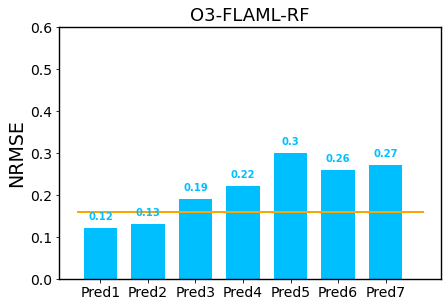

In [15]:
import matplotlib.pyplot as plt
import numpy as np
fig= plt.figure(figsize=(5.3,3.5))
ax = fig.add_axes([0,0,1,1])
x= ['Pred1', 'Pred2', 'Pred3','Pred4','Pred5','Pred6','Pred7']
students1=rmse
students2= [48,32,22,18,16]
plt.hlines([rmse_r], -0.5, 6.8, color='orange', linewidth=2)
x = np.arange(7)
wid= 0.7
graph1=ax.bar(x,students1,wid, color='#00BFFF', alpha=1)
#graph2=ax.bar(x+0.2,students2,wid, color='#00BFFF', alpha=1)
#plt.legend(['15min','60min'],title='Data resolution')
i= 0
for p in graph1:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height+0.02,
             str(students1[i]),
             ha='center',
             weight='bold',fontsize=10, color='#00BFFF', alpha=1)
    i+=1

ax.set_xticks([0,1,2,3,4,5,6])
ax.set_xticklabels(['Pred1', 'Pred2', 'Pred3','Pred4','Pred5','Pred6','Pred7'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yticks(np.arange(0,0.7, step=0.1))

#plt.xlabel('Tolerance,Tc (%)', fontsize=19)
plt.ylabel('NRMSE', fontsize=19)
plt.setp(ax.spines.values(), linewidth=1.4)
plt.title("O3-FLAML-RF",fontsize=18)
plt.savefig("Pred_O3_FLAML_RF.pdf", format="pdf", bbox_inches="tight")
plt.show()

X=CO_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour']]
y=CO_Data['Ref']
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size = 0.2,shuffle=True)

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 1440,  # in seconds
    "metric": 'rmse',
    "eval_method":'holdout',
    "task": 'regression',
    "log_file_name": "california.log",
}

Pred=[]
rmse=[]
model=[]
RS=[]
R=[]
for i in range(10):
    X_Train, X_Test, y_Train, y_Test =train_test_split(X_train,y_train,test_size = 0.2,shuffle=True)
    # Train with labeled input data
    automl.fit(X_train=X_Train.drop(['Lab1'], axis=1), y_train=y_Train,**automl_settings,estimator_list=["rf"])
    pred=automl.predict(X_test.drop(['Lab1'], axis=1))
    R2=round(sm.r2_score(y_test, pred), 2)
    r=round(np.corrcoef(y_test, pred)[0, 1],2)
    RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),5)
    #print(r,R2,RMSE)
    # Predict
    #print(automl.predict(X_test))
    # Print the best model
    #print(automl.model.estimator)
    Pred.append(pred)
    rmse.append(RMSE)
    model.append(automl.model.estimator)
    RS.append(R2)
    R.append(r)

print(np.round(np.mean(R),2),np.round(np.mean(RS),2),np.round(np.mean(rmse),2))

In [16]:
print(np.round(np.mean(R),2),np.round(np.mean(RS),2),np.round(np.mean(rmse),2))

NameError: name 'R' is not defined

Pred=[]
rmse=[]
model=[]
for i in range(20):
    X_Train, X_Test, y_Train, y_Test =train_test_split(X_train,y_train,test_size = 0.2,shuffle=True)
    # Train with labeled input data
    automl.fit(X_train=X_Train.drop(['Lab1'], axis=1), y_train=y_Train,**automl_settings,estimator_list=["xgboost"])
    pred=automl.predict(X_test.drop(['Lab1'], axis=1))
    R2=round(sm.r2_score(y_test, pred), 2)
    r=round(np.corrcoef(y_test, pred)[0, 1],2)
    RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),5)
    print(r,R2,RMSE)
    # Predict
    #print(automl.predict(X_test))
    # Print the best model
    print(automl.model.estimator)
    Pred.append(pred)
    rmse.append(RMSE)
    model.append(automl.model.estimator)

Sorted_pred=[]
sort_index = np.argsort(rmse)
for i in sort_index:
    Sorted_pred.append(Pred[i])
ind=[i for i in range(len(y_test))]
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(7,5))
plt.plot(ind[:200],y_test[:200], color='blue',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[1][:200],color='salmon',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[17][:200],color='teal',linewidth=1.5)
plt.legend(['Actual','p10','p90'],loc = 2, bbox_to_anchor = (0.75,1), fontsize=12)
#plt.plot(ind[:200],Sorted_pred[4][:200],color='black',linewidth=0.2)
#plt.fill_between(np.array(ind[:200]), np.array(Sorted_pred[0][:200]), np.array(Sorted_pred[4][:200]), 
                 #color='blue', alpha=0.15)
#plt.plot(ind,Pred[2],color='darkgoldenrod')
#plt.plot(ind,Pred[3],color='magenta')
#plt.plot(ind,Pred[4],color='purple')
plt.xlabel('Observation number',fontsize=16)
plt.ylabel('Concentraton (ppb)',fontsize=16)
plt.title('CO-XGBoost',fontsize=16)
plt.savefig("co_xgboost.pdf", format="pdf", bbox_inches="tight")

Pred=[]
rmse=[]
model=[]
for i in range(20):
    X_Train, X_Test, y_Train, y_Test =train_test_split(X_train,y_train,test_size = 0.2,shuffle=True)
    # Train with labeled input data
    automl.fit(X_train=X_Train.drop(['Lab1'], axis=1), y_train=y_Train,**automl_settings,estimator_list=["xgb_limitdepth"])
    pred=automl.predict(X_test.drop(['Lab1'], axis=1))
    R2=round(sm.r2_score(y_test, pred), 2)
    r=round(np.corrcoef(y_test, pred)[0, 1],2)
    RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),5)
    print(r,R2,RMSE)
    # Predict
    #print(automl.predict(X_test))
    # Print the best model
    print(automl.model.estimator)
    Pred.append(pred)
    rmse.append(RMSE)
    model.append(automl.model.estimator)

Sorted_pred=[]
sort_index = np.argsort(rmse)
for i in sort_index:
    Sorted_pred.append(Pred[i])
ind=[i for i in range(len(y_test))]
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(7,5))
plt.plot(ind[:200],y_test[:200], color='blue',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[1][:200],color='salmon',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[17][:200],color='teal',linewidth=1.5)
plt.legend(['Actual','p10','p90'],loc = 2, bbox_to_anchor = (0.75,1), fontsize=12)
#plt.plot(ind[:200],Sorted_pred[4][:200],color='black',linewidth=0.2)
#plt.fill_between(np.array(ind[:200]), np.array(Sorted_pred[0][:200]), np.array(Sorted_pred[4][:200]), 
                 #color='blue', alpha=0.15)
#plt.plot(ind,Pred[2],color='darkgoldenrod')
#plt.plot(ind,Pred[3],color='magenta')
#plt.plot(ind,Pred[4],color='purple')
plt.xlabel('Observation number',fontsize=16)
plt.ylabel('Concentraton (ppb)',fontsize=16)
plt.title('CO-CO-LDXGBooost',fontsize=16)
plt.savefig("co_ldxgboost.pdf", format="pdf", bbox_inches="tight")

Sorted_pred=[]
sort_index = np.argsort(rmse)
for i in sort_index:
    Sorted_pred.append(Pred[i])
ind=[i for i in range(len(y_test))]
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(7,5))
plt.plot(ind[:200],y_test[:200], color='blue',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[1][:200],color='salmon',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[17][:200],color='teal',linewidth=1.5)
plt.legend(['Actual','p10','p90'],loc = 2, bbox_to_anchor = (0.75,1), fontsize=12)
#plt.plot(ind[:200],Sorted_pred[4][:200],color='black',linewidth=0.2)
#plt.fill_between(np.array(ind[:200]), np.array(Sorted_pred[0][:200]), np.array(Sorted_pred[4][:200]), 
                 #color='blue', alpha=0.15)
#plt.plot(ind,Pred[2],color='darkgoldenrod')
#plt.plot(ind,Pred[3],color='magenta')
#plt.plot(ind,Pred[4],color='purple')
plt.xlabel('Observation number',fontsize=16)
plt.ylabel('Concentraton (ppb)',fontsize=16)
plt.title('CO-LDXGBooost',fontsize=16)
plt.savefig("co_ldxgboost.pdf", format="pdf", bbox_inches="tight")

Pred=[]
rmse=[]
model=[]
for i in range(20):
    X_Train, X_Test, y_Train, y_Test =train_test_split(X_train,y_train,test_size = 0.2,shuffle=True)
    # Train with labeled input data
    automl.fit(X_train=X_Train.drop(['Lab1'], axis=1), y_train=y_Train,**automl_settings,estimator_list=["extra_tree"])
    pred=automl.predict(X_test.drop(['Lab1'], axis=1))
    R2=round(sm.r2_score(y_test, pred), 2)
    r=round(np.corrcoef(y_test, pred)[0, 1],2)
    RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),5)
    print(r,R2,RMSE)
    # Predict
    #print(automl.predict(X_test))
    # Print the best model
    print(automl.model.estimator)
    Pred.append(pred)
    rmse.append(RMSE)
    model.append(automl.model.estimator)

Sorted_pred=[]
sort_index = np.argsort(rmse)
for i in sort_index:
    Sorted_pred.append(Pred[i])
ind=[i for i in range(len(y_test))]
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(7,5))
plt.plot(ind[:200],y_test[:200], color='blue',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[1][:200],color='salmon',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[17][:200],color='teal',linewidth=1.5)
plt.legend(['Actual','p10','p90'],loc = 2, bbox_to_anchor = (0.75,1), fontsize=12)
#plt.plot(ind[:200],Sorted_pred[4][:200],color='black',linewidth=0.2)
#plt.fill_between(np.array(ind[:200]), np.array(Sorted_pred[0][:200]), np.array(Sorted_pred[4][:200]), 
                 #color='blue', alpha=0.15)
#plt.plot(ind,Pred[2],color='darkgoldenrod')
#plt.plot(ind,Pred[3],color='magenta')
#plt.plot(ind,Pred[4],color='purple')
plt.xlabel('Observation number',fontsize=16)
plt.ylabel('Concentraton (ppb)',fontsize=16)
plt.title('CO-Extra Tree',fontsize=16)
plt.savefig("co_extra_tree.pdf", format="pdf", bbox_inches="tight")

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

from flaml.model import SKLearnEstimator

from flaml.model import SKLearnEstimator
# SKLearnEstimator is derived from BaseEstimator
import numpy as np

class RandomForestRegressor(SKLearnEstimator):
    def __init__(self, task="binary", **config):
        super().__init__(task, **config)

        if task in CLASSIFICATION:
            from sklearn.ensemble import RandomForestClassifier

            self.estimator_class =RandomForestClassifier 
        else:
            from sklearn.ensemble import RandomForestRegressor

            self.estimator_class =RandomForestRegressor

    @classmethod
    def search_space(cls, data_size, task):
        space = {
            "n_estimators": {
                "domain": {"domain": tune.loguniform(lower=100, upper=20000)},
                "low_cost_init_value": 100,
            },
            "max_features": {
                "domain": tune.loguniform(lower=0.1, upper=1),
                "low_cost_init_value": 0.1,
            },
            "max_leaf_nodes": {
                "domain": tune.lograndint(lower=100, upper=2500),
                "low_cost_init_value": 100,},
            "min_samples_split": {"domain": tune.lograndint(lower=1, upper=20),
            "init_value": 20,},
            
            "min_samples_leaf": {
                "domain": tune.lograndint(lower=1, upper=20),
                "init_value": 20,
            },
        }
        return space

from flaml import AutoML
from flaml import tune
automl = AutoML()
automl.add_learner("rfr",RandomForestRegressor )

automl_settings = {
    "time_budget": 1000,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["rfr"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)

#  NO2 DATA

X=NO2_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_O3']]#'Ref_O3'
y=NO2_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#len(X_test)
X.shape

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

# O3 DATA

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#,'Ref_CO','Ref_NO2','Ref_SO2'
X=O3_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_NO2']]#,'Ref_NO2'
y=O3_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X)

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

# SO2 DATA

In [ ]:
import pandas as pd
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

In [ ]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('Conc_SO2.txt', header = None,low_memory=False)
data.columns=['Lab2','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_so2=data
#signal=np.array(WE)-np.array(AE)
#Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data=SO2_Data.resample('5min').mean()
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna() 
data = pd.read_csv('SO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_SO2['Ref']=Ref_SO2
WE=Data_SO2['WE'].to_list()
AE=Data_SO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_SO2['Lab2']=Data_so2['Lab2'].to_list()
Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data.shape

In [ ]:
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna()
SO2_Data=SO2_Data.resample('h').mean()
SO2_Data=SO2_Data.dropna()
SO2_Data.head()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#'Ref_CO','Ref_NO2','Ref_O3',
X=SO2_Data[['Net Signal','Lab2','Temp','RH','Month','Day_of_week','Hour']]
y=SO2_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X)

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab2'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab2'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab2'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

In [1]:
import pandas as pd
from pandas import MultiIndex, Int16Dtype
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

In [2]:
from platform import python_version
 
 
print("Current Python Version-", python_version())

Current Python Version- 3.8.6


In [3]:
import numpy
numpy.version.version

'1.23.5'

In [4]:
import random
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('CO.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO['Ref']=Ref_CO
index_names = Data_CO[ (Data_CO['WE'] >1000)].index
Data_CO.drop(index_names, inplace = True)
WE=Data_CO['WE'].to_list()
AE=Data_CO['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
data = pd.read_csv('Conc_CO.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO.drop(index_names, inplace = True)
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
CO_Data=CO_Data.resample('h').mean()
CO_Data=CO_Data.dropna()
CO_Data.tail()

Lab1       Temp         RH         Ref  Net Signal  \
Date                                                                            
2020-04-30 19:00:00  242.060716  18.870796  71.072939  188.915151   91.471325   
2020-04-30 20:00:00  218.655079  18.056864  75.132153  178.704750   84.176485   
2020-04-30 21:00:00  194.147868  17.090891  81.315038  161.421792   73.858294   
2020-04-30 22:00:00  206.432889  16.714085  82.568155  197.744043   83.279611   
2020-04-30 23:00:00  173.577429  16.365121  83.662401  162.157636   68.669099   

                     Month  Day_of_week   Day  Hour  
Date                                                 
2020-04-30 19:00:00    4.0          3.0  30.0  19.0  
2020-04-30 20:00:00    4.0          3.0  30.0  20.0  
2020-04-30 21:00:00    4.0          3.0  30.0  21.0  
2020-04-30 22:00:00    4.0          3.0  30.0  22.0  
2020-04-30 23:00:00    4.0          3.0  30.0  23.0

In [5]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna() 
O3_Data=O3_Data.resample('h').mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

ref_O3=Data_O3['Ref'].to_list()
len(ref_O3)

60913

In [6]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('NO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
Data_NO2['Ref']=Ref_NO2
WE=Data_NO2['WE'].to_list()
AE=Data_NO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
data = pd.read_csv('Conc_NO2.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉") 
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
signal=np.array(WE)-np.array(AE)
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
Data_NO2['Ref_O3']=ref_O3
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
NO2_Data=NO2_Data.resample('h').mean()
NO2_Data=NO2_Data.dropna()

In [7]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
ref_NO2=Data_NO2['Ref'].to_list()
Data_O3['Ref_NO2']=ref_NO2
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
O3_Data=O3_Data.resample('h').mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

Lab1       Temp         RH        Ref  Net Signal  \
Date                                                                           
2019-10-02 11:00:00  621.625704  26.378438  58.063437  46.094860    3.605625   
2019-10-02 12:00:00  725.154408  25.795055  48.256857  57.532808   13.865109   
2019-10-07 10:00:00  108.196313  32.344264  37.260757  47.259008   11.447809   
2019-10-07 11:00:00  135.822676  34.926112  35.013036  42.114260   10.075221   
2019-10-07 12:00:00  203.757758  36.201221  31.829282  45.701366    7.624153   

                     Month  Day_of_week  Day  Hour    Ref_NO2  
Date                                                           
2019-10-02 11:00:00   10.0          2.0  2.0  11.0  15.230400  
2019-10-02 12:00:00   10.0          2.0  2.0  12.0   5.384051  
2019-10-07 10:00:00   10.0          0.0  7.0  10.0   4.255772  
2019-10-07 11:00:00   10.0          0.0  7.0  11.0  16.268034  
2019-10-07 12:00:00   10.0          0.0  7.0  12.0  12.770444

# CO DATA

In [8]:
from sktime.performance_metrics.forecasting import sMAPE, smape_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from flaml import AutoML
from sklearn.datasets import fetch_california_housing
#'Ref_NO2','Ref_SO2','Ref_O3',
#,'Month','Day_of_week','Day','Hour'

#train_test_split(X, y, test_size = 0.2)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [9]:
from flaml.model import SKLearnEstimator
# SKLearnEstimator is derived from BaseEstimator

In [10]:
df1=[x for _, x in O3_Data.groupby('Month')]
data_oct=df1[4]
#data_oct=data_oct.sample(frac=1)
data_nov=df1[5]
#data_nov=data_nov.sample(frac=1)
data_dec=df1[6]
#data_dec=data_dec.sample(frac=1)
data_jan=df1[0]
#data_jan=data_jan.sample(frac=1)
data_feb=df1[1]
#data_feb=data_feb.sample(frac=1)
data_mar=df1[2]
#data_mar=data_mar.sample(frac=1)
data_apr=df1[3]
#data_apr=data_apr.sample(frac=1)
data=[data_oct,data_nov,data_dec,data_jan,data_feb,data_mar]

In [11]:
data_Oct=data_oct.resample('60min').mean()
data_Oct=data_Oct.dropna()
data_Nov=data_nov.resample('60min').mean()
data_Nov=data_Nov.dropna()
data_Dec=data_dec.resample('60min').mean()
data_Dec=data_Dec.dropna()
data_Jan=data_jan.resample('60min').mean()
data_Jan=data_Jan.dropna()
data_Feb=data_feb.resample('60min').mean()
data_Feb=data_Feb.dropna()
data_Mar=data_mar.resample('60min').mean()
data_Mar=data_Mar.dropna()
data_Apr=data_apr.resample('60min').mean()
data_Apr=data_Apr.dropna()

In [12]:
co_data=O3_Data
co_data=co_data.resample('60min').mean()
co_data=co_data.dropna()
X=co_data[['Net Signal','Temp','RH','Month','Day_of_week','Hour','Ref_NO2']]
y=co_data['Ref']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=1)
from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 500,  # in seconds
    "metric": 'rmse',
    "eval_method":'holdout',
    "task": 'regression',
    "log_file_name": "california.log",
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings,estimator_list=["xgboost"])#,estimator_list=["xgboost"]
pred=automl.predict(X_test)
rmse_r=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)

[flaml.automl: 12-19 16:08:00] {2599} INFO - task = regression
[flaml.automl: 12-19 16:08:00] {2601} INFO - Data split method: uniform
[flaml.automl: 12-19 16:08:00] {2604} INFO - Evaluation method: holdout
[flaml.automl: 12-19 16:08:00] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-19 16:08:00] {2870} INFO - List of ML learners in AutoML Run: ['xgboost']
[flaml.automl: 12-19 16:08:00] {3166} INFO - iteration 0, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:08:00] {3296} INFO - Estimated sufficient time budget=965s. Estimated ne

[flaml.automl: 12-19 16:08:02] {3343} INFO -  at 1.8s,	estimator xgboost's best error=4.2628,	best estimator xgboost's best error=4.2628
[flaml.automl: 12-19 16:08:02] {3166} INFO - iteration 12, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:08:02] {3343} INFO -  at 2.0s,	estimator xgboost's best error=3.4736,	best estimator xgboost's best error=3.4736
[flaml.automl: 12-19 16:08:02] {3166} INFO - iteration 13, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:08:05] {3343} INFO -  at 5.7s,	estimator xgboost's best error=3.2617,	best estimator xgboost's best error=3.2617
[flaml.automl: 12-19 16:08:05] {3166} INFO - iteration 25, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `s

[flaml.automl: 12-19 16:08:24] {3343} INFO -  at 23.9s,	estimator xgboost's best error=2.9793,	best estimator xgboost's best error=2.9793
[flaml.automl: 12-19 16:08:24] {3166} INFO - iteration 37, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:08:36] {3343} INFO -  at 36.3s,	estimator xgboost's best error=2.9793,	best estimator xgboost's best error=2.9793
[flaml.automl: 12-19 16:08:36] {3166} INFO - iteration 38, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarni

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:09:56] {3343} INFO -  at 116.3s,	estimator xgboost's best error=2.9793,	best estimator xgboost's best error=2.9793
[flaml.automl: 12-19 16:09:56] {3166} INFO - iteration 50, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use 

[flaml.automl: 12-19 16:11:23] {3343} INFO -  at 202.9s,	estimator xgboost's best error=2.9793,	best estimator xgboost's best error=2.9793
[flaml.automl: 12-19 16:11:23] {3166} INFO - iteration 62, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:11:31] {3343} INFO -  at 211.6s,	estimator xgboost's best error=2.9498,	best estimator xgboost's best error=2.9498
[flaml.automl: 12-19 16:11:31] {3166} INFO - iteration 63, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWar

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:13:36] {3343} INFO -  at 335.9s,	estimator xgboost's best error=2.9433,	best estimator xgboost's best error=2.9433
[flaml.automl: 12-19 16:13:36] {3166} INFO - iteration 75, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use 

[flaml.automl: 12-19 16:15:18] {3343} INFO -  at 438.6s,	estimator xgboost's best error=2.8845,	best estimator xgboost's best error=2.8845
[flaml.automl: 12-19 16:15:18] {3166} INFO - iteration 87, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:15:26] {3343} INFO -  at 446.5s,	estimator xgboost's best error=2.8845,	best estimator xgboost's best error=2.8845
[flaml.automl: 12-19 16:15:26] {3166} INFO - iteration 88, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWar

In [13]:
from sklearn.neighbors import LocalOutlierFactor
A=['Net Signal','Temp','RH','Month','Day_of_week','Hour','Ref_NO2']
B='Ref'
frame1=[data_Oct,data_Nov,data_Dec,data_Jan,data_Feb,data_Mar]#,data_feb
Train1=pd.concat(frame1)
train1=Train1.sample(frac=1)
lof = LocalOutlierFactor()
yhat = lof.fit_predict(train1)
mask = yhat != -1
train1= train1[mask]
test1=data_Apr
yhat = lof.fit_predict(test1)
mask = yhat != -1
test1= test1[mask]

frame2=[data_Oct,data_Nov,data_Dec,data_Jan,data_Feb,data_Apr]#,data_feb
Train2=pd.concat(frame2)
train2=Train2.sample(frac=1)
yhat = lof.fit_predict(train2)
mask = yhat != -1
train2= train2[mask]
test2=data_Mar
yhat = lof.fit_predict(test2)
mask = yhat != -1
test2= test2[mask]

frame3=[data_Oct,data_Nov,data_Dec,data_Jan,data_Mar,data_Apr]#,data_feb
Train3=pd.concat(frame3)
train3=Train3.sample(frac=1)
yhat = lof.fit_predict(train3)
mask = yhat != -1
train3= train3[mask]
test3=data_Feb
yhat = lof.fit_predict(test3)
mask = yhat != -1
test3= test3[mask]

frame4=[data_Oct,data_Nov,data_Dec,data_Feb,data_Mar,data_Apr]#,data_feb
Train4=pd.concat(frame4)
train4=Train4.sample(frac=1)
yhat = lof.fit_predict(train4)
mask = yhat != -1
train4= train4[mask]
test4=data_Jan
yhat = lof.fit_predict(test4)
mask = yhat != -1
test4= test4[mask]

frame5=[data_Oct,data_Nov,data_Jan,data_Feb,data_Mar,data_Apr]#,data_feb
Train5=pd.concat(frame5)
train5=Train5.sample(frac=1)
yhat = lof.fit_predict(train5)
mask = yhat != -1
train5= train5[mask]
test5=data_Dec
yhat = lof.fit_predict(test5)
mask = yhat != -1
test5= test5[mask]

frame6=[data_Oct,data_Dec,data_Jan,data_Feb,data_Mar,data_Apr]#,data_feb
Train6=pd.concat(frame6)
train6=Train6.sample(frac=1)
yhat = lof.fit_predict(train6)
mask = yhat != -1
train6= train6[mask]
test6=data_Nov
yhat = lof.fit_predict(test6)
mask = yhat != -1
test6= test6[mask]

frame7=[data_Nov,data_Dec,data_Jan,data_Feb,data_Mar,data_Apr]#,data_feb
Train7=pd.concat(frame7)
train7=Train7.sample(frac=1)
yhat = lof.fit_predict(train7)
mask = yhat != -1
train7= train7[mask]
test7=data_Oct
yhat = lof.fit_predict(test7)
mask = yhat != -1
test7= test7[mask]


Train=[train1,train2,train3,train4,train5,train6,train7]
Test=[test1,test2,test3,test4,test5,test6,test7]

In [14]:
from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 500,  # in seconds
    "metric": 'rmse',
    "eval_method":'holdout',
    "task": 'regression',
    "log_file_name": "california.log",
}

rmse=[]

# Train with labeled input data
for i in range(7):
    automl.fit(X_train=Train[i][A], y_train=Train[i][B],
           **automl_settings,estimator_list=["xgboost"])#,estimator_list=["xgboost"]
    pred=automl.predict(Test[i][A])
    R2=round(sm.r2_score(Test[i][B], pred), 2)
    r=round(np.corrcoef(Test[i][B], pred)[0, 1],2)
    RMSE=round(np.sqrt(sm.mean_squared_error(Test[i][B], pred))/np.mean(Test[i][B]),2)
    rmse.append(RMSE)
    print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
#print(automl.model.estimator)

[flaml.automl: 12-19 16:16:40] {2599} INFO - task = regression
[flaml.automl: 12-19 16:16:40] {2601} INFO - Data split method: uniform
[flaml.automl: 12-19 16:16:40] {2604} INFO - Evaluation method: holdout
[flaml.automl: 12-19 16:16:40] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-19 16:16:40] {2870} INFO - List of ML learners in AutoML Run: ['xgboost']
[flaml.automl: 12-19 16:16:40] {3166} INFO - iteration 0, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:16:40] {3296} INFO - Estimated sufficient time budget=1896s. Estimated n

[flaml.automl: 12-19 16:16:42] {3343} INFO -  at 2.3s,	estimator xgboost's best error=3.5876,	best estimator xgboost's best error=3.5876
[flaml.automl: 12-19 16:16:42] {3166} INFO - iteration 12, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:16:42] {3343} INFO -  at 2.4s,	estimator xgboost's best error=2.9923,	best estimator xgboost's best error=2.9923
[flaml.automl: 12-19 16:16:42] {3166} INFO - iteration 13, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:16:46] {3343} INFO -  at 6.4s,	estimator xgboost's best error=2.8214,	best estimator xgboost's best error=2.8214
[flaml.automl: 12-19 16:16:46] {3166} INFO - iteration 25, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `s

[flaml.automl: 12-19 16:17:06] {3343} INFO -  at 26.7s,	estimator xgboost's best error=2.5698,	best estimator xgboost's best error=2.5698
[flaml.automl: 12-19 16:17:06] {3166} INFO - iteration 37, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:17:14] {3343} INFO -  at 34.0s,	estimator xgboost's best error=2.5437,	best estimator xgboost's best error=2.5437
[flaml.automl: 12-19 16:17:14] {3166} INFO - iteration 38, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarni

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:18:47] {3343} INFO -  at 127.2s,	estimator xgboost's best error=2.4279,	best estimator xgboost's best error=2.4279
[flaml.automl: 12-19 16:18:47] {3166} INFO - iteration 50, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use 

[flaml.automl: 12-19 16:22:09] {3343} INFO -  at 330.0s,	estimator xgboost's best error=2.4115,	best estimator xgboost's best error=2.4115
[flaml.automl: 12-19 16:22:09] {3166} INFO - iteration 62, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:22:21] {3343} INFO -  at 341.5s,	estimator xgboost's best error=2.4115,	best estimator xgboost's best error=2.4115
[flaml.automl: 12-19 16:22:21] {3166} INFO - iteration 63, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWar

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:24:45] {3343} INFO -  at 485.6s,	estimator xgboost's best error=2.4115,	best estimator xgboost's best error=2.4115
[flaml.automl: 12-19 16:24:45] {3166} INFO - iteration 75, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use 

0.94 0.88 0.11


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:25:09] {3296} INFO - Estimated sufficient time budget=1138s. Estimated necessary time budget=1s.
[flaml.automl: 12-19 16:25:09] {3343} INFO -  at 0.2s,	estimator xgboost's best error=15.2715,	best estimator xgboost's best error=15.2715
[flaml.automl: 12-19 16:25:09] {3166} INFO - iteration 1, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, th

[flaml.automl: 12-19 16:25:12] {3343} INFO -  at 3.9s,	estimator xgboost's best error=3.5059,	best estimator xgboost's best error=3.5059
[flaml.automl: 12-19 16:25:12] {3166} INFO - iteration 13, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:25:13] {3343} INFO -  at 4.4s,	estimator xgboost's best error=3.5059,	best estimator xgboost's best error=3.5059
[flaml.automl: 12-19 16:25:13] {3166} INFO - iteration 14, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:25:19] {3343} INFO -  at 10.6s,	estimator xgboost's best error=3.0390,	best estimator xgboost's best error=3.0390
[flaml.automl: 12-19 16:25:19] {3166} INFO - iteration 26, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `

[flaml.automl: 12-19 16:25:41] {3343} INFO -  at 32.5s,	estimator xgboost's best error=2.9133,	best estimator xgboost's best error=2.9133
[flaml.automl: 12-19 16:25:41] {3166} INFO - iteration 38, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:25:42] {3343} INFO -  at 34.0s,	estimator xgboost's best error=2.9133,	best estimator xgboost's best error=2.9133
[flaml.automl: 12-19 16:25:42] {3166} INFO - iteration 39, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarni

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:26:10] {3343} INFO -  at 62.1s,	estimator xgboost's best error=2.7631,	best estimator xgboost's best error=2.7631
[flaml.automl: 12-19 16:26:11] {3166} INFO - iteration 51, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `

[flaml.automl: 12-19 16:27:04] {3343} INFO -  at 115.7s,	estimator xgboost's best error=2.7631,	best estimator xgboost's best error=2.7631
[flaml.automl: 12-19 16:27:04] {3166} INFO - iteration 63, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:27:08] {3343} INFO -  at 119.2s,	estimator xgboost's best error=2.7631,	best estimator xgboost's best error=2.7631
[flaml.automl: 12-19 16:27:08] {3166} INFO - iteration 64, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWar

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:27:57] {3343} INFO -  at 168.2s,	estimator xgboost's best error=2.7631,	best estimator xgboost's best error=2.7631
[flaml.automl: 12-19 16:27:57] {3166} INFO - iteration 76, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use 

[flaml.automl: 12-19 16:28:42] {3343} INFO -  at 213.2s,	estimator xgboost's best error=2.7631,	best estimator xgboost's best error=2.7631
[flaml.automl: 12-19 16:28:42] {3166} INFO - iteration 88, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:28:43] {3343} INFO -  at 214.5s,	estimator xgboost's best error=2.7631,	best estimator xgboost's best error=2.7631
[flaml.automl: 12-19 16:28:43] {3166} INFO - iteration 89, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWar

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:29:35] {3343} INFO -  at 266.2s,	estimator xgboost's best error=2.7631,	best estimator xgboost's best error=2.7631
[flaml.automl: 12-19 16:29:35] {3166} INFO - iteration 101, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use

[flaml.automl: 12-19 16:30:35] {3343} INFO -  at 326.2s,	estimator xgboost's best error=2.7631,	best estimator xgboost's best error=2.7631
[flaml.automl: 12-19 16:30:35] {3166} INFO - iteration 113, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:30:41] {3343} INFO -  at 332.9s,	estimator xgboost's best error=2.7631,	best estimator xgboost's best error=2.7631
[flaml.automl: 12-19 16:30:41] {3166} INFO - iteration 114, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureW

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:31:32] {3343} INFO -  at 384.0s,	estimator xgboost's best error=2.7631,	best estimator xgboost's best error=2.7631
[flaml.automl: 12-19 16:31:32] {3166} INFO - iteration 126, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use

[flaml.automl: 12-19 16:32:36] {3343} INFO -  at 447.7s,	estimator xgboost's best error=2.7391,	best estimator xgboost's best error=2.7391
[flaml.automl: 12-19 16:32:36] {3166} INFO - iteration 138, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:32:40] {3343} INFO -  at 451.5s,	estimator xgboost's best error=2.7391,	best estimator xgboost's best error=2.7391
[flaml.automl: 12-19 16:32:40] {3166} INFO - iteration 139, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureW

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:33:21] {3343} INFO -  at 492.8s,	estimator xgboost's best error=2.7391,	best estimator xgboost's best error=2.7391
[flaml.automl: 12-19 16:33:21] {3166} INFO - iteration 151, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use

0.96 0.92 0.13


[flaml.automl: 12-19 16:33:31] {2599} INFO - task = regression
[flaml.automl: 12-19 16:33:31] {2601} INFO - Data split method: uniform
[flaml.automl: 12-19 16:33:31] {2604} INFO - Evaluation method: holdout
[flaml.automl: 12-19 16:33:31] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-19 16:33:31] {2870} INFO - List of ML learners in AutoML Run: ['xgboost']
[flaml.automl: 12-19 16:33:31] {3166} INFO - iteration 0, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:33:32] {3296} INFO - Estimated sufficient time budget=1877s. Estimated n

[flaml.automl: 12-19 16:33:35] {3343} INFO -  at 3.7s,	estimator xgboost's best error=3.6213,	best estimator xgboost's best error=3.6213
[flaml.automl: 12-19 16:33:35] {3166} INFO - iteration 12, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:33:35] {3343} INFO -  at 4.1s,	estimator xgboost's best error=3.2783,	best estimator xgboost's best error=3.2783
[flaml.automl: 12-19 16:33:35] {3166} INFO - iteration 13, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:33:45] {3343} INFO -  at 13.5s,	estimator xgboost's best error=2.8976,	best estimator xgboost's best error=2.8976
[flaml.automl: 12-19 16:33:45] {3166} INFO - iteration 25, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `

[flaml.automl: 12-19 16:34:54] {3343} INFO -  at 83.0s,	estimator xgboost's best error=2.5963,	best estimator xgboost's best error=2.5963
[flaml.automl: 12-19 16:34:54] {3166} INFO - iteration 37, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:35:13] {3343} INFO -  at 102.2s,	estimator xgboost's best error=2.5963,	best estimator xgboost's best error=2.5963
[flaml.automl: 12-19 16:35:13] {3166} INFO - iteration 38, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarn

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:36:49] {3343} INFO -  at 197.8s,	estimator xgboost's best error=2.5237,	best estimator xgboost's best error=2.5237
[flaml.automl: 12-19 16:36:49] {3166} INFO - iteration 50, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use 

[flaml.automl: 12-19 16:40:47] {3343} INFO -  at 436.0s,	estimator xgboost's best error=2.5158,	best estimator xgboost's best error=2.5158
[flaml.automl: 12-19 16:40:47] {3166} INFO - iteration 62, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:41:20] {3343} INFO -  at 469.0s,	estimator xgboost's best error=2.5158,	best estimator xgboost's best error=2.5158
[flaml.automl: 12-19 16:41:20] {3166} INFO - iteration 63, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWar

0.97 0.91 0.19


[flaml.automl: 12-19 16:42:43] {2599} INFO - task = regression
[flaml.automl: 12-19 16:42:43] {2601} INFO - Data split method: uniform
[flaml.automl: 12-19 16:42:43] {2604} INFO - Evaluation method: holdout
[flaml.automl: 12-19 16:42:43] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-19 16:42:43] {2870} INFO - List of ML learners in AutoML Run: ['xgboost']
[flaml.automl: 12-19 16:42:43] {3166} INFO - iteration 0, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:42:44] {3296} INFO - Estimated sufficient time budget=1654s. Estimated n

[flaml.automl: 12-19 16:42:46] {3343} INFO -  at 3.4s,	estimator xgboost's best error=3.5852,	best estimator xgboost's best error=3.5852
[flaml.automl: 12-19 16:42:46] {3166} INFO - iteration 12, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:42:47] {3343} INFO -  at 3.8s,	estimator xgboost's best error=3.2882,	best estimator xgboost's best error=3.2882
[flaml.automl: 12-19 16:42:47] {3166} INFO - iteration 13, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:42:53] {3343} INFO -  at 10.2s,	estimator xgboost's best error=2.8457,	best estimator xgboost's best error=2.8457
[flaml.automl: 12-19 16:42:53] {3166} INFO - iteration 25, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `

[flaml.automl: 12-19 16:43:18] {3343} INFO -  at 34.8s,	estimator xgboost's best error=2.7300,	best estimator xgboost's best error=2.7300
[flaml.automl: 12-19 16:43:18] {3166} INFO - iteration 37, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:43:22] {3343} INFO -  at 38.7s,	estimator xgboost's best error=2.7300,	best estimator xgboost's best error=2.7300
[flaml.automl: 12-19 16:43:22] {3166} INFO - iteration 38, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarni

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:43:47] {3343} INFO -  at 63.6s,	estimator xgboost's best error=2.7300,	best estimator xgboost's best error=2.7300
[flaml.automl: 12-19 16:43:47] {3166} INFO - iteration 50, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `

[flaml.automl: 12-19 16:44:17] {3343} INFO -  at 94.2s,	estimator xgboost's best error=2.7194,	best estimator xgboost's best error=2.7194
[flaml.automl: 12-19 16:44:17] {3166} INFO - iteration 62, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:44:19] {3343} INFO -  at 95.9s,	estimator xgboost's best error=2.7194,	best estimator xgboost's best error=2.7194
[flaml.automl: 12-19 16:44:19] {3166} INFO - iteration 63, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarni

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:44:57] {3343} INFO -  at 133.9s,	estimator xgboost's best error=2.7194,	best estimator xgboost's best error=2.7194
[flaml.automl: 12-19 16:44:57] {3166} INFO - iteration 75, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use 

[flaml.automl: 12-19 16:45:27] {3343} INFO -  at 163.7s,	estimator xgboost's best error=2.7194,	best estimator xgboost's best error=2.7194
[flaml.automl: 12-19 16:45:27] {3166} INFO - iteration 87, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:45:30] {3343} INFO -  at 167.1s,	estimator xgboost's best error=2.7194,	best estimator xgboost's best error=2.7194
[flaml.automl: 12-19 16:45:30] {3166} INFO - iteration 88, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWar

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:46:11] {3343} INFO -  at 207.6s,	estimator xgboost's best error=2.6615,	best estimator xgboost's best error=2.6615
[flaml.automl: 12-19 16:46:11] {3166} INFO - iteration 100, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use

[flaml.automl: 12-19 16:47:08] {3343} INFO -  at 264.4s,	estimator xgboost's best error=2.6615,	best estimator xgboost's best error=2.6615
[flaml.automl: 12-19 16:47:08] {3166} INFO - iteration 112, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:47:17] {3343} INFO -  at 274.3s,	estimator xgboost's best error=2.6615,	best estimator xgboost's best error=2.6615
[flaml.automl: 12-19 16:47:17] {3166} INFO - iteration 113, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureW

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:48:36] {3343} INFO -  at 352.9s,	estimator xgboost's best error=2.6615,	best estimator xgboost's best error=2.6615
[flaml.automl: 12-19 16:48:36] {3166} INFO - iteration 125, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use

[flaml.automl: 12-19 16:50:52] {3343} INFO -  at 489.1s,	estimator xgboost's best error=2.6580,	best estimator xgboost's best error=2.6580
[flaml.automl: 12-19 16:50:52] {3166} INFO - iteration 137, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:50:59] {3343} INFO -  at 496.3s,	estimator xgboost's best error=2.6580,	best estimator xgboost's best error=2.6580
[flaml.automl: 12-19 16:51:06] {3602} INFO - retrain xgboost for 6.3s
[flaml.automl: 12-19 16:51:06] {3609} INFO - retrained model: XGBRegressor(base_score=0.5, booster='gbtree',
           

0.97 0.92 0.23


[flaml.automl: 12-19 16:51:07] {2599} INFO - task = regression
[flaml.automl: 12-19 16:51:07] {2601} INFO - Data split method: uniform
[flaml.automl: 12-19 16:51:07] {2604} INFO - Evaluation method: holdout
[flaml.automl: 12-19 16:51:07] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-19 16:51:07] {2870} INFO - List of ML learners in AutoML Run: ['xgboost']
[flaml.automl: 12-19 16:51:07] {3166} INFO - iteration 0, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:51:07] {3296} INFO - Estimated sufficient time budget=2085s. Estimated n

[flaml.automl: 12-19 16:51:11] {3343} INFO -  at 4.5s,	estimator xgboost's best error=3.6239,	best estimator xgboost's best error=3.6239
[flaml.automl: 12-19 16:51:11] {3166} INFO - iteration 12, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:51:11] {3343} INFO -  at 5.0s,	estimator xgboost's best error=3.2711,	best estimator xgboost's best error=3.2711
[flaml.automl: 12-19 16:51:11] {3166} INFO - iteration 13, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:51:18] {3343} INFO -  at 11.9s,	estimator xgboost's best error=2.6672,	best estimator xgboost's best error=2.6672
[flaml.automl: 12-19 16:51:18] {3166} INFO - iteration 25, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `

[flaml.automl: 12-19 16:51:41] {3343} INFO -  at 34.7s,	estimator xgboost's best error=2.5828,	best estimator xgboost's best error=2.5828
[flaml.automl: 12-19 16:51:41] {3166} INFO - iteration 37, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:51:45] {3343} INFO -  at 38.3s,	estimator xgboost's best error=2.5828,	best estimator xgboost's best error=2.5828
[flaml.automl: 12-19 16:51:45] {3166} INFO - iteration 38, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarni

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:52:10] {3343} INFO -  at 63.2s,	estimator xgboost's best error=2.5828,	best estimator xgboost's best error=2.5828
[flaml.automl: 12-19 16:52:10] {3166} INFO - iteration 50, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `

[flaml.automl: 12-19 16:52:40] {3343} INFO -  at 94.0s,	estimator xgboost's best error=2.5828,	best estimator xgboost's best error=2.5828
[flaml.automl: 12-19 16:52:40] {3166} INFO - iteration 62, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:52:43] {3343} INFO -  at 96.4s,	estimator xgboost's best error=2.5828,	best estimator xgboost's best error=2.5828
[flaml.automl: 12-19 16:52:43] {3166} INFO - iteration 63, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarni

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:53:15] {3343} INFO -  at 128.8s,	estimator xgboost's best error=2.5828,	best estimator xgboost's best error=2.5828
[flaml.automl: 12-19 16:53:15] {3166} INFO - iteration 75, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use 

[flaml.automl: 12-19 16:53:42] {3343} INFO -  at 155.6s,	estimator xgboost's best error=2.5828,	best estimator xgboost's best error=2.5828
[flaml.automl: 12-19 16:53:42] {3166} INFO - iteration 87, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:53:46] {3343} INFO -  at 159.5s,	estimator xgboost's best error=2.5828,	best estimator xgboost's best error=2.5828
[flaml.automl: 12-19 16:53:46] {3166} INFO - iteration 88, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWar

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:54:10] {3343} INFO -  at 183.3s,	estimator xgboost's best error=2.5828,	best estimator xgboost's best error=2.5828
[flaml.automl: 12-19 16:54:10] {3166} INFO - iteration 100, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use

[flaml.automl: 12-19 16:54:35] {3343} INFO -  at 209.1s,	estimator xgboost's best error=2.5828,	best estimator xgboost's best error=2.5828
[flaml.automl: 12-19 16:54:35] {3166} INFO - iteration 112, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:54:41] {3343} INFO -  at 215.0s,	estimator xgboost's best error=2.5828,	best estimator xgboost's best error=2.5828
[flaml.automl: 12-19 16:54:41] {3166} INFO - iteration 113, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureW

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:57:11] {3343} INFO -  at 364.7s,	estimator xgboost's best error=2.5136,	best estimator xgboost's best error=2.5136
[flaml.automl: 12-19 16:57:11] {3166} INFO - iteration 125, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use

0.94 0.61 0.57


[flaml.automl: 12-19 16:59:22] {2599} INFO - task = regression
[flaml.automl: 12-19 16:59:22] {2601} INFO - Data split method: uniform
[flaml.automl: 12-19 16:59:22] {2604} INFO - Evaluation method: holdout
[flaml.automl: 12-19 16:59:22] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-19 16:59:22] {2870} INFO - List of ML learners in AutoML Run: ['xgboost']
[flaml.automl: 12-19 16:59:22] {3166} INFO - iteration 0, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:59:23] {3296} INFO - Estimated sufficient time budget=3237s. Estimated n

[flaml.automl: 12-19 16:59:26] {3343} INFO -  at 3.6s,	estimator xgboost's best error=3.4628,	best estimator xgboost's best error=3.4628
[flaml.automl: 12-19 16:59:26] {3166} INFO - iteration 12, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:59:26] {3343} INFO -  at 4.0s,	estimator xgboost's best error=3.2675,	best estimator xgboost's best error=3.2675
[flaml.automl: 12-19 16:59:26] {3166} INFO - iteration 13, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:59:38] {3343} INFO -  at 16.5s,	estimator xgboost's best error=2.8308,	best estimator xgboost's best error=2.8308
[flaml.automl: 12-19 16:59:38] {3166} INFO - iteration 25, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `

[flaml.automl: 12-19 17:00:22] {3343} INFO -  at 59.7s,	estimator xgboost's best error=2.5166,	best estimator xgboost's best error=2.5166
[flaml.automl: 12-19 17:00:22] {3166} INFO - iteration 37, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:00:26] {3343} INFO -  at 64.3s,	estimator xgboost's best error=2.5166,	best estimator xgboost's best error=2.5166
[flaml.automl: 12-19 17:00:26] {3166} INFO - iteration 38, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarni

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:01:13] {3343} INFO -  at 111.1s,	estimator xgboost's best error=2.5166,	best estimator xgboost's best error=2.5166
[flaml.automl: 12-19 17:01:13] {3166} INFO - iteration 50, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use 

[flaml.automl: 12-19 17:02:37] {3343} INFO -  at 194.8s,	estimator xgboost's best error=2.4439,	best estimator xgboost's best error=2.4439
[flaml.automl: 12-19 17:02:37] {3166} INFO - iteration 62, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:02:42] {3343} INFO -  at 199.6s,	estimator xgboost's best error=2.4439,	best estimator xgboost's best error=2.4439
[flaml.automl: 12-19 17:02:42] {3166} INFO - iteration 63, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWar

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:04:21] {3343} INFO -  at 298.7s,	estimator xgboost's best error=2.4439,	best estimator xgboost's best error=2.4439
[flaml.automl: 12-19 17:04:21] {3166} INFO - iteration 75, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use 

[flaml.automl: 12-19 17:05:51] {3343} INFO -  at 388.8s,	estimator xgboost's best error=2.4439,	best estimator xgboost's best error=2.4439
[flaml.automl: 12-19 17:05:51] {3166} INFO - iteration 87, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:05:53] {3343} INFO -  at 391.6s,	estimator xgboost's best error=2.4439,	best estimator xgboost's best error=2.4439
[flaml.automl: 12-19 17:05:53] {3166} INFO - iteration 88, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWar

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:06:56] {3343} INFO -  at 454.2s,	estimator xgboost's best error=2.4439,	best estimator xgboost's best error=2.4439
[flaml.automl: 12-19 17:06:56] {3166} INFO - iteration 100, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use

0.97 0.93 0.27


[flaml.automl: 12-19 17:07:44] {2599} INFO - task = regression
[flaml.automl: 12-19 17:07:45] {2601} INFO - Data split method: uniform
[flaml.automl: 12-19 17:07:45] {2604} INFO - Evaluation method: holdout
[flaml.automl: 12-19 17:07:45] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-19 17:07:45] {2870} INFO - List of ML learners in AutoML Run: ['xgboost']
[flaml.automl: 12-19 17:07:45] {3166} INFO - iteration 0, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:07:45] {3296} INFO - Estimated sufficient time budget=3045s. Estimated n

[flaml.automl: 12-19 17:07:48] {3343} INFO -  at 4.1s,	estimator xgboost's best error=3.4355,	best estimator xgboost's best error=3.4355
[flaml.automl: 12-19 17:07:48] {3166} INFO - iteration 12, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:07:49] {3343} INFO -  at 4.6s,	estimator xgboost's best error=3.1188,	best estimator xgboost's best error=3.1188
[flaml.automl: 12-19 17:07:49] {3166} INFO - iteration 13, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:07:56] {3343} INFO -  at 12.1s,	estimator xgboost's best error=2.8914,	best estimator xgboost's best error=2.8914
[flaml.automl: 12-19 17:07:56] {3166} INFO - iteration 25, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `

[flaml.automl: 12-19 17:08:17] {3343} INFO -  at 32.8s,	estimator xgboost's best error=2.5849,	best estimator xgboost's best error=2.5849
[flaml.automl: 12-19 17:08:17] {3166} INFO - iteration 37, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:08:20] {3343} INFO -  at 35.7s,	estimator xgboost's best error=2.5558,	best estimator xgboost's best error=2.5558
[flaml.automl: 12-19 17:08:20] {3166} INFO - iteration 38, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarni

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:08:37] {3343} INFO -  at 52.7s,	estimator xgboost's best error=2.5290,	best estimator xgboost's best error=2.5290
[flaml.automl: 12-19 17:08:37] {3166} INFO - iteration 50, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `

[flaml.automl: 12-19 17:08:59] {3343} INFO -  at 74.6s,	estimator xgboost's best error=2.5290,	best estimator xgboost's best error=2.5290
[flaml.automl: 12-19 17:08:59] {3166} INFO - iteration 62, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:09:00] {3343} INFO -  at 75.9s,	estimator xgboost's best error=2.5290,	best estimator xgboost's best error=2.5290
[flaml.automl: 12-19 17:09:00] {3166} INFO - iteration 63, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarni

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:09:20] {3343} INFO -  at 96.1s,	estimator xgboost's best error=2.5290,	best estimator xgboost's best error=2.5290
[flaml.automl: 12-19 17:09:20] {3166} INFO - iteration 75, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `

[flaml.automl: 12-19 17:09:41] {3343} INFO -  at 116.7s,	estimator xgboost's best error=2.5290,	best estimator xgboost's best error=2.5290
[flaml.automl: 12-19 17:09:41] {3166} INFO - iteration 87, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:09:44] {3343} INFO -  at 119.6s,	estimator xgboost's best error=2.5290,	best estimator xgboost's best error=2.5290
[flaml.automl: 12-19 17:09:44] {3166} INFO - iteration 88, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWar

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:10:07] {3343} INFO -  at 142.7s,	estimator xgboost's best error=2.4993,	best estimator xgboost's best error=2.4993
[flaml.automl: 12-19 17:10:07] {3166} INFO - iteration 100, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use

[flaml.automl: 12-19 17:10:41] {3343} INFO -  at 176.7s,	estimator xgboost's best error=2.4912,	best estimator xgboost's best error=2.4912
[flaml.automl: 12-19 17:10:41] {3166} INFO - iteration 112, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:10:45] {3343} INFO -  at 181.1s,	estimator xgboost's best error=2.4912,	best estimator xgboost's best error=2.4912
[flaml.automl: 12-19 17:10:45] {3166} INFO - iteration 113, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureW

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:12:29] {3343} INFO -  at 284.6s,	estimator xgboost's best error=2.4404,	best estimator xgboost's best error=2.4404
[flaml.automl: 12-19 17:12:29] {3166} INFO - iteration 125, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use

[flaml.automl: 12-19 17:15:05] {3343} INFO -  at 440.4s,	estimator xgboost's best error=2.4167,	best estimator xgboost's best error=2.4167
[flaml.automl: 12-19 17:15:05] {3166} INFO - iteration 137, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:15:05] {3343} INFO -  at 441.2s,	estimator xgboost's best error=2.4167,	best estimator xgboost's best error=2.4167
[flaml.automl: 12-19 17:15:05] {3166} INFO - iteration 138, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureW

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:15:28] {3343} INFO -  at 463.4s,	estimator xgboost's best error=2.3579,	best estimator xgboost's best error=2.3579
[flaml.automl: 12-19 17:15:28] {3166} INFO - iteration 150, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use

[flaml.automl: 12-19 17:15:52] {3343} INFO -  at 488.1s,	estimator xgboost's best error=2.3579,	best estimator xgboost's best error=2.3579
[flaml.automl: 12-19 17:15:52] {3166} INFO - iteration 162, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:15:55] {3343} INFO -  at 491.2s,	estimator xgboost's best error=2.3579,	best estimator xgboost's best error=2.3579
[flaml.automl: 12-19 17:15:55] {3166} INFO - iteration 163, current learner xgboost
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureW

0.94 0.8 0.33


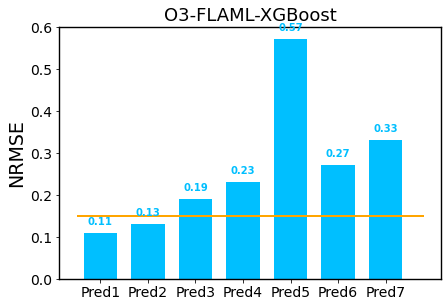

In [15]:
import matplotlib.pyplot as plt
import numpy as np
fig= plt.figure(figsize=(5.3,3.5))
ax = fig.add_axes([0,0,1,1])
x= ['Pred1', 'Pred2', 'Pred3','Pred4','Pred5','Pred6','Pred7']
students1=rmse
students2= [48,32,22,18,16]
plt.hlines([rmse_r], -0.5, 6.8, color='orange', linewidth=2)
x = np.arange(7)
wid= 0.7
graph1=ax.bar(x,students1,wid, color='#00BFFF', alpha=1)
#graph2=ax.bar(x+0.2,students2,wid, color='#00BFFF', alpha=1)
#plt.legend(['15min','60min'],title='Data resolution')
i= 0
for p in graph1:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height+0.02,
             str(students1[i]),
             ha='center',
             weight='bold',fontsize=10, color='#00BFFF', alpha=1)
    i+=1

ax.set_xticks([0,1,2,3,4,5,6])
ax.set_xticklabels(['Pred1', 'Pred2', 'Pred3','Pred4','Pred5','Pred6','Pred7'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yticks(np.arange(0,0.7, step=0.1))

#plt.xlabel('Tolerance,Tc (%)', fontsize=19)
plt.ylabel('NRMSE', fontsize=19)
plt.setp(ax.spines.values(), linewidth=1.4)
plt.title("O3-FLAML-XGBoost",fontsize=18)
plt.savefig("Pred_O3_FLAML_XGboost.pdf", format="pdf", bbox_inches="tight")
plt.show()

X=CO_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour']]
y=CO_Data['Ref']
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size = 0.2,shuffle=True)

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 1440,  # in seconds
    "metric": 'rmse',
    "eval_method":'holdout',
    "task": 'regression',
    "log_file_name": "california.log",
}

Pred=[]
rmse=[]
model=[]
RS=[]
R=[]
for i in range(10):
    X_Train, X_Test, y_Train, y_Test =train_test_split(X_train,y_train,test_size = 0.2,shuffle=True)
    # Train with labeled input data
    automl.fit(X_train=X_Train.drop(['Lab1'], axis=1), y_train=y_Train,**automl_settings,estimator_list=["rf"])
    pred=automl.predict(X_test.drop(['Lab1'], axis=1))
    R2=round(sm.r2_score(y_test, pred), 2)
    r=round(np.corrcoef(y_test, pred)[0, 1],2)
    RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),5)
    #print(r,R2,RMSE)
    # Predict
    #print(automl.predict(X_test))
    # Print the best model
    #print(automl.model.estimator)
    Pred.append(pred)
    rmse.append(RMSE)
    model.append(automl.model.estimator)
    RS.append(R2)
    R.append(r)

print(np.round(np.mean(R),2),np.round(np.mean(RS),2),np.round(np.mean(rmse),2))

In [16]:
print(np.round(np.mean(R),2),np.round(np.mean(RS),2),np.round(np.mean(rmse),2))

NameError: name 'R' is not defined

Pred=[]
rmse=[]
model=[]
for i in range(20):
    X_Train, X_Test, y_Train, y_Test =train_test_split(X_train,y_train,test_size = 0.2,shuffle=True)
    # Train with labeled input data
    automl.fit(X_train=X_Train.drop(['Lab1'], axis=1), y_train=y_Train,**automl_settings,estimator_list=["xgboost"])
    pred=automl.predict(X_test.drop(['Lab1'], axis=1))
    R2=round(sm.r2_score(y_test, pred), 2)
    r=round(np.corrcoef(y_test, pred)[0, 1],2)
    RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),5)
    print(r,R2,RMSE)
    # Predict
    #print(automl.predict(X_test))
    # Print the best model
    print(automl.model.estimator)
    Pred.append(pred)
    rmse.append(RMSE)
    model.append(automl.model.estimator)

Sorted_pred=[]
sort_index = np.argsort(rmse)
for i in sort_index:
    Sorted_pred.append(Pred[i])
ind=[i for i in range(len(y_test))]
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(7,5))
plt.plot(ind[:200],y_test[:200], color='blue',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[1][:200],color='salmon',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[17][:200],color='teal',linewidth=1.5)
plt.legend(['Actual','p10','p90'],loc = 2, bbox_to_anchor = (0.75,1), fontsize=12)
#plt.plot(ind[:200],Sorted_pred[4][:200],color='black',linewidth=0.2)
#plt.fill_between(np.array(ind[:200]), np.array(Sorted_pred[0][:200]), np.array(Sorted_pred[4][:200]), 
                 #color='blue', alpha=0.15)
#plt.plot(ind,Pred[2],color='darkgoldenrod')
#plt.plot(ind,Pred[3],color='magenta')
#plt.plot(ind,Pred[4],color='purple')
plt.xlabel('Observation number',fontsize=16)
plt.ylabel('Concentraton (ppb)',fontsize=16)
plt.title('CO-XGBoost',fontsize=16)
plt.savefig("co_xgboost.pdf", format="pdf", bbox_inches="tight")

Pred=[]
rmse=[]
model=[]
for i in range(20):
    X_Train, X_Test, y_Train, y_Test =train_test_split(X_train,y_train,test_size = 0.2,shuffle=True)
    # Train with labeled input data
    automl.fit(X_train=X_Train.drop(['Lab1'], axis=1), y_train=y_Train,**automl_settings,estimator_list=["xgb_limitdepth"])
    pred=automl.predict(X_test.drop(['Lab1'], axis=1))
    R2=round(sm.r2_score(y_test, pred), 2)
    r=round(np.corrcoef(y_test, pred)[0, 1],2)
    RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),5)
    print(r,R2,RMSE)
    # Predict
    #print(automl.predict(X_test))
    # Print the best model
    print(automl.model.estimator)
    Pred.append(pred)
    rmse.append(RMSE)
    model.append(automl.model.estimator)

Sorted_pred=[]
sort_index = np.argsort(rmse)
for i in sort_index:
    Sorted_pred.append(Pred[i])
ind=[i for i in range(len(y_test))]
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(7,5))
plt.plot(ind[:200],y_test[:200], color='blue',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[1][:200],color='salmon',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[17][:200],color='teal',linewidth=1.5)
plt.legend(['Actual','p10','p90'],loc = 2, bbox_to_anchor = (0.75,1), fontsize=12)
#plt.plot(ind[:200],Sorted_pred[4][:200],color='black',linewidth=0.2)
#plt.fill_between(np.array(ind[:200]), np.array(Sorted_pred[0][:200]), np.array(Sorted_pred[4][:200]), 
                 #color='blue', alpha=0.15)
#plt.plot(ind,Pred[2],color='darkgoldenrod')
#plt.plot(ind,Pred[3],color='magenta')
#plt.plot(ind,Pred[4],color='purple')
plt.xlabel('Observation number',fontsize=16)
plt.ylabel('Concentraton (ppb)',fontsize=16)
plt.title('CO-CO-LDXGBooost',fontsize=16)
plt.savefig("co_ldxgboost.pdf", format="pdf", bbox_inches="tight")

Sorted_pred=[]
sort_index = np.argsort(rmse)
for i in sort_index:
    Sorted_pred.append(Pred[i])
ind=[i for i in range(len(y_test))]
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(7,5))
plt.plot(ind[:200],y_test[:200], color='blue',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[1][:200],color='salmon',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[17][:200],color='teal',linewidth=1.5)
plt.legend(['Actual','p10','p90'],loc = 2, bbox_to_anchor = (0.75,1), fontsize=12)
#plt.plot(ind[:200],Sorted_pred[4][:200],color='black',linewidth=0.2)
#plt.fill_between(np.array(ind[:200]), np.array(Sorted_pred[0][:200]), np.array(Sorted_pred[4][:200]), 
                 #color='blue', alpha=0.15)
#plt.plot(ind,Pred[2],color='darkgoldenrod')
#plt.plot(ind,Pred[3],color='magenta')
#plt.plot(ind,Pred[4],color='purple')
plt.xlabel('Observation number',fontsize=16)
plt.ylabel('Concentraton (ppb)',fontsize=16)
plt.title('CO-LDXGBooost',fontsize=16)
plt.savefig("co_ldxgboost.pdf", format="pdf", bbox_inches="tight")

Pred=[]
rmse=[]
model=[]
for i in range(20):
    X_Train, X_Test, y_Train, y_Test =train_test_split(X_train,y_train,test_size = 0.2,shuffle=True)
    # Train with labeled input data
    automl.fit(X_train=X_Train.drop(['Lab1'], axis=1), y_train=y_Train,**automl_settings,estimator_list=["extra_tree"])
    pred=automl.predict(X_test.drop(['Lab1'], axis=1))
    R2=round(sm.r2_score(y_test, pred), 2)
    r=round(np.corrcoef(y_test, pred)[0, 1],2)
    RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),5)
    print(r,R2,RMSE)
    # Predict
    #print(automl.predict(X_test))
    # Print the best model
    print(automl.model.estimator)
    Pred.append(pred)
    rmse.append(RMSE)
    model.append(automl.model.estimator)

Sorted_pred=[]
sort_index = np.argsort(rmse)
for i in sort_index:
    Sorted_pred.append(Pred[i])
ind=[i for i in range(len(y_test))]
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(7,5))
plt.plot(ind[:200],y_test[:200], color='blue',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[1][:200],color='salmon',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[17][:200],color='teal',linewidth=1.5)
plt.legend(['Actual','p10','p90'],loc = 2, bbox_to_anchor = (0.75,1), fontsize=12)
#plt.plot(ind[:200],Sorted_pred[4][:200],color='black',linewidth=0.2)
#plt.fill_between(np.array(ind[:200]), np.array(Sorted_pred[0][:200]), np.array(Sorted_pred[4][:200]), 
                 #color='blue', alpha=0.15)
#plt.plot(ind,Pred[2],color='darkgoldenrod')
#plt.plot(ind,Pred[3],color='magenta')
#plt.plot(ind,Pred[4],color='purple')
plt.xlabel('Observation number',fontsize=16)
plt.ylabel('Concentraton (ppb)',fontsize=16)
plt.title('CO-Extra Tree',fontsize=16)
plt.savefig("co_extra_tree.pdf", format="pdf", bbox_inches="tight")

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

from flaml.model import SKLearnEstimator

from flaml.model import SKLearnEstimator
# SKLearnEstimator is derived from BaseEstimator
import numpy as np

class RandomForestRegressor(SKLearnEstimator):
    def __init__(self, task="binary", **config):
        super().__init__(task, **config)

        if task in CLASSIFICATION:
            from sklearn.ensemble import RandomForestClassifier

            self.estimator_class =RandomForestClassifier 
        else:
            from sklearn.ensemble import RandomForestRegressor

            self.estimator_class =RandomForestRegressor

    @classmethod
    def search_space(cls, data_size, task):
        space = {
            "n_estimators": {
                "domain": {"domain": tune.loguniform(lower=100, upper=20000)},
                "low_cost_init_value": 100,
            },
            "max_features": {
                "domain": tune.loguniform(lower=0.1, upper=1),
                "low_cost_init_value": 0.1,
            },
            "max_leaf_nodes": {
                "domain": tune.lograndint(lower=100, upper=2500),
                "low_cost_init_value": 100,},
            "min_samples_split": {"domain": tune.lograndint(lower=1, upper=20),
            "init_value": 20,},
            
            "min_samples_leaf": {
                "domain": tune.lograndint(lower=1, upper=20),
                "init_value": 20,
            },
        }
        return space

from flaml import AutoML
from flaml import tune
automl = AutoML()
automl.add_learner("rfr",RandomForestRegressor )

automl_settings = {
    "time_budget": 1000,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["rfr"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)

#  NO2 DATA

X=NO2_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_O3']]#'Ref_O3'
y=NO2_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#len(X_test)
X.shape

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

# O3 DATA

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#,'Ref_CO','Ref_NO2','Ref_SO2'
X=O3_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_NO2']]#,'Ref_NO2'
y=O3_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X)

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

# SO2 DATA

In [ ]:
import pandas as pd
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

In [ ]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('Conc_SO2.txt', header = None,low_memory=False)
data.columns=['Lab2','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_so2=data
#signal=np.array(WE)-np.array(AE)
#Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data=SO2_Data.resample('5min').mean()
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna() 
data = pd.read_csv('SO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_SO2['Ref']=Ref_SO2
WE=Data_SO2['WE'].to_list()
AE=Data_SO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_SO2['Lab2']=Data_so2['Lab2'].to_list()
Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data.shape

In [ ]:
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna()
SO2_Data=SO2_Data.resample('h').mean()
SO2_Data=SO2_Data.dropna()
SO2_Data.head()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#'Ref_CO','Ref_NO2','Ref_O3',
X=SO2_Data[['Net Signal','Lab2','Temp','RH','Month','Day_of_week','Hour']]
y=SO2_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X)

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab2'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab2'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab2'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

In [1]:
import pandas as pd
from pandas import MultiIndex, Int16Dtype
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

In [2]:
import random
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('CO.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO['Ref']=Ref_CO
index_names = Data_CO[ (Data_CO['WE'] >1000)].index
Data_CO.drop(index_names, inplace = True)
WE=Data_CO['WE'].to_list()
AE=Data_CO['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
data = pd.read_csv('Conc_CO.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO.drop(index_names, inplace = True)
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
CO_Data=CO_Data.resample('h').mean()
CO_Data=CO_Data.dropna()
CO_Data.tail()

Lab1       Temp         RH         Ref  Net Signal  \
Date                                                                            
2020-04-30 19:00:00  242.060716  18.870796  71.072939  188.915151   91.471325   
2020-04-30 20:00:00  218.655079  18.056864  75.132153  178.704750   84.176485   
2020-04-30 21:00:00  194.147868  17.090891  81.315038  161.421792   73.858294   
2020-04-30 22:00:00  206.432889  16.714085  82.568155  197.744043   83.279611   
2020-04-30 23:00:00  173.577429  16.365121  83.662401  162.157636   68.669099   

                     Month  Day_of_week   Day  Hour  
Date                                                 
2020-04-30 19:00:00    4.0          3.0  30.0  19.0  
2020-04-30 20:00:00    4.0          3.0  30.0  20.0  
2020-04-30 21:00:00    4.0          3.0  30.0  21.0  
2020-04-30 22:00:00    4.0          3.0  30.0  22.0  
2020-04-30 23:00:00    4.0          3.0  30.0  23.0

In [3]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna() 
O3_Data=O3_Data.resample('h').mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

ref_O3=Data_O3['Ref'].to_list()
len(ref_O3)

60913

In [4]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('NO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
Data_NO2['Ref']=Ref_NO2
WE=Data_NO2['WE'].to_list()
AE=Data_NO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
data = pd.read_csv('Conc_NO2.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉") 
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
signal=np.array(WE)-np.array(AE)
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
Data_NO2['Ref_O3']=ref_O3
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
NO2_Data=NO2_Data.resample('h').mean()
NO2_Data=NO2_Data.dropna()

In [5]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
ref_NO2=Data_NO2['Ref'].to_list()
Data_O3['Ref_NO2']=ref_NO2
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
O3_Data=O3_Data.resample('h').mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

Lab1       Temp         RH        Ref  Net Signal  \
Date                                                                           
2019-10-02 11:00:00  621.625704  26.378438  58.063437  46.094860    3.605625   
2019-10-02 12:00:00  725.154408  25.795055  48.256857  57.532808   13.865109   
2019-10-07 10:00:00  108.196313  32.344264  37.260757  47.259008   11.447809   
2019-10-07 11:00:00  135.822676  34.926112  35.013036  42.114260   10.075221   
2019-10-07 12:00:00  203.757758  36.201221  31.829282  45.701366    7.624153   

                     Month  Day_of_week  Day  Hour    Ref_NO2  
Date                                                           
2019-10-02 11:00:00   10.0          2.0  2.0  11.0  15.230400  
2019-10-02 12:00:00   10.0          2.0  2.0  12.0   5.384051  
2019-10-07 10:00:00   10.0          0.0  7.0  10.0   4.255772  
2019-10-07 11:00:00   10.0          0.0  7.0  11.0  16.268034  
2019-10-07 12:00:00   10.0          0.0  7.0  12.0  12.770444

# CO DATA

In [6]:
from sktime.performance_metrics.forecasting import sMAPE, smape_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#'Ref_NO2','Ref_SO2','Ref_O3',
#,'Month','Day_of_week','Day','Hour'
X=CO_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour']]
y=CO_Data['Ref']
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size = 0.2,shuffle=True)
#train_test_split(X, y, test_size = 0.2)

In [7]:
from flaml.model import SKLearnEstimator
# SKLearnEstimator is derived from BaseEstimator

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

from flaml.model import SKLearnEstimator

from flaml.model import SKLearnEstimator
# SKLearnEstimator is derived from BaseEstimator
import numpy as np

class RandomForestRegressor(SKLearnEstimator):
    def __init__(self, task="binary", **config):
        super().__init__(task, **config)

        if task in CLASSIFICATION:
            from sklearn.ensemble import RandomForestClassifier

            self.estimator_class =RandomForestClassifier 
        else:
            from sklearn.ensemble import RandomForestRegressor

            self.estimator_class =RandomForestRegressor

    @classmethod
    def search_space(cls, data_size, task):
        space = {
            "n_estimators": {
                "domain": {"domain": tune.loguniform(lower=100, upper=20000)},
                "low_cost_init_value": 100,
            },
            "max_features": {
                "domain": tune.loguniform(lower=0.1, upper=1),
                "low_cost_init_value": 0.1,
            },
            "max_leaf_nodes": {
                "domain": tune.lograndint(lower=100, upper=2500),
                "low_cost_init_value": 100,},
            "min_samples_split": {"domain": tune.lograndint(lower=1, upper=20),
            "init_value": 20,},
            
            "min_samples_leaf": {
                "domain": tune.lograndint(lower=1, upper=20),
                "init_value": 20,
            },
        }
        return space

from flaml import AutoML
from flaml import tune
automl = AutoML()
automl.add_learner("rfr",RandomForestRegressor )

automl_settings = {
    "time_budget": 1000,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["rfr"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)

#  NO2 DATA

In [8]:
X=NO2_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_O3']]#'Ref_O3'
y=NO2_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#len(X_test)
X.shape

(3778, 8)

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

# O3 DATA

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#,'Ref_CO','Ref_NO2','Ref_SO2'
X=O3_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_NO2']]#,'Ref_NO2'
y=O3_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X)

3534

In [10]:
from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 21600,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings)
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

[flaml.automl: 12-06 08:54:46] {2599} INFO - task = regression
[flaml.automl: 12-06 08:54:46] {2601} INFO - Data split method: uniform
[flaml.automl: 12-06 08:54:46] {2604} INFO - Evaluation method: cv
[flaml.automl: 12-06 08:54:46] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-06 08:54:46] {2870} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl: 12-06 08:54:46] {3166} INFO - iteration 0, current learner lgbm
[flaml.automl: 12-06 08:54:47] {3296} INFO - Estimated sufficient time budget=3930s. Estimated necessary time budget=28s.
[flaml.automl: 12-06 08:54:47] {3343} INFO -  at 0.5s,	estimator lgbm's best error=11.6980,	best estimator lgbm's best error=11.6980
[flaml.automl: 12-06 08:54:47] {3166} INFO - iteration 1, current learner lgbm
[flaml.automl: 12-06 08:54:47] {3343} INFO -  at 0.9s,	estimator lgbm's best error=11.6980,	best estimator lgbm's best error=11.6980
[flaml.automl: 12-06 08:54:47] {3166} I

[flaml.automl: 12-06 08:55:18] {3166} INFO - iteration 36, current learner extra_tree
[flaml.automl: 12-06 08:55:19] {3343} INFO -  at 32.8s,	estimator extra_tree's best error=3.3693,	best estimator lgbm's best error=3.0395
[flaml.automl: 12-06 08:55:19] {3166} INFO - iteration 37, current learner xgboost
[flaml.automl: 12-06 08:55:19] {3343} INFO -  at 33.1s,	estimator xgboost's best error=4.5246,	best estimator lgbm's best error=3.0395
[flaml.automl: 12-06 08:55:19] {3166} INFO - iteration 38, current learner xgboost
[flaml.automl: 12-06 08:55:19] {3343} INFO -  at 33.5s,	estimator xgboost's best error=3.8300,	best estimator lgbm's best error=3.0395
[flaml.automl: 12-06 08:55:19] {3166} INFO - iteration 39, current learner xgboost
[flaml.automl: 12-06 08:55:20] {3343} INFO -  at 33.8s,	estimator xgboost's best error=3.8300,	best estimator lgbm's best error=3.0395
[flaml.automl: 12-06 08:55:20] {3166} INFO - iteration 40, current learner xgboost
[flaml.automl: 12-06 08:55:20] {3343} I

[flaml.automl: 12-06 08:56:50] {3166} INFO - iteration 74, current learner extra_tree
[flaml.automl: 12-06 08:56:52] {3343} INFO -  at 125.7s,	estimator extra_tree's best error=3.0332,	best estimator xgboost's best error=2.9170
[flaml.automl: 12-06 08:56:52] {3166} INFO - iteration 75, current learner xgboost
[flaml.automl: 12-06 08:56:56] {3343} INFO -  at 130.2s,	estimator xgboost's best error=2.9170,	best estimator xgboost's best error=2.9170
[flaml.automl: 12-06 08:56:56] {3166} INFO - iteration 76, current learner xgboost
[flaml.automl: 12-06 08:56:59] {3343} INFO -  at 133.2s,	estimator xgboost's best error=2.9170,	best estimator xgboost's best error=2.9170
[flaml.automl: 12-06 08:56:59] {3166} INFO - iteration 77, current learner extra_tree
[flaml.automl: 12-06 08:57:01] {3343} INFO -  at 134.9s,	estimator extra_tree's best error=3.0332,	best estimator xgboost's best error=2.9170
[flaml.automl: 12-06 08:57:01] {3166} INFO - iteration 78, current learner extra_tree
[flaml.automl:

[flaml.automl: 12-06 08:59:07] {3166} INFO - iteration 110, current learner extra_tree
[flaml.automl: 12-06 08:59:21] {3343} INFO -  at 274.5s,	estimator extra_tree's best error=2.7401,	best estimator extra_tree's best error=2.7401
[flaml.automl: 12-06 08:59:21] {3166} INFO - iteration 111, current learner lgbm
[flaml.automl: 12-06 09:00:18] {3343} INFO -  at 331.6s,	estimator lgbm's best error=3.0395,	best estimator extra_tree's best error=2.7401
[flaml.automl: 12-06 09:00:18] {3166} INFO - iteration 112, current learner extra_tree
[flaml.automl: 12-06 09:00:24] {3343} INFO -  at 338.0s,	estimator extra_tree's best error=2.7401,	best estimator extra_tree's best error=2.7401
[flaml.automl: 12-06 09:00:24] {3166} INFO - iteration 113, current learner extra_tree
[flaml.automl: 12-06 09:00:29] {3343} INFO -  at 342.9s,	estimator extra_tree's best error=2.7401,	best estimator extra_tree's best error=2.7401
[flaml.automl: 12-06 09:00:29] {3166} INFO - iteration 114, current learner xgb_limi

[flaml.automl: 12-06 09:08:50] {3166} INFO - iteration 146, current learner lgbm
[flaml.automl: 12-06 09:08:52] {3343} INFO -  at 846.3s,	estimator lgbm's best error=3.0395,	best estimator extra_tree's best error=2.7053
[flaml.automl: 12-06 09:08:52] {3166} INFO - iteration 147, current learner lgbm
[flaml.automl: 12-06 09:09:22] {3343} INFO -  at 875.6s,	estimator lgbm's best error=3.0395,	best estimator extra_tree's best error=2.7053
[flaml.automl: 12-06 09:09:22] {3166} INFO - iteration 148, current learner lgbm
[flaml.automl: 12-06 09:09:25] {3343} INFO -  at 878.5s,	estimator lgbm's best error=3.0395,	best estimator extra_tree's best error=2.7053
[flaml.automl: 12-06 09:09:25] {3166} INFO - iteration 149, current learner lgbm
[flaml.automl: 12-06 09:09:28] {3343} INFO -  at 882.5s,	estimator lgbm's best error=3.0395,	best estimator extra_tree's best error=2.7053
[flaml.automl: 12-06 09:09:28] {3166} INFO - iteration 150, current learner lgbm
[flaml.automl: 12-06 09:09:40] {3343} I

[flaml.automl: 12-06 10:07:33] {3343} INFO -  at 4367.3s,	estimator xgb_limitdepth's best error=2.8048,	best estimator extra_tree's best error=2.7053
[flaml.automl: 12-06 10:07:33] {3166} INFO - iteration 182, current learner xgb_limitdepth
[flaml.automl: 12-06 10:07:56] {3343} INFO -  at 4390.4s,	estimator xgb_limitdepth's best error=2.8048,	best estimator extra_tree's best error=2.7053
[flaml.automl: 12-06 10:07:56] {3166} INFO - iteration 183, current learner rf
[flaml.automl: 12-06 10:08:41] {3343} INFO -  at 4435.5s,	estimator rf's best error=2.9450,	best estimator extra_tree's best error=2.7053
[flaml.automl: 12-06 10:08:41] {3166} INFO - iteration 184, current learner xgb_limitdepth
[flaml.automl: 12-06 10:09:09] {3343} INFO -  at 4462.5s,	estimator xgb_limitdepth's best error=2.8048,	best estimator extra_tree's best error=2.7053
[flaml.automl: 12-06 10:09:09] {3166} INFO - iteration 185, current learner xgb_limitdepth
[flaml.automl: 12-06 10:09:25] {3343} INFO -  at 4479.4s,	es

[flaml.automl: 12-06 10:18:01] {3166} INFO - iteration 217, current learner xgboost
[flaml.automl: 12-06 10:18:15] {3343} INFO -  at 5008.6s,	estimator xgboost's best error=2.8001,	best estimator extra_tree's best error=2.7053
[flaml.automl: 12-06 10:18:15] {3166} INFO - iteration 218, current learner xgboost
[flaml.automl: 12-06 10:18:24] {3343} INFO -  at 5018.0s,	estimator xgboost's best error=2.8001,	best estimator extra_tree's best error=2.7053
[flaml.automl: 12-06 10:18:24] {3166} INFO - iteration 219, current learner xgboost
[flaml.automl: 12-06 10:18:33] {3343} INFO -  at 5026.6s,	estimator xgboost's best error=2.8001,	best estimator extra_tree's best error=2.7053
[flaml.automl: 12-06 10:18:33] {3166} INFO - iteration 220, current learner xgboost
[flaml.automl: 12-06 10:18:37] {3343} INFO -  at 5030.6s,	estimator xgboost's best error=2.8001,	best estimator extra_tree's best error=2.7053
[flaml.automl: 12-06 10:18:37] {3166} INFO - iteration 221, current learner lgbm
[flaml.auto

[flaml.automl: 12-06 11:51:47] {3343} INFO -  at 10620.6s,	estimator xgboost's best error=2.7019,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 11:51:47] {3166} INFO - iteration 254, current learner xgboost
[flaml.automl: 12-06 11:52:03] {3343} INFO -  at 10637.1s,	estimator xgboost's best error=2.7019,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 11:52:03] {3166} INFO - iteration 255, current learner lgbm
[flaml.automl: 12-06 11:52:52] {3343} INFO -  at 10686.5s,	estimator lgbm's best error=2.8214,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 11:52:52] {3166} INFO - iteration 256, current learner extra_tree
[flaml.automl: 12-06 11:53:11] {3343} INFO -  at 10705.4s,	estimator extra_tree's best error=2.7053,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 11:53:11] {3166} INFO - iteration 257, current learner xgboost
[flaml.automl: 12-06 11:53:40] {3343} INFO -  at 10733.6s,	estimator xgboost's best error=2.7019,	be

[flaml.automl: 12-06 12:04:25] {3166} INFO - iteration 290, current learner xgboost
[flaml.automl: 12-06 12:04:31] {3343} INFO -  at 11385.2s,	estimator xgboost's best error=2.7019,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 12:04:31] {3166} INFO - iteration 291, current learner xgboost
[flaml.automl: 12-06 12:05:03] {3343} INFO -  at 11416.9s,	estimator xgboost's best error=2.7019,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 12:05:03] {3166} INFO - iteration 292, current learner xgboost
[flaml.automl: 12-06 12:05:24] {3343} INFO -  at 11437.8s,	estimator xgboost's best error=2.7019,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 12:05:24] {3166} INFO - iteration 293, current learner xgboost
[flaml.automl: 12-06 12:05:43] {3343} INFO -  at 11457.2s,	estimator xgboost's best error=2.7019,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 12:05:43] {3166} INFO - iteration 294, current learner xgboost
[flaml.automl: 1

[flaml.automl: 12-06 12:33:19] {3166} INFO - iteration 327, current learner xgboost
[flaml.automl: 12-06 12:33:26] {3343} INFO -  at 13120.2s,	estimator xgboost's best error=2.7019,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 12:33:26] {3166} INFO - iteration 328, current learner lgbm
[flaml.automl: 12-06 12:33:40] {3343} INFO -  at 13133.7s,	estimator lgbm's best error=2.8214,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 12:33:40] {3166} INFO - iteration 329, current learner xgboost
[flaml.automl: 12-06 12:33:53] {3343} INFO -  at 13147.4s,	estimator xgboost's best error=2.7019,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 12:33:53] {3166} INFO - iteration 330, current learner xgboost
[flaml.automl: 12-06 12:34:01] {3343} INFO -  at 13155.0s,	estimator xgboost's best error=2.7019,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 12:34:01] {3166} INFO - iteration 331, current learner rf
[flaml.automl: 12-06 12:35:

[flaml.automl: 12-06 13:01:49] {3166} INFO - iteration 364, current learner xgb_limitdepth
[flaml.automl: 12-06 13:02:50] {3343} INFO -  at 14884.1s,	estimator xgb_limitdepth's best error=2.7395,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 13:02:50] {3166} INFO - iteration 365, current learner xgb_limitdepth
[flaml.automl: 12-06 13:03:25] {3343} INFO -  at 14918.9s,	estimator xgb_limitdepth's best error=2.7395,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 13:03:25] {3166} INFO - iteration 366, current learner xgb_limitdepth
[flaml.automl: 12-06 13:04:40] {3343} INFO -  at 14994.3s,	estimator xgb_limitdepth's best error=2.7395,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 13:04:40] {3166} INFO - iteration 367, current learner xgb_limitdepth
[flaml.automl: 12-06 13:05:32] {3343} INFO -  at 15046.3s,	estimator xgb_limitdepth's best error=2.7395,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 13:05:32] {3166} INFO -

[flaml.automl: 12-06 13:33:05] {3343} INFO -  at 16699.4s,	estimator extra_tree's best error=2.7041,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 13:33:05] {3166} INFO - iteration 400, current learner xgb_limitdepth
[flaml.automl: 12-06 13:33:40] {3343} INFO -  at 16734.0s,	estimator xgb_limitdepth's best error=2.7152,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 13:33:40] {3166} INFO - iteration 401, current learner xgboost
[flaml.automl: 12-06 13:33:47] {3343} INFO -  at 16741.2s,	estimator xgboost's best error=2.7019,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 13:33:47] {3166} INFO - iteration 402, current learner xgb_limitdepth
[flaml.automl: 12-06 13:36:29] {3343} INFO -  at 16903.3s,	estimator xgb_limitdepth's best error=2.7152,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 13:36:29] {3166} INFO - iteration 403, current learner xgboost
[flaml.automl: 12-06 13:36:44] {3343} INFO -  at 16917.8s,	estimator 

[flaml.automl: 12-06 13:59:52] {3166} INFO - iteration 434, current learner xgb_limitdepth
[flaml.automl: 12-06 14:00:19] {3343} INFO -  at 18332.9s,	estimator xgb_limitdepth's best error=2.6827,	best estimator xgb_limitdepth's best error=2.6827
[flaml.automl: 12-06 14:00:19] {3166} INFO - iteration 435, current learner xgb_limitdepth
[flaml.automl: 12-06 14:01:19] {3343} INFO -  at 18393.1s,	estimator xgb_limitdepth's best error=2.6827,	best estimator xgb_limitdepth's best error=2.6827
[flaml.automl: 12-06 14:01:19] {3166} INFO - iteration 436, current learner xgb_limitdepth
[flaml.automl: 12-06 14:01:42] {3343} INFO -  at 18415.9s,	estimator xgb_limitdepth's best error=2.6827,	best estimator xgb_limitdepth's best error=2.6827
[flaml.automl: 12-06 14:01:42] {3166} INFO - iteration 437, current learner xgb_limitdepth
[flaml.automl: 12-06 14:02:05] {3343} INFO -  at 18438.8s,	estimator xgb_limitdepth's best error=2.6827,	best estimator xgb_limitdepth's best error=2.6827
[flaml.automl: 1

[flaml.automl: 12-06 14:51:32] {3166} INFO - iteration 468, current learner xgboost
[flaml.automl: 12-06 14:51:56] {3343} INFO -  at 21430.5s,	estimator xgboost's best error=2.7019,	best estimator xgb_limitdepth's best error=2.6682
[flaml.automl: 12-06 14:51:56] {3166} INFO - iteration 469, current learner xgb_limitdepth
[flaml.automl: 12-06 14:54:46] {3343} INFO -  at 21599.8s,	estimator xgb_limitdepth's best error=2.6682,	best estimator xgb_limitdepth's best error=2.6682
[flaml.automl: 12-06 14:55:16] {3602} INFO - retrain xgb_limitdepth for 30.2s
[flaml.automl: 12-06 14:55:16] {3609} INFO - retrained model: XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.4782934500274187, colsample_bynode=1,
             colsample_bytree=0.7480157455041564, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.013698038908223438, max_delta_step=0, max_depth=10,
             min_child_weight=2.0214662743681027

0.98 0.96 0.15
XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.4782934500274187, colsample_bynode=1,
             colsample_bytree=0.7480157455041564, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.013698038908223438, max_delta_step=0, max_depth=10,
             min_child_weight=2.0214662743681027, missing=nan,
             monotone_constraints='()', n_estimators=1172, n_jobs=-1,
             num_parallel_tree=1, random_state=0, reg_alpha=0.0009765625,
             reg_lambda=12.530022135994612, scale_pos_weight=1,
             subsample=0.8016705934492128, tree_method='exact',
             use_label_encoder=False, validate_parameters=1, verbosity=0)


from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.019 total time=   5.8s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.000 total time=   4.5s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.001 total time=   3.6s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.006 total time=   3.5s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.014 total time=   3.4s


# SO2 DATA

In [ ]:
import pandas as pd
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

In [ ]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('Conc_SO2.txt', header = None,low_memory=False)
data.columns=['Lab2','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_so2=data
#signal=np.array(WE)-np.array(AE)
#Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data=SO2_Data.resample('5min').mean()
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna() 
data = pd.read_csv('SO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_SO2['Ref']=Ref_SO2
WE=Data_SO2['WE'].to_list()
AE=Data_SO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_SO2['Lab2']=Data_so2['Lab2'].to_list()
Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data.shape

In [ ]:
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna()
SO2_Data=SO2_Data.resample('h').mean()
SO2_Data=SO2_Data.dropna()
SO2_Data.head()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#'Ref_CO','Ref_NO2','Ref_O3',
X=SO2_Data[['Net Signal','Lab2','Temp','RH','Month','Day_of_week','Hour']]
y=SO2_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X)

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab2'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab2'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab2'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

In [1]:
import pandas as pd
from pandas import MultiIndex, Int16Dtype
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

In [2]:
import random
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('CO.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO['Ref']=Ref_CO
index_names = Data_CO[ (Data_CO['WE'] >1000)].index
Data_CO.drop(index_names, inplace = True)
WE=Data_CO['WE'].to_list()
AE=Data_CO['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
data = pd.read_csv('Conc_CO.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO.drop(index_names, inplace = True)
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
CO_Data=CO_Data.resample('h').mean()
CO_Data=CO_Data.dropna()
CO_Data.tail()

Lab1       Temp         RH         Ref  Net Signal  \
Date                                                                            
2020-04-30 19:00:00  242.060716  18.870796  71.072939  188.915151   91.471325   
2020-04-30 20:00:00  218.655079  18.056864  75.132153  178.704750   84.176485   
2020-04-30 21:00:00  194.147868  17.090891  81.315038  161.421792   73.858294   
2020-04-30 22:00:00  206.432889  16.714085  82.568155  197.744043   83.279611   
2020-04-30 23:00:00  173.577429  16.365121  83.662401  162.157636   68.669099   

                     Month  Day_of_week   Day  Hour  
Date                                                 
2020-04-30 19:00:00    4.0          3.0  30.0  19.0  
2020-04-30 20:00:00    4.0          3.0  30.0  20.0  
2020-04-30 21:00:00    4.0          3.0  30.0  21.0  
2020-04-30 22:00:00    4.0          3.0  30.0  22.0  
2020-04-30 23:00:00    4.0          3.0  30.0  23.0

In [3]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna() 
O3_Data=O3_Data.resample('h').mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

ref_O3=Data_O3['Ref'].to_list()
len(ref_O3)

60913

In [4]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('NO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
Data_NO2['Ref']=Ref_NO2
WE=Data_NO2['WE'].to_list()
AE=Data_NO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
data = pd.read_csv('Conc_NO2.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉") 
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
signal=np.array(WE)-np.array(AE)
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
Data_NO2['Ref_O3']=ref_O3
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
NO2_Data=NO2_Data.resample('h').mean()
NO2_Data=NO2_Data.dropna()

In [5]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
ref_NO2=Data_NO2['Ref'].to_list()
Data_O3['Ref_NO2']=ref_NO2
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
O3_Data=O3_Data.resample('h').mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

Lab1       Temp         RH        Ref  Net Signal  \
Date                                                                           
2019-10-02 11:00:00  621.625704  26.378438  58.063437  46.094860    3.605625   
2019-10-02 12:00:00  725.154408  25.795055  48.256857  57.532808   13.865109   
2019-10-07 10:00:00  108.196313  32.344264  37.260757  47.259008   11.447809   
2019-10-07 11:00:00  135.822676  34.926112  35.013036  42.114260   10.075221   
2019-10-07 12:00:00  203.757758  36.201221  31.829282  45.701366    7.624153   

                     Month  Day_of_week  Day  Hour    Ref_NO2  
Date                                                           
2019-10-02 11:00:00   10.0          2.0  2.0  11.0  15.230400  
2019-10-02 12:00:00   10.0          2.0  2.0  12.0   5.384051  
2019-10-07 10:00:00   10.0          0.0  7.0  10.0   4.255772  
2019-10-07 11:00:00   10.0          0.0  7.0  11.0  16.268034  
2019-10-07 12:00:00   10.0          0.0  7.0  12.0  12.770444

# CO DATA

In [6]:
from sktime.performance_metrics.forecasting import sMAPE, smape_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#'Ref_NO2','Ref_SO2','Ref_O3',
#,'Month','Day_of_week','Day','Hour'
X=CO_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour']]
y=CO_Data['Ref']
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size = 0.2,shuffle=True)
#train_test_split(X, y, test_size = 0.2)

In [7]:
from flaml.model import SKLearnEstimator
# SKLearnEstimator is derived from BaseEstimator

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

from flaml.model import SKLearnEstimator

from flaml.model import SKLearnEstimator
# SKLearnEstimator is derived from BaseEstimator
import numpy as np

class RandomForestRegressor(SKLearnEstimator):
    def __init__(self, task="binary", **config):
        super().__init__(task, **config)

        if task in CLASSIFICATION:
            from sklearn.ensemble import RandomForestClassifier

            self.estimator_class =RandomForestClassifier 
        else:
            from sklearn.ensemble import RandomForestRegressor

            self.estimator_class =RandomForestRegressor

    @classmethod
    def search_space(cls, data_size, task):
        space = {
            "n_estimators": {
                "domain": {"domain": tune.loguniform(lower=100, upper=20000)},
                "low_cost_init_value": 100,
            },
            "max_features": {
                "domain": tune.loguniform(lower=0.1, upper=1),
                "low_cost_init_value": 0.1,
            },
            "max_leaf_nodes": {
                "domain": tune.lograndint(lower=100, upper=2500),
                "low_cost_init_value": 100,},
            "min_samples_split": {"domain": tune.lograndint(lower=1, upper=20),
            "init_value": 20,},
            
            "min_samples_leaf": {
                "domain": tune.lograndint(lower=1, upper=20),
                "init_value": 20,
            },
        }
        return space

from flaml import AutoML
from flaml import tune
automl = AutoML()
automl.add_learner("rfr",RandomForestRegressor )

automl_settings = {
    "time_budget": 1000,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["rfr"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)

#  NO2 DATA

In [8]:
X=NO2_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_O3']]#'Ref_O3'
y=NO2_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#len(X_test)
X.shape

(3778, 8)

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

# O3 DATA

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#,'Ref_CO','Ref_NO2','Ref_SO2'
X=O3_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_NO2']]#,'Ref_NO2'
y=O3_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X)

3534

In [10]:
from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 21600,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings)
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

[flaml.automl: 12-06 08:54:46] {2599} INFO - task = regression
[flaml.automl: 12-06 08:54:46] {2601} INFO - Data split method: uniform
[flaml.automl: 12-06 08:54:46] {2604} INFO - Evaluation method: cv
[flaml.automl: 12-06 08:54:46] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-06 08:54:46] {2870} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl: 12-06 08:54:46] {3166} INFO - iteration 0, current learner lgbm
[flaml.automl: 12-06 08:54:47] {3296} INFO - Estimated sufficient time budget=3930s. Estimated necessary time budget=28s.
[flaml.automl: 12-06 08:54:47] {3343} INFO -  at 0.5s,	estimator lgbm's best error=11.6980,	best estimator lgbm's best error=11.6980
[flaml.automl: 12-06 08:54:47] {3166} INFO - iteration 1, current learner lgbm
[flaml.automl: 12-06 08:54:47] {3343} INFO -  at 0.9s,	estimator lgbm's best error=11.6980,	best estimator lgbm's best error=11.6980
[flaml.automl: 12-06 08:54:47] {3166} I

[flaml.automl: 12-06 08:55:18] {3166} INFO - iteration 36, current learner extra_tree
[flaml.automl: 12-06 08:55:19] {3343} INFO -  at 32.8s,	estimator extra_tree's best error=3.3693,	best estimator lgbm's best error=3.0395
[flaml.automl: 12-06 08:55:19] {3166} INFO - iteration 37, current learner xgboost
[flaml.automl: 12-06 08:55:19] {3343} INFO -  at 33.1s,	estimator xgboost's best error=4.5246,	best estimator lgbm's best error=3.0395
[flaml.automl: 12-06 08:55:19] {3166} INFO - iteration 38, current learner xgboost
[flaml.automl: 12-06 08:55:19] {3343} INFO -  at 33.5s,	estimator xgboost's best error=3.8300,	best estimator lgbm's best error=3.0395
[flaml.automl: 12-06 08:55:19] {3166} INFO - iteration 39, current learner xgboost
[flaml.automl: 12-06 08:55:20] {3343} INFO -  at 33.8s,	estimator xgboost's best error=3.8300,	best estimator lgbm's best error=3.0395
[flaml.automl: 12-06 08:55:20] {3166} INFO - iteration 40, current learner xgboost
[flaml.automl: 12-06 08:55:20] {3343} I

[flaml.automl: 12-06 08:56:50] {3166} INFO - iteration 74, current learner extra_tree
[flaml.automl: 12-06 08:56:52] {3343} INFO -  at 125.7s,	estimator extra_tree's best error=3.0332,	best estimator xgboost's best error=2.9170
[flaml.automl: 12-06 08:56:52] {3166} INFO - iteration 75, current learner xgboost
[flaml.automl: 12-06 08:56:56] {3343} INFO -  at 130.2s,	estimator xgboost's best error=2.9170,	best estimator xgboost's best error=2.9170
[flaml.automl: 12-06 08:56:56] {3166} INFO - iteration 76, current learner xgboost
[flaml.automl: 12-06 08:56:59] {3343} INFO -  at 133.2s,	estimator xgboost's best error=2.9170,	best estimator xgboost's best error=2.9170
[flaml.automl: 12-06 08:56:59] {3166} INFO - iteration 77, current learner extra_tree
[flaml.automl: 12-06 08:57:01] {3343} INFO -  at 134.9s,	estimator extra_tree's best error=3.0332,	best estimator xgboost's best error=2.9170
[flaml.automl: 12-06 08:57:01] {3166} INFO - iteration 78, current learner extra_tree
[flaml.automl:

[flaml.automl: 12-06 08:59:07] {3166} INFO - iteration 110, current learner extra_tree
[flaml.automl: 12-06 08:59:21] {3343} INFO -  at 274.5s,	estimator extra_tree's best error=2.7401,	best estimator extra_tree's best error=2.7401
[flaml.automl: 12-06 08:59:21] {3166} INFO - iteration 111, current learner lgbm
[flaml.automl: 12-06 09:00:18] {3343} INFO -  at 331.6s,	estimator lgbm's best error=3.0395,	best estimator extra_tree's best error=2.7401
[flaml.automl: 12-06 09:00:18] {3166} INFO - iteration 112, current learner extra_tree
[flaml.automl: 12-06 09:00:24] {3343} INFO -  at 338.0s,	estimator extra_tree's best error=2.7401,	best estimator extra_tree's best error=2.7401
[flaml.automl: 12-06 09:00:24] {3166} INFO - iteration 113, current learner extra_tree
[flaml.automl: 12-06 09:00:29] {3343} INFO -  at 342.9s,	estimator extra_tree's best error=2.7401,	best estimator extra_tree's best error=2.7401
[flaml.automl: 12-06 09:00:29] {3166} INFO - iteration 114, current learner xgb_limi

[flaml.automl: 12-06 09:08:50] {3166} INFO - iteration 146, current learner lgbm
[flaml.automl: 12-06 09:08:52] {3343} INFO -  at 846.3s,	estimator lgbm's best error=3.0395,	best estimator extra_tree's best error=2.7053
[flaml.automl: 12-06 09:08:52] {3166} INFO - iteration 147, current learner lgbm
[flaml.automl: 12-06 09:09:22] {3343} INFO -  at 875.6s,	estimator lgbm's best error=3.0395,	best estimator extra_tree's best error=2.7053
[flaml.automl: 12-06 09:09:22] {3166} INFO - iteration 148, current learner lgbm
[flaml.automl: 12-06 09:09:25] {3343} INFO -  at 878.5s,	estimator lgbm's best error=3.0395,	best estimator extra_tree's best error=2.7053
[flaml.automl: 12-06 09:09:25] {3166} INFO - iteration 149, current learner lgbm
[flaml.automl: 12-06 09:09:28] {3343} INFO -  at 882.5s,	estimator lgbm's best error=3.0395,	best estimator extra_tree's best error=2.7053
[flaml.automl: 12-06 09:09:28] {3166} INFO - iteration 150, current learner lgbm
[flaml.automl: 12-06 09:09:40] {3343} I

[flaml.automl: 12-06 10:07:33] {3343} INFO -  at 4367.3s,	estimator xgb_limitdepth's best error=2.8048,	best estimator extra_tree's best error=2.7053
[flaml.automl: 12-06 10:07:33] {3166} INFO - iteration 182, current learner xgb_limitdepth
[flaml.automl: 12-06 10:07:56] {3343} INFO -  at 4390.4s,	estimator xgb_limitdepth's best error=2.8048,	best estimator extra_tree's best error=2.7053
[flaml.automl: 12-06 10:07:56] {3166} INFO - iteration 183, current learner rf
[flaml.automl: 12-06 10:08:41] {3343} INFO -  at 4435.5s,	estimator rf's best error=2.9450,	best estimator extra_tree's best error=2.7053
[flaml.automl: 12-06 10:08:41] {3166} INFO - iteration 184, current learner xgb_limitdepth
[flaml.automl: 12-06 10:09:09] {3343} INFO -  at 4462.5s,	estimator xgb_limitdepth's best error=2.8048,	best estimator extra_tree's best error=2.7053
[flaml.automl: 12-06 10:09:09] {3166} INFO - iteration 185, current learner xgb_limitdepth
[flaml.automl: 12-06 10:09:25] {3343} INFO -  at 4479.4s,	es

[flaml.automl: 12-06 10:18:01] {3166} INFO - iteration 217, current learner xgboost
[flaml.automl: 12-06 10:18:15] {3343} INFO -  at 5008.6s,	estimator xgboost's best error=2.8001,	best estimator extra_tree's best error=2.7053
[flaml.automl: 12-06 10:18:15] {3166} INFO - iteration 218, current learner xgboost
[flaml.automl: 12-06 10:18:24] {3343} INFO -  at 5018.0s,	estimator xgboost's best error=2.8001,	best estimator extra_tree's best error=2.7053
[flaml.automl: 12-06 10:18:24] {3166} INFO - iteration 219, current learner xgboost
[flaml.automl: 12-06 10:18:33] {3343} INFO -  at 5026.6s,	estimator xgboost's best error=2.8001,	best estimator extra_tree's best error=2.7053
[flaml.automl: 12-06 10:18:33] {3166} INFO - iteration 220, current learner xgboost
[flaml.automl: 12-06 10:18:37] {3343} INFO -  at 5030.6s,	estimator xgboost's best error=2.8001,	best estimator extra_tree's best error=2.7053
[flaml.automl: 12-06 10:18:37] {3166} INFO - iteration 221, current learner lgbm
[flaml.auto

[flaml.automl: 12-06 11:51:47] {3343} INFO -  at 10620.6s,	estimator xgboost's best error=2.7019,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 11:51:47] {3166} INFO - iteration 254, current learner xgboost
[flaml.automl: 12-06 11:52:03] {3343} INFO -  at 10637.1s,	estimator xgboost's best error=2.7019,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 11:52:03] {3166} INFO - iteration 255, current learner lgbm
[flaml.automl: 12-06 11:52:52] {3343} INFO -  at 10686.5s,	estimator lgbm's best error=2.8214,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 11:52:52] {3166} INFO - iteration 256, current learner extra_tree
[flaml.automl: 12-06 11:53:11] {3343} INFO -  at 10705.4s,	estimator extra_tree's best error=2.7053,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 11:53:11] {3166} INFO - iteration 257, current learner xgboost
[flaml.automl: 12-06 11:53:40] {3343} INFO -  at 10733.6s,	estimator xgboost's best error=2.7019,	be

[flaml.automl: 12-06 12:04:25] {3166} INFO - iteration 290, current learner xgboost
[flaml.automl: 12-06 12:04:31] {3343} INFO -  at 11385.2s,	estimator xgboost's best error=2.7019,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 12:04:31] {3166} INFO - iteration 291, current learner xgboost
[flaml.automl: 12-06 12:05:03] {3343} INFO -  at 11416.9s,	estimator xgboost's best error=2.7019,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 12:05:03] {3166} INFO - iteration 292, current learner xgboost
[flaml.automl: 12-06 12:05:24] {3343} INFO -  at 11437.8s,	estimator xgboost's best error=2.7019,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 12:05:24] {3166} INFO - iteration 293, current learner xgboost
[flaml.automl: 12-06 12:05:43] {3343} INFO -  at 11457.2s,	estimator xgboost's best error=2.7019,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 12:05:43] {3166} INFO - iteration 294, current learner xgboost
[flaml.automl: 1

[flaml.automl: 12-06 12:33:19] {3166} INFO - iteration 327, current learner xgboost
[flaml.automl: 12-06 12:33:26] {3343} INFO -  at 13120.2s,	estimator xgboost's best error=2.7019,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 12:33:26] {3166} INFO - iteration 328, current learner lgbm
[flaml.automl: 12-06 12:33:40] {3343} INFO -  at 13133.7s,	estimator lgbm's best error=2.8214,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 12:33:40] {3166} INFO - iteration 329, current learner xgboost
[flaml.automl: 12-06 12:33:53] {3343} INFO -  at 13147.4s,	estimator xgboost's best error=2.7019,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 12:33:53] {3166} INFO - iteration 330, current learner xgboost
[flaml.automl: 12-06 12:34:01] {3343} INFO -  at 13155.0s,	estimator xgboost's best error=2.7019,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 12:34:01] {3166} INFO - iteration 331, current learner rf
[flaml.automl: 12-06 12:35:

[flaml.automl: 12-06 13:01:49] {3166} INFO - iteration 364, current learner xgb_limitdepth
[flaml.automl: 12-06 13:02:50] {3343} INFO -  at 14884.1s,	estimator xgb_limitdepth's best error=2.7395,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 13:02:50] {3166} INFO - iteration 365, current learner xgb_limitdepth
[flaml.automl: 12-06 13:03:25] {3343} INFO -  at 14918.9s,	estimator xgb_limitdepth's best error=2.7395,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 13:03:25] {3166} INFO - iteration 366, current learner xgb_limitdepth
[flaml.automl: 12-06 13:04:40] {3343} INFO -  at 14994.3s,	estimator xgb_limitdepth's best error=2.7395,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 13:04:40] {3166} INFO - iteration 367, current learner xgb_limitdepth
[flaml.automl: 12-06 13:05:32] {3343} INFO -  at 15046.3s,	estimator xgb_limitdepth's best error=2.7395,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 13:05:32] {3166} INFO -

[flaml.automl: 12-06 13:33:05] {3343} INFO -  at 16699.4s,	estimator extra_tree's best error=2.7041,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 13:33:05] {3166} INFO - iteration 400, current learner xgb_limitdepth
[flaml.automl: 12-06 13:33:40] {3343} INFO -  at 16734.0s,	estimator xgb_limitdepth's best error=2.7152,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 13:33:40] {3166} INFO - iteration 401, current learner xgboost
[flaml.automl: 12-06 13:33:47] {3343} INFO -  at 16741.2s,	estimator xgboost's best error=2.7019,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 13:33:47] {3166} INFO - iteration 402, current learner xgb_limitdepth
[flaml.automl: 12-06 13:36:29] {3343} INFO -  at 16903.3s,	estimator xgb_limitdepth's best error=2.7152,	best estimator xgboost's best error=2.7019
[flaml.automl: 12-06 13:36:29] {3166} INFO - iteration 403, current learner xgboost
[flaml.automl: 12-06 13:36:44] {3343} INFO -  at 16917.8s,	estimator 

[flaml.automl: 12-06 13:59:52] {3166} INFO - iteration 434, current learner xgb_limitdepth
[flaml.automl: 12-06 14:00:19] {3343} INFO -  at 18332.9s,	estimator xgb_limitdepth's best error=2.6827,	best estimator xgb_limitdepth's best error=2.6827
[flaml.automl: 12-06 14:00:19] {3166} INFO - iteration 435, current learner xgb_limitdepth
[flaml.automl: 12-06 14:01:19] {3343} INFO -  at 18393.1s,	estimator xgb_limitdepth's best error=2.6827,	best estimator xgb_limitdepth's best error=2.6827
[flaml.automl: 12-06 14:01:19] {3166} INFO - iteration 436, current learner xgb_limitdepth
[flaml.automl: 12-06 14:01:42] {3343} INFO -  at 18415.9s,	estimator xgb_limitdepth's best error=2.6827,	best estimator xgb_limitdepth's best error=2.6827
[flaml.automl: 12-06 14:01:42] {3166} INFO - iteration 437, current learner xgb_limitdepth
[flaml.automl: 12-06 14:02:05] {3343} INFO -  at 18438.8s,	estimator xgb_limitdepth's best error=2.6827,	best estimator xgb_limitdepth's best error=2.6827
[flaml.automl: 1

[flaml.automl: 12-06 14:51:32] {3166} INFO - iteration 468, current learner xgboost
[flaml.automl: 12-06 14:51:56] {3343} INFO -  at 21430.5s,	estimator xgboost's best error=2.7019,	best estimator xgb_limitdepth's best error=2.6682
[flaml.automl: 12-06 14:51:56] {3166} INFO - iteration 469, current learner xgb_limitdepth
[flaml.automl: 12-06 14:54:46] {3343} INFO -  at 21599.8s,	estimator xgb_limitdepth's best error=2.6682,	best estimator xgb_limitdepth's best error=2.6682
[flaml.automl: 12-06 14:55:16] {3602} INFO - retrain xgb_limitdepth for 30.2s
[flaml.automl: 12-06 14:55:16] {3609} INFO - retrained model: XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.4782934500274187, colsample_bynode=1,
             colsample_bytree=0.7480157455041564, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.013698038908223438, max_delta_step=0, max_depth=10,
             min_child_weight=2.0214662743681027

0.98 0.96 0.15
XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.4782934500274187, colsample_bynode=1,
             colsample_bytree=0.7480157455041564, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.013698038908223438, max_delta_step=0, max_depth=10,
             min_child_weight=2.0214662743681027, missing=nan,
             monotone_constraints='()', n_estimators=1172, n_jobs=-1,
             num_parallel_tree=1, random_state=0, reg_alpha=0.0009765625,
             reg_lambda=12.530022135994612, scale_pos_weight=1,
             subsample=0.8016705934492128, tree_method='exact',
             use_label_encoder=False, validate_parameters=1, verbosity=0)


from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.019 total time=   5.8s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.000 total time=   4.5s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.001 total time=   3.6s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.006 total time=   3.5s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.014 total time=   3.4s


# SO2 DATA

In [ ]:
import pandas as pd
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

In [ ]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('Conc_SO2.txt', header = None,low_memory=False)
data.columns=['Lab2','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_so2=data
#signal=np.array(WE)-np.array(AE)
#Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data=SO2_Data.resample('5min').mean()
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna() 
data = pd.read_csv('SO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_SO2['Ref']=Ref_SO2
WE=Data_SO2['WE'].to_list()
AE=Data_SO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_SO2['Lab2']=Data_so2['Lab2'].to_list()
Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data.shape

In [ ]:
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna()
SO2_Data=SO2_Data.resample('h').mean()
SO2_Data=SO2_Data.dropna()
SO2_Data.head()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#'Ref_CO','Ref_NO2','Ref_O3',
X=SO2_Data[['Net Signal','Lab2','Temp','RH','Month','Day_of_week','Hour']]
y=SO2_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X)

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab2'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab2'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab2'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)